# Projet Machine Learning : Prédiction de l'émission de CO2

In [147]:
library(ggplot2)
library(reshape2)
library(gridExtra)
library(corrplot)
library(FactoMineR)
library(factoextra)
library(ggpubr)
library(crosstable)
library(GGally)
library(glmnet)
library(e1071)
library(rpart) 
library(randomForest)
library(DescTools)
library(forecast)
library(plotly)

In [148]:
energy = read.csv("global-data-on-sustainable-energy (1).csv")

In [149]:
head(energy)

Entity      Year Access.to.electricity....of.population.
1 Afghanistan 2000  1.613591                              
2 Afghanistan 2001  4.074574                              
3 Afghanistan 2002  9.409158                              
4 Afghanistan 2003 14.738506                              
5 Afghanistan 2004 20.064968                              
6 Afghanistan 2005 25.390894                              
  Access.to.clean.fuels.for.cooking
1  6.2                             
2  7.2                             
3  8.2                             
4  9.5                             
5 10.9                             
6 12.2                             
  Renewable.electricity.generating.capacity.per.capita
1 9.22                                                
2 8.86                                                
3 8.47                                                
4 8.09                                                
5 7.75                                                
6 7.51                                                
  Financial.flows.to.developing.countries..US...
1    20000                                      
2   130000                                      
3  3950000                                      
4 25970000                                      
5       NA                                      
6  9830000                                      
  Renewable.energy.share.in.the.total.final.energy.consumption....
1 44.99                                                           
2 45.60                                                           
3 37.83                                                           
4 36.66                                                           
5 44.24                                                           
6 33.88                                                           
  Electricity.from.fossil.fuels..TWh. Electricity.from.nuclear..TWh.
1 0.16                                0                             
2 0.09                                0                             
3 0.13                                0                             
4 0.31                                0                             
5 0.33                                0                             
6 0.34                                0                             
  Electricity.from.renewables..TWh. ⋯
1 0.31                              ⋯
2 0.50                              ⋯
3 0.56                              ⋯
4 0.63                              ⋯
5 0.56                              ⋯
6 0.59                              ⋯
  Primary.energy.consumption.per.capita..kWh.person.
1 302.5948                                          
2 236.8919                                          
3 210.8622                                          
4 229.9682                                          
5 204.2312                                          
6 252.0691                                          
  Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.
1 1.64                                                       
2 1.74                                                       
3 1.40                                                       
4 1.40                                                       
5 1.20                                                       
6 1.41                                                       
  Value_co2_emissions_kt_by_country Renewables....equivalent.primary.energy.
1  760                              NA                                      
2  730                              NA                                      
3 1030                              NA                                      
4 1220                              NA                                      
5 1030                              NA                                      
6 1550                              NA                                      
  gdp_growth gdp_per_capita Density.n.P.Km2. La

## Renomination des variables pour plus de clarté dans les graphiques 

In [150]:
# Accès et modification des noms des colonnes
column_names=names(energy)
#print(column_names)
new_column_names=c("Entity", "Year","Access_elec","Access_fuels","Renewable_elec","Financial_flows","Renewable_energy","Elec_fossil","Elec_nuclear","Elec_renew","Low_carbon","Primary_energy","Energy_intensity","Value_co2","Renewables_equivalent","gdp_growth","gdp_capita","Density","Land_area","Latitude","Longitude")  # Remplacez ... par les nouveaux noms des colonnes

# Réassigner les noms des colonnes
names(energy)=new_column_names
print(names(energy))

 [1] "Entity"                "Year"                  "Access_elec"          
 [4] "Access_fuels"          "Renewable_elec"        "Financial_flows"      
 [7] "Renewable_energy"      "Elec_fossil"           "Elec_nuclear"         
[10] "Elec_renew"            "Low_carbon"            "Primary_energy"       
[13] "Energy_intensity"      "Value_co2"             "Renewables_equivalent"
[16] "gdp_growth"            "gdp_capita"            "Density"              
[19] "Land_area"             "Latitude"              "Longitude"            


# Analyse exploratoire

## Question 1 

### Nature des différentes variables

In [151]:
str(energy)

'data.frame':	3649 obs. of  21 variables:
 $ Entity               : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year                 : int  2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 ...
 $ Access_elec          : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access_fuels         : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable_elec       : num  9.22 8.86 8.47 8.09 7.75 7.51 7.4 7.25 7.49 7.5 ...
 $ Financial_flows      : num  20000 130000 3950000 25970000 NA ...
 $ Renewable_energy     : num  45 45.6 37.8 36.7 44.2 ...
 $ Elec_fossil          : num  0.16 0.09 0.13 0.31 0.33 0.34 0.2 0.2 0.19 0.16 ...
 $ Elec_nuclear         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Elec_renew           : num  0.31 0.5 0.56 0.63 0.56 0.59 0.64 0.75 0.54 0.78 ...
 $ Low_carbon           : num  66 84.7 81.2 67 62.9 ...
 $ Primary_energy       : num  303 237 211 230 204 ...
 $ Energy_intensity     : num  1.64 1.74 1.4 1.4 1.2 1.41 1.5 1.53 1.94 2.25 ...
 $ Value_co2            : num  760 730 10

Nous pouvons voir ici que toutes les variables sont quantitatives à l'exception de "Entity" et "Density". Cette dernière devrait être plutôt être une variable quanitative

### Convertir Year en une variable qualitative

In [152]:
energy$Year = as.factor(energy$Year)

### Convertir Density en une variable numérique

In [153]:
energy$Density = as.numeric(gsub(",","",energy$Density))

In [154]:
str(energy)

'data.frame':	3649 obs. of  21 variables:
 $ Entity               : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year                 : Factor w/ 21 levels "2000","2001",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Access_elec          : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access_fuels         : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable_elec       : num  9.22 8.86 8.47 8.09 7.75 7.51 7.4 7.25 7.49 7.5 ...
 $ Financial_flows      : num  20000 130000 3950000 25970000 NA ...
 $ Renewable_energy     : num  45 45.6 37.8 36.7 44.2 ...
 $ Elec_fossil          : num  0.16 0.09 0.13 0.31 0.33 0.34 0.2 0.2 0.19 0.16 ...
 $ Elec_nuclear         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Elec_renew           : num  0.31 0.5 0.56 0.63 0.56 0.59 0.64 0.75 0.54 0.78 ...
 $ Low_carbon           : num  66 84.7 81.2 67 62.9 ...
 $ Primary_energy       : num  303 237 211 230 204 ...
 $ Energy_intensity     : num  1.64 1.74 1.4 1.4 1.2 1.41 1.5 1.53 1.94 2.25 ...
 $ Value_co2            : num  760 73

## Question 2

### Taux de valeurs manquantes

In [155]:
sum(is.na(energy))*100/(21*3649)

[1] 9.106213

### Taux de valeurs manquantes par colonne

In [156]:
#tx = colMeans(is.na(energy))*100
missing = sort(colSums(is.na(energy)),decreasing = TRUE )
tx = missing*100/(3649) 
print(missing)
print(tx)

Renewables_equivalent       Financial_flows        Renewable_elec 
                 2137                  2089                   931 
            Value_co2            gdp_growth            gdp_capita 
                  428                   317                   282 
     Energy_intensity      Renewable_energy          Access_fuels 
                  207                   194                   169 
         Elec_nuclear            Low_carbon           Elec_fossil 
                  126                    42                    21 
           Elec_renew           Access_elec               Density 
                   21                    10                     1 
            Land_area              Latitude             Longitude 
                    1                     1                     1 
               Entity                  Year        Primary_energy 
                    0                     0                     0 
Renewables_equivalent       Financial_flows        Renewable_e

### Suppression des variables corrompues

In [157]:
energy$Renewable_elec = NULL
energy$Financial_flows= NULL
energy$Renewables_equivalent = NULL

## Question 3 

### Suppression des individus ayant des valeurs manquantes

In [158]:
complete_energy = na.omit(energy)

In [159]:
str(complete_energy)

'data.frame':	2868 obs. of  18 variables:
 $ Entity          : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year            : Factor w/ 21 levels "2000","2001",..: 4 5 6 7 8 9 10 11 12 13 ...
 $ Access_elec     : num  14.7 20.1 25.4 30.7 36.1 ...
 $ Access_fuels    : num  9.5 10.9 12.2 13.8 15.3 ...
 $ Renewable_energy: num  36.7 44.2 33.9 31.9 28.8 ...
 $ Elec_fossil     : num  0.31 0.33 0.34 0.2 0.2 0.19 0.16 0.19 0.18 0.14 ...
 $ Elec_nuclear    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Elec_renew      : num  0.63 0.56 0.59 0.64 0.75 0.54 0.78 0.75 0.6 0.74 ...
 $ Low_carbon      : num  67 62.9 63.4 76.2 78.9 ...
 $ Primary_energy  : num  230 204 252 304 354 ...
 $ Energy_intensity: num  1.4 1.2 1.41 1.5 1.53 1.94 2.25 2.46 3.23 2.61 ...
 $ Value_co2       : num  1220 1030 1550 1760 1770 ...
 $ gdp_growth      : num  8.83 1.41 11.23 5.36 13.83 ...
 $ gdp_capita      : num  191 211 242 264 360 ...
 $ Density         : num  60 60 60 60 60 60 60 60 60 60 ...
 $ Land_area

Il y a bien 2868 observations.

In [160]:
sum(is.na(complete_energy))*100/(21*3649)

[1] 0

On retrouve bien un taux de valeurs manquantes nul. 

## Question 5

### Hétérogénéité d'émission de CO2 de pays

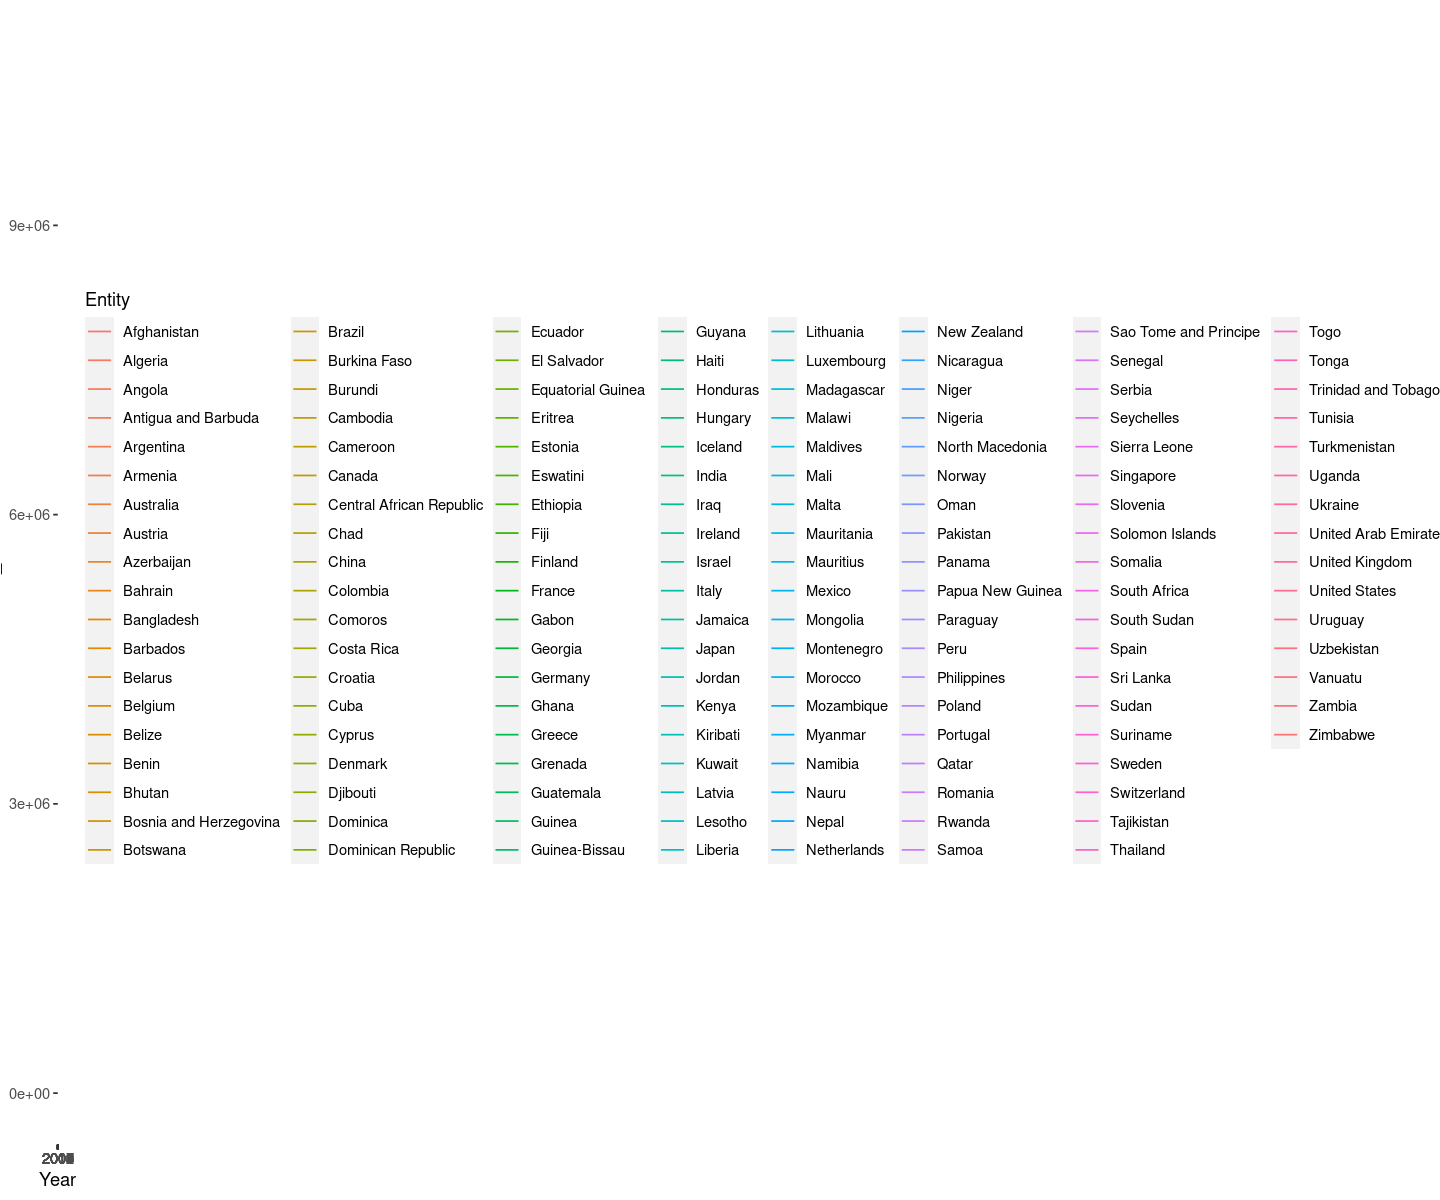

In [161]:
ggplot(complete_energy) + 
  aes(x = Year, y = Value_co2, color = Entity, group = Entity) + 
  geom_line() + 
  theme(legend.position = "right")
#complete energy avec les valeurs transformées mais on garde value_Co2

In [162]:
paste('ecart type')
sd(complete_energy$Value_co2)
paste('moyenne :')
mean(complete_energy$Value_co2)
paste('min')
min(complete_energy$Value_co2)
paste('max')
max(complete_energy$Value_co2)

[1] "ecart type"

[1] 818020.2

[1] "moyenne :"

[1] 168818.2

[1] "min"

[1] 30

[1] "max"

[1] 10707220

Ici nous pouvons observer que l'écart type de la variable Value CO2 est très grande, ce qui témoigne d'une hétérogéneité des valeurs par rapport à la répartition moyenne. De plus le graphique que les 5 pays ayant une emission de CO2 la plus importante sont : Chine / Etats-Unis / Inde / Japon / Allemagne

### Les pays les plus émetteurs de CO2

Entity         Value_co2
28  China          7636642.5
143 United States  5329538.5
63  India          1633979.0
69  Japan          1183734.5
51  Germany         773644.5
25  Canada          547644.5
142 United Kingdom  470604.0
86  Mexico          444619.5
67  Italy           399400.5
124 South Africa    398041.5

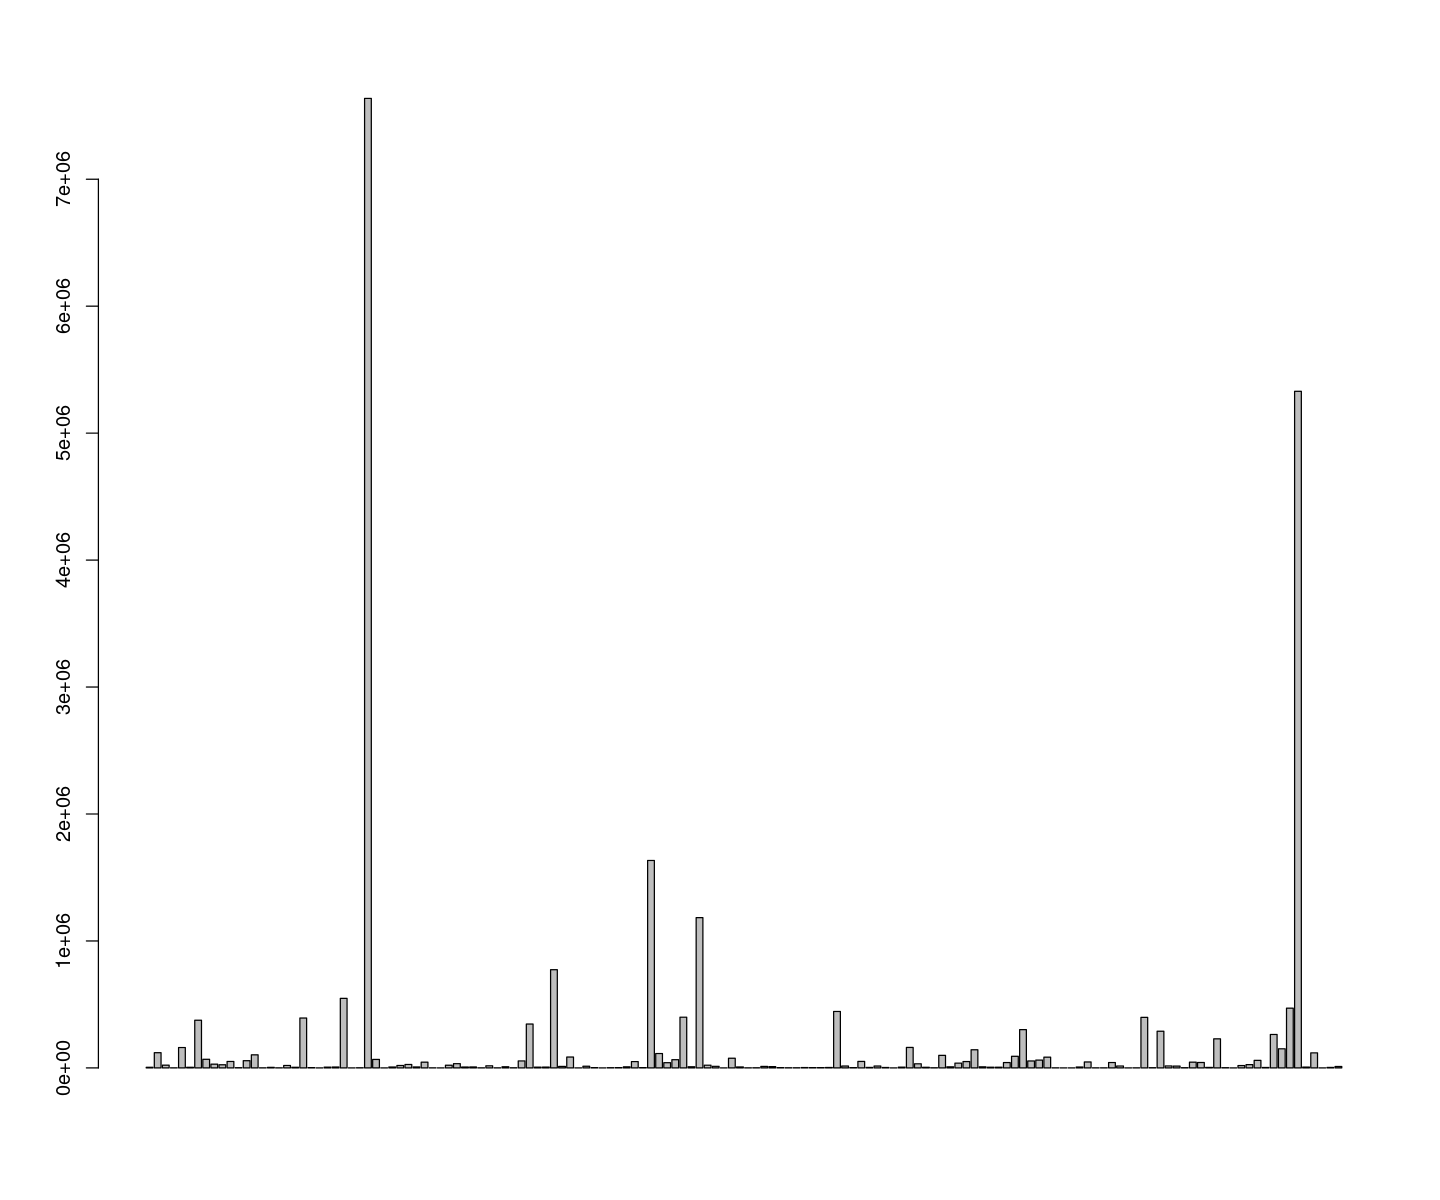

In [163]:
Moy = aggregate(data=complete_energy,Value_co2~Entity,FUN=mean)
index = order(Moy$Value_co2, decreasing = TRUE )
Moy_classe = Moy[index,]
head(Moy_classe,10)
barplot(Moy[,2])

## Question 4

### Analyse descriptive unidimensionnelle

#### Variables qualitatives : Year et Entity 


2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 
 137  138  140  141  141  141  141  144  144  144  145  145  144  145  147  147 
2016 2017 2018 2019 2020 
 146  146  146  146    0 


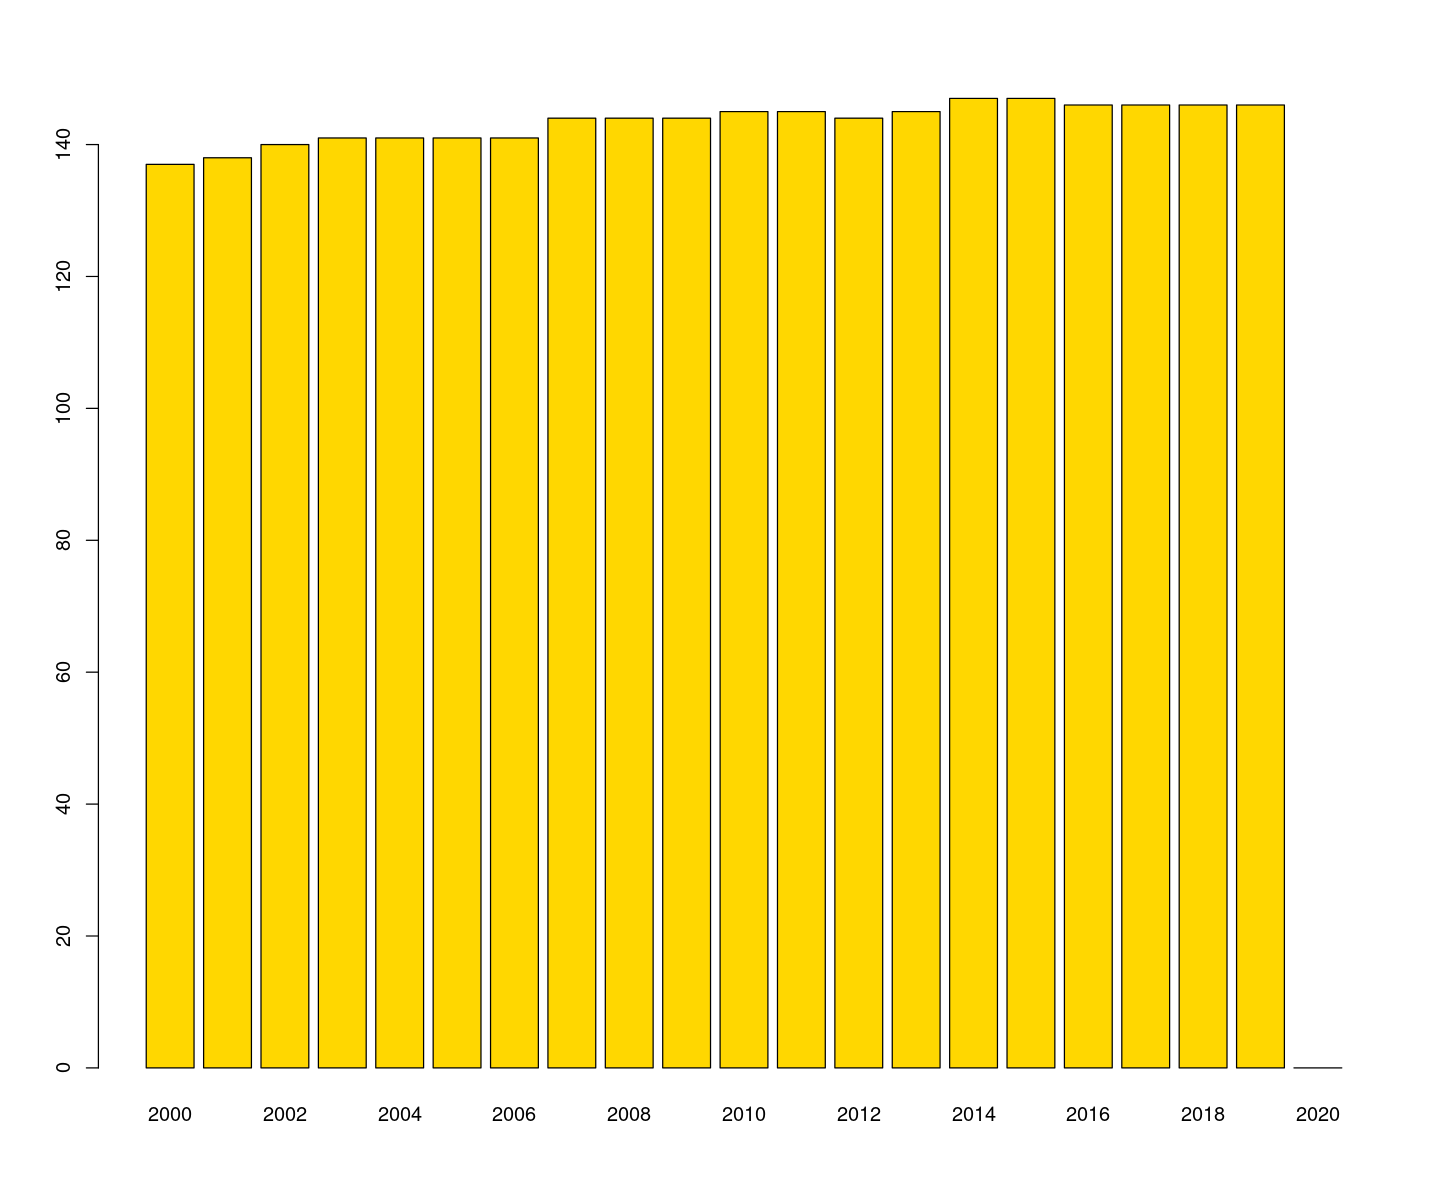

In [164]:
occ_y = table(complete_energy$Year)
print(occ_y)
barplot(occ_y, col="gold")

Chaque année n'a pas le même nombre d'observations.

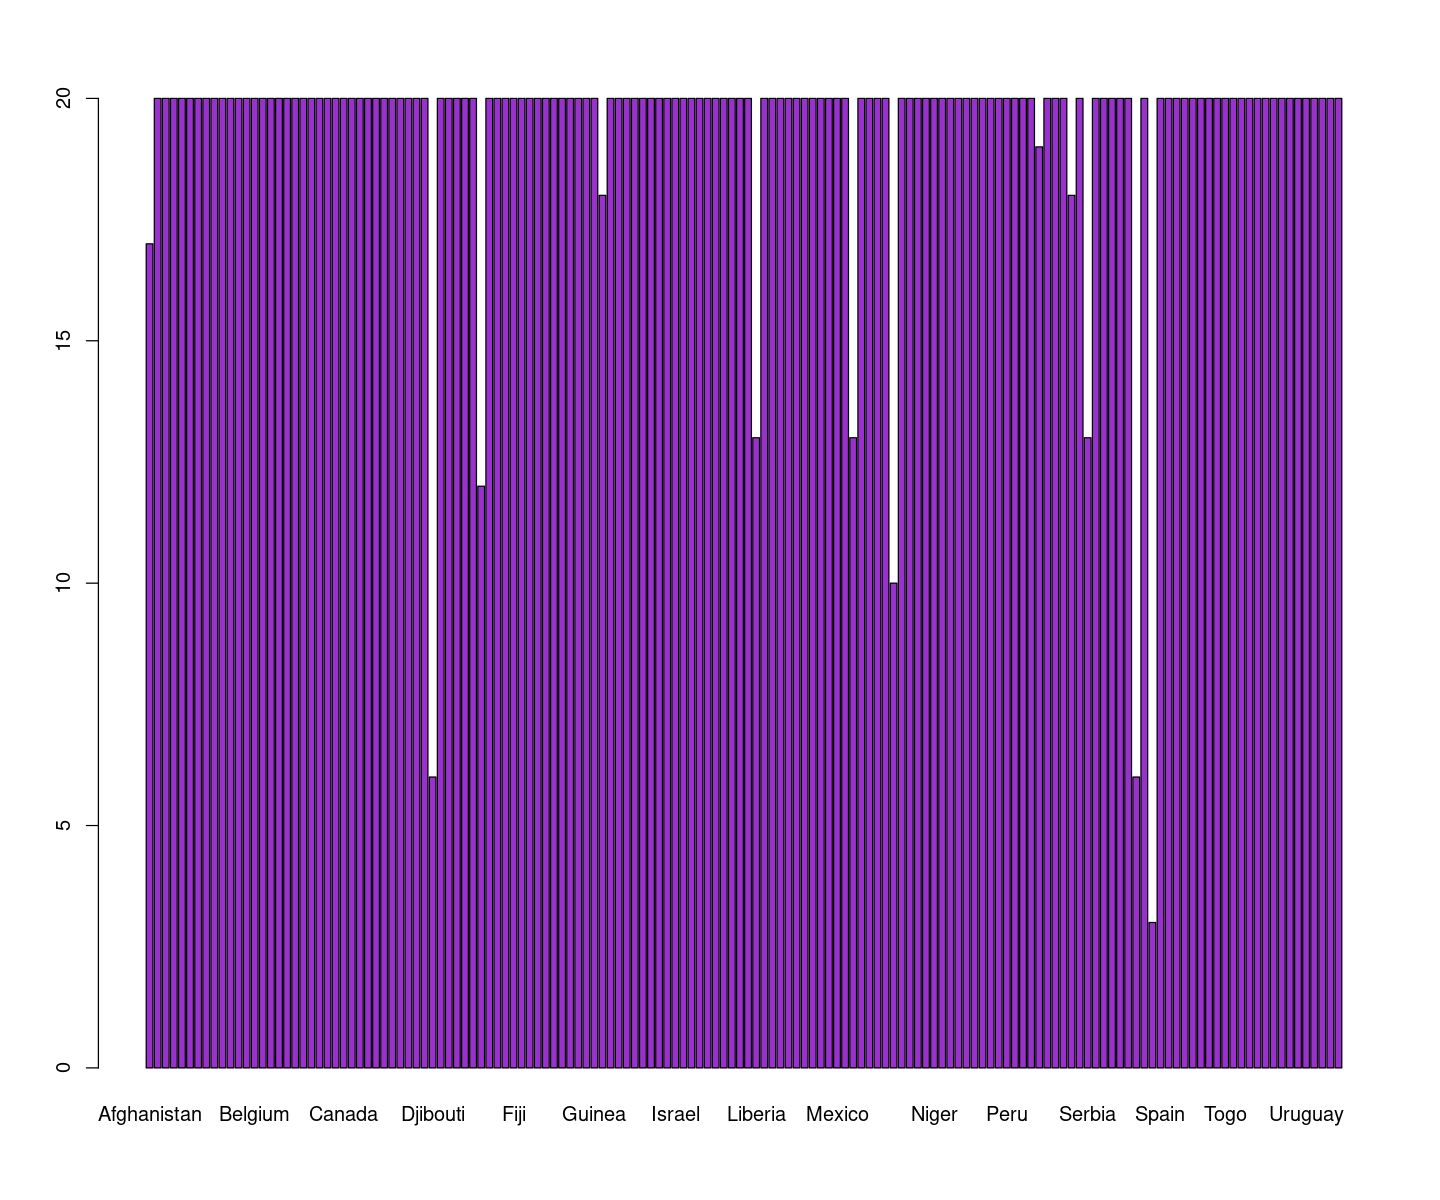

In [165]:
occ_e = table(complete_energy$Entity)
#print(occ_e)
barplot(occ_e,col = "darkorchid")


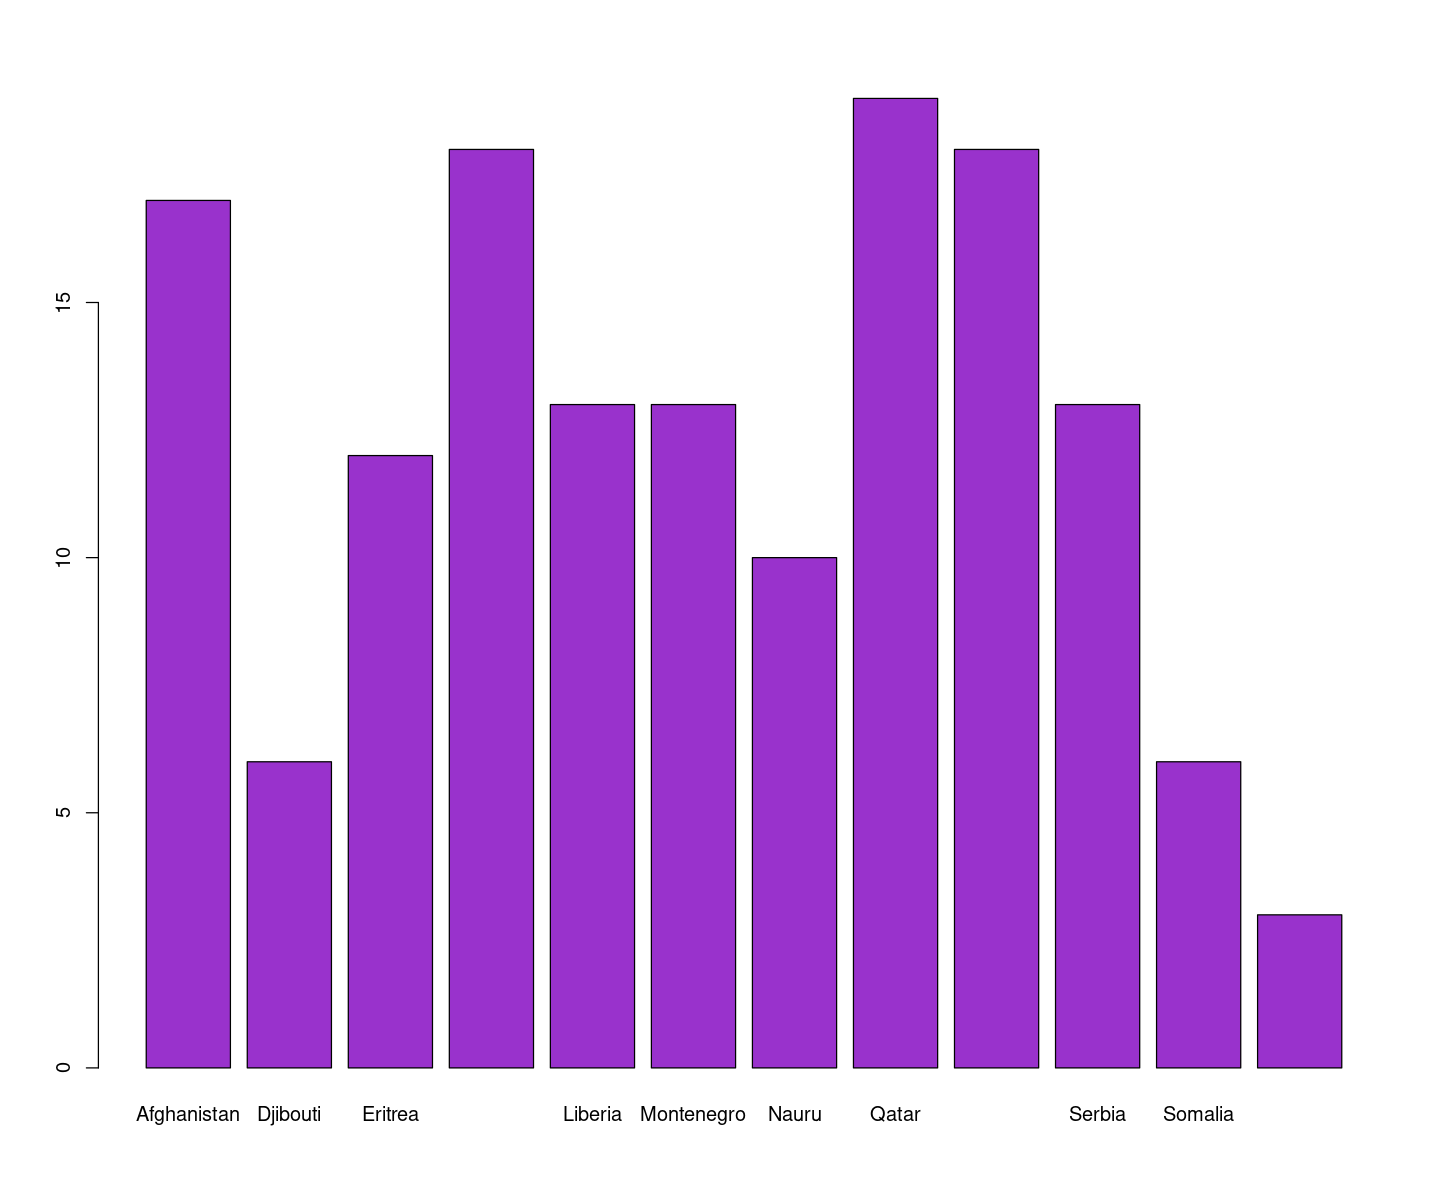

In [166]:
occ_e20 = occ_e[occ_e<20]
barplot(occ_e20,col = "darkorchid")

Chaque pays n'a pas le même nombre d'observations. Il y en a 12 qui n'ont pas été observés durant les 20 années de l'étude

#### Pour les variables quantitatives

In [167]:
summary(complete_energy)

    Entity               Year       Access_elec       Access_fuels   
 Length:2868        2014   : 147   Min.   :  1.252   Min.   :  0.00  
 Class :character   2015   : 147   1st Qu.: 53.238   1st Qu.: 22.07  
 Mode  :character   2016   : 146   Median : 97.000   Median : 81.55  
                    2017   : 146   Mean   : 76.585   Mean   : 62.17  
                    2018   : 146   3rd Qu.:100.000   3rd Qu.:100.00  
                    2019   : 146   Max.   :100.000   Max.   :100.00  
                    (Other):1990                                     
 Renewable_energy  Elec_fossil        Elec_nuclear      Elec_renew     
 Min.   : 0.000   Min.   :   0.000   Min.   :  0.00   Min.   :   0.00  
 1st Qu.: 9.188   1st Qu.:   0.290   1st Qu.:  0.00   1st Qu.:   0.09  
 Median :28.790   Median :   2.995   Median :  0.00   Median :   1.68  
 Mean   :35.802   Mean   :  76.694   Mean   : 15.34   Mean   :  26.60  
 3rd Qu.:60.667   3rd Qu.:  25.788   3rd Qu.:  0.00   3rd Qu.:  10.10  
 Max.   

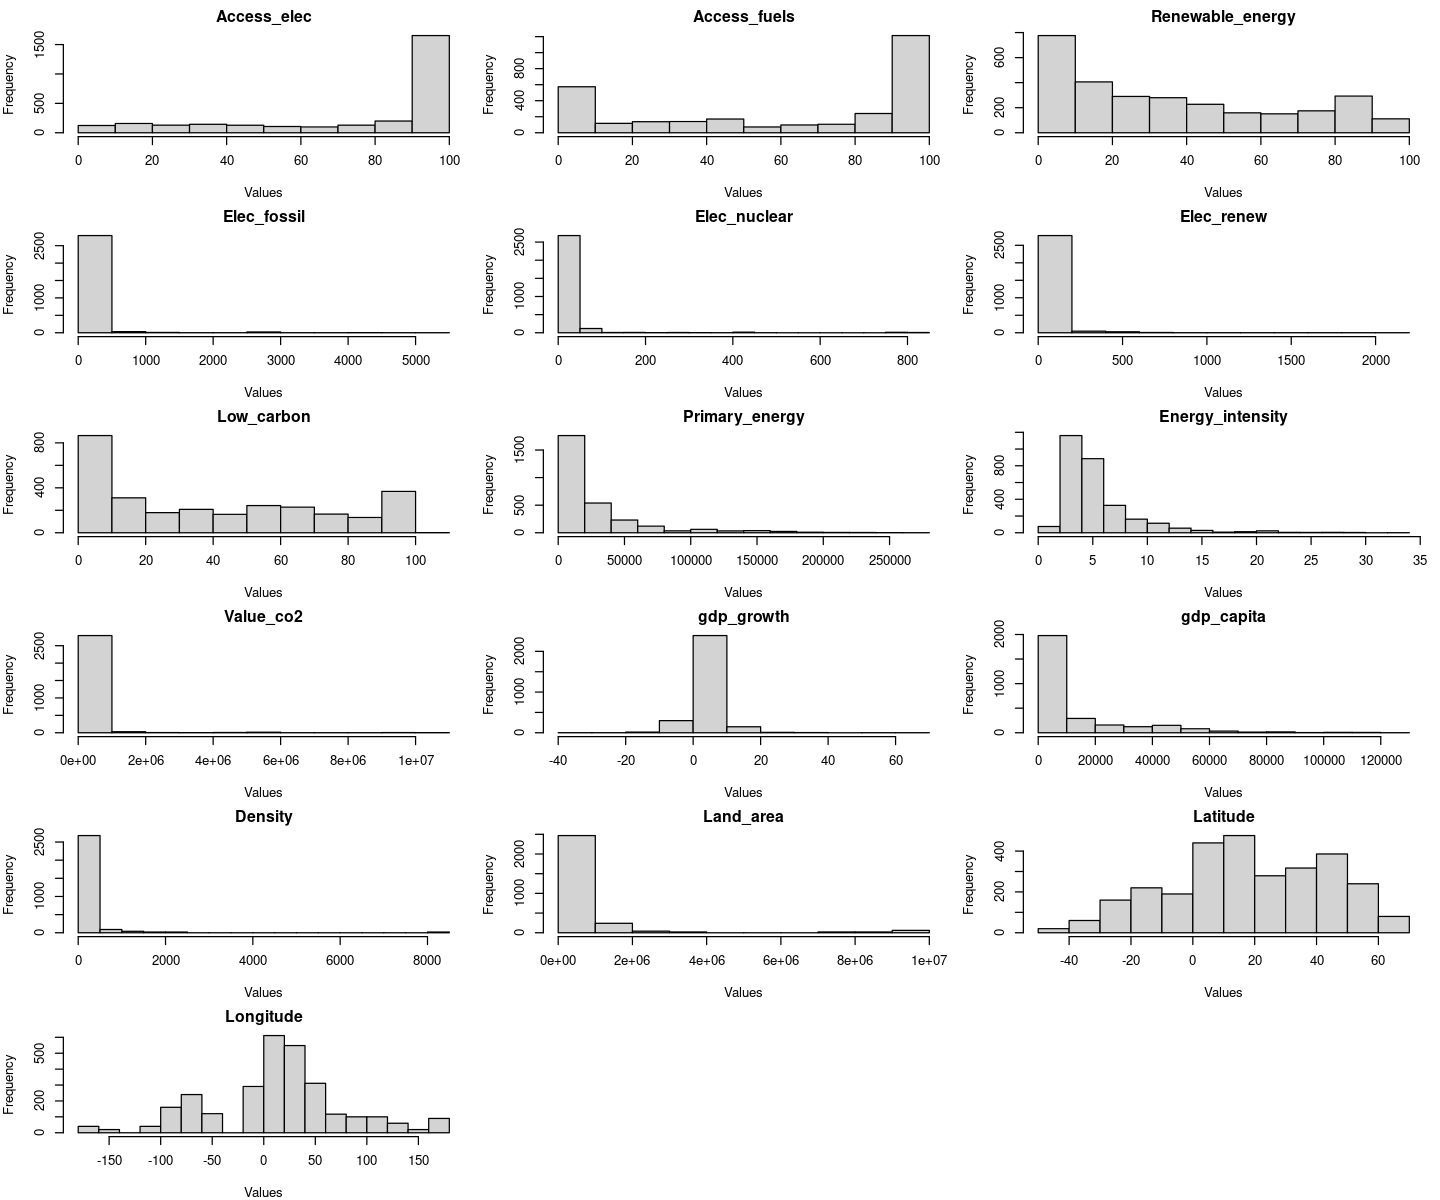

In [168]:
par(mfrow = c(6,3) , mar = c(4,4,2,1))

for (i in 3:length(names(complete_energy))) {
    dfi = complete_energy[,c(i)]
    hist(dfi, main=names(complete_energy)[i],xlab='Values')
}

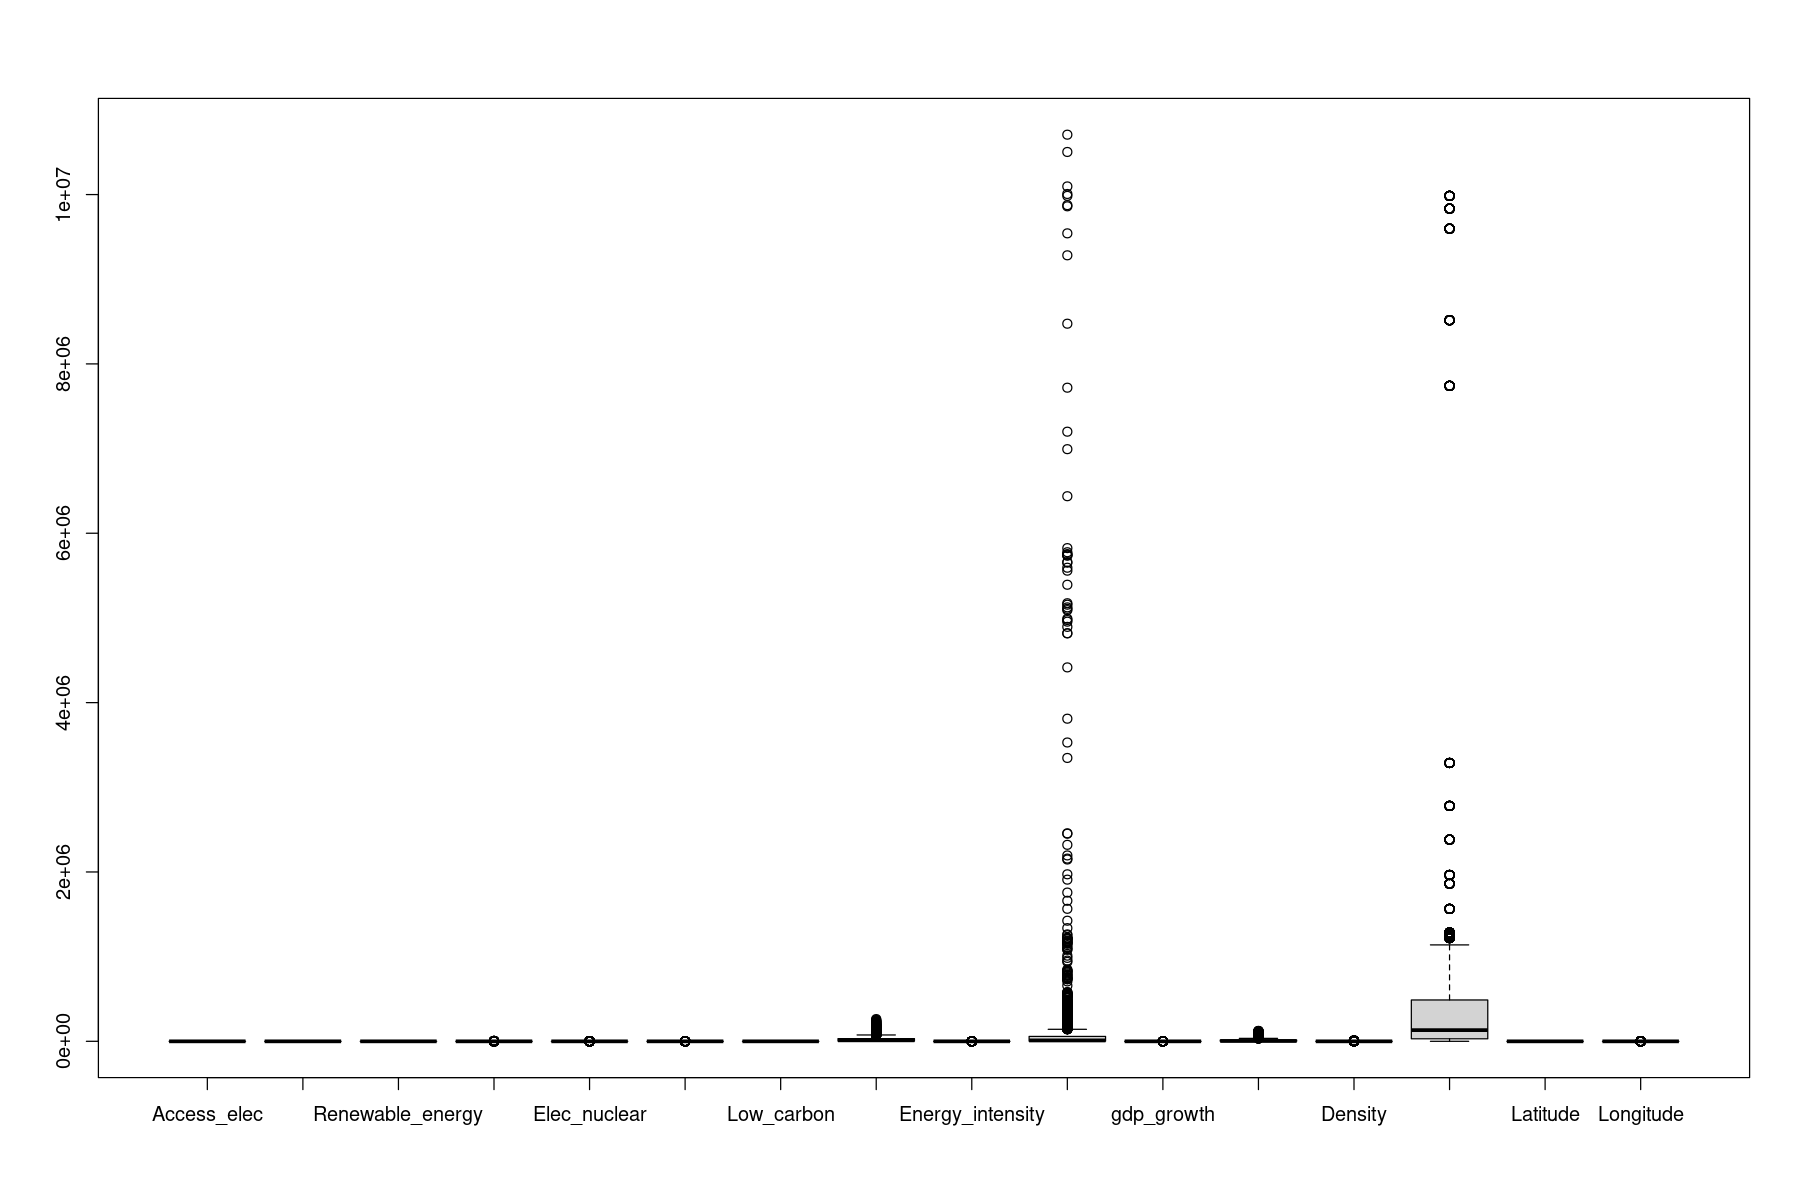

In [169]:
options(repr.plot.width = 15, repr.plot.height = 10)

df = complete_energy[,-c(1,2)]
boxplot(df)

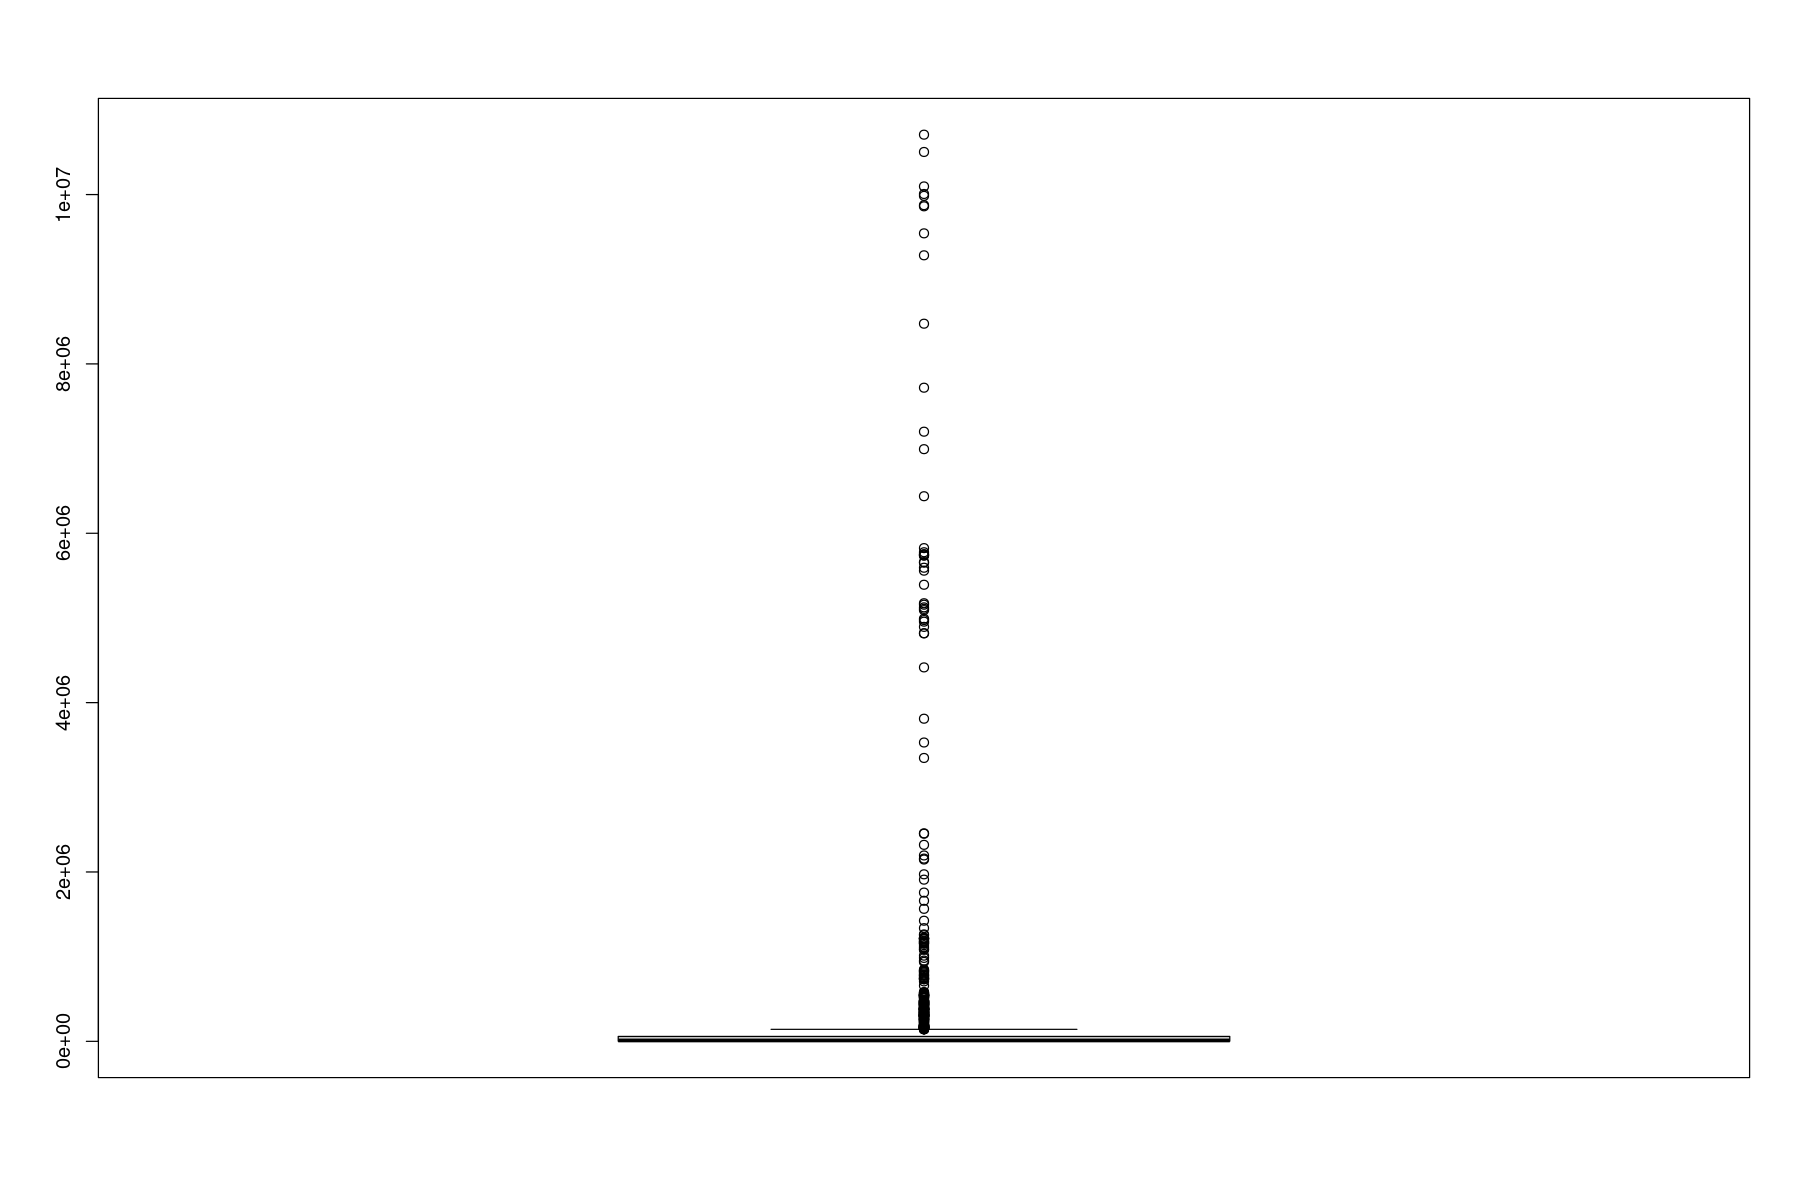

In [170]:
boxplot(df$Value_co2)

Les échelles de valeurs sont très différentes en fonction des variables que nous regardons dans notre energyset, nos avons choisi de nous focaliser sur Value_CO2 et nous voyons que celle-ci est composée de beaucoup d'outliers. Donc l'observation en boxplot n'est pas forcément pertinente.

##### Transformation des variables

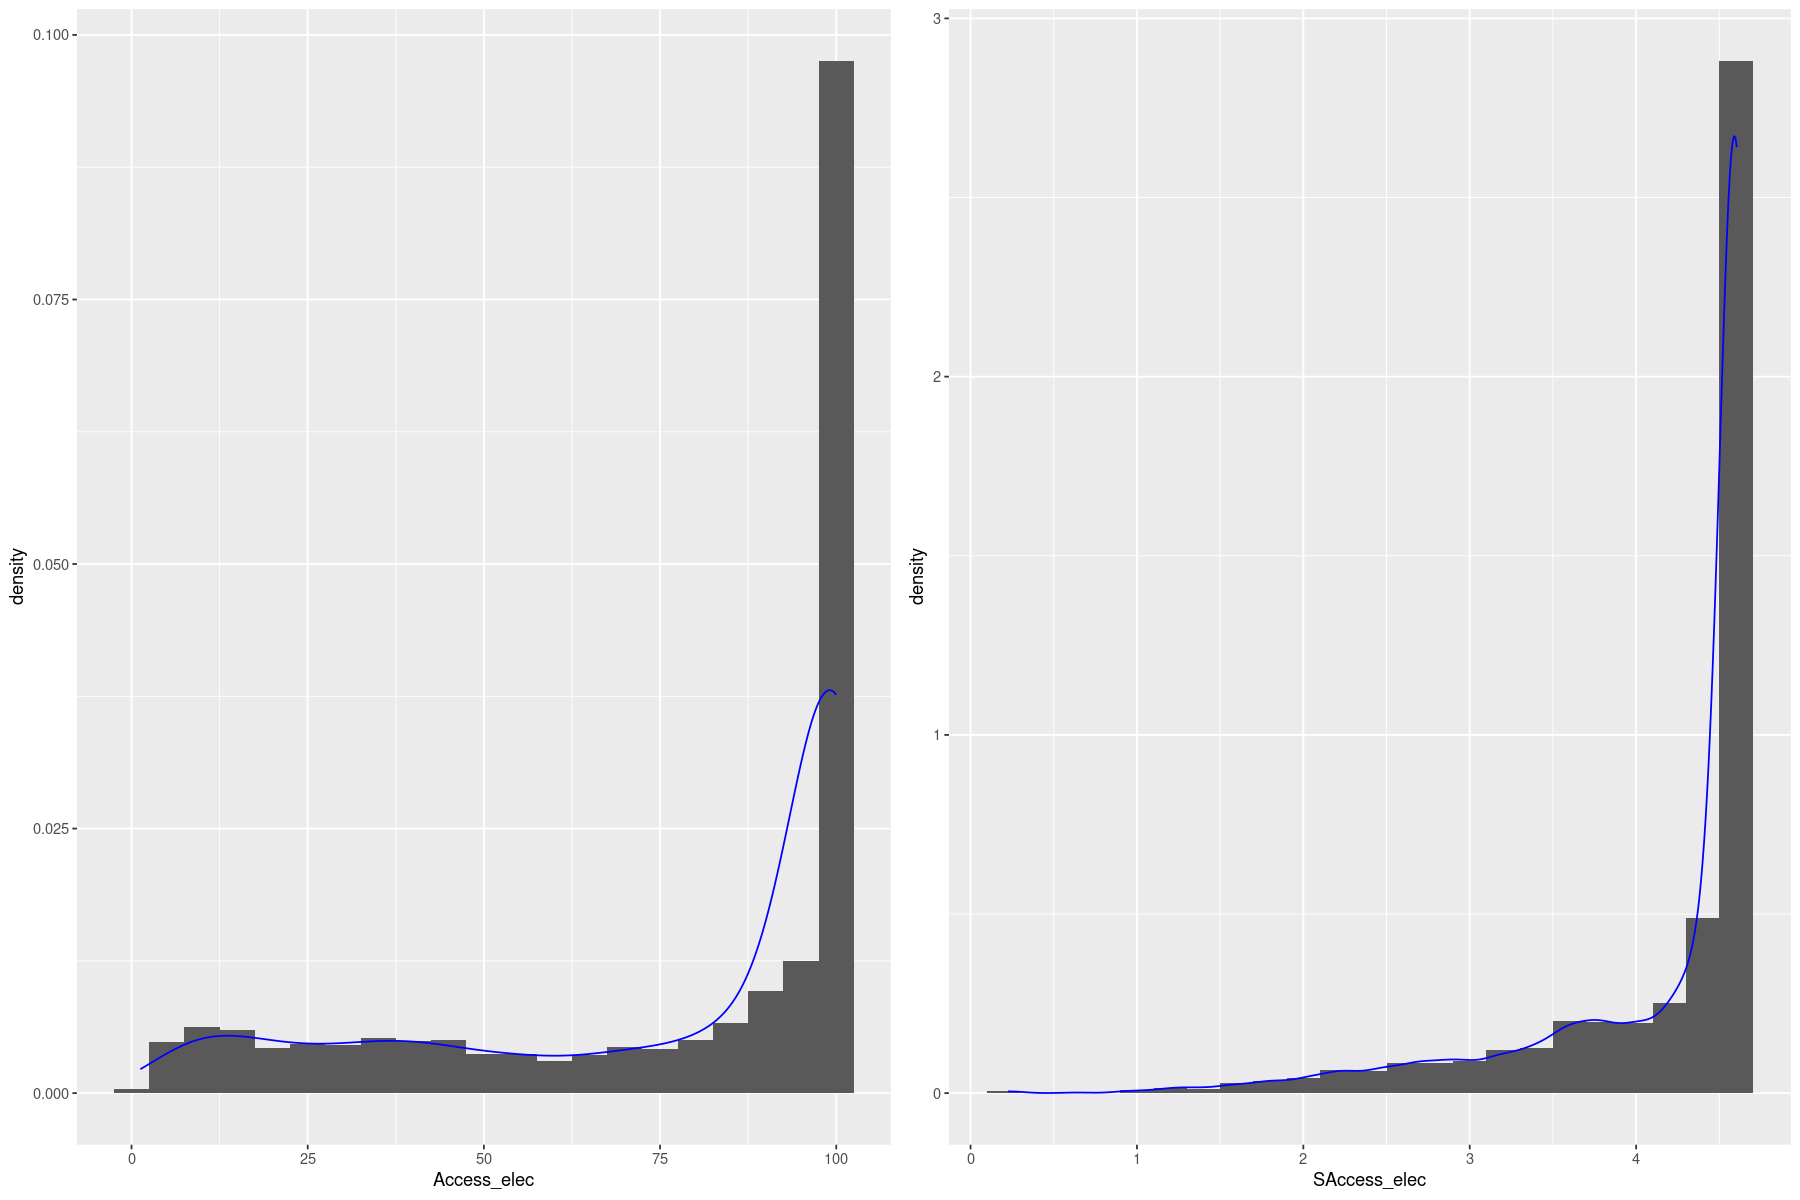

In [171]:
complete_energy[, "SAccess_elec"] = log(complete_energy[, "Access_elec"])

g1 = ggplot(complete_energy,aes(x=Access_elec))+ geom_histogram(aes(y=..density..),binwidth = 5)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SAccess_elec))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

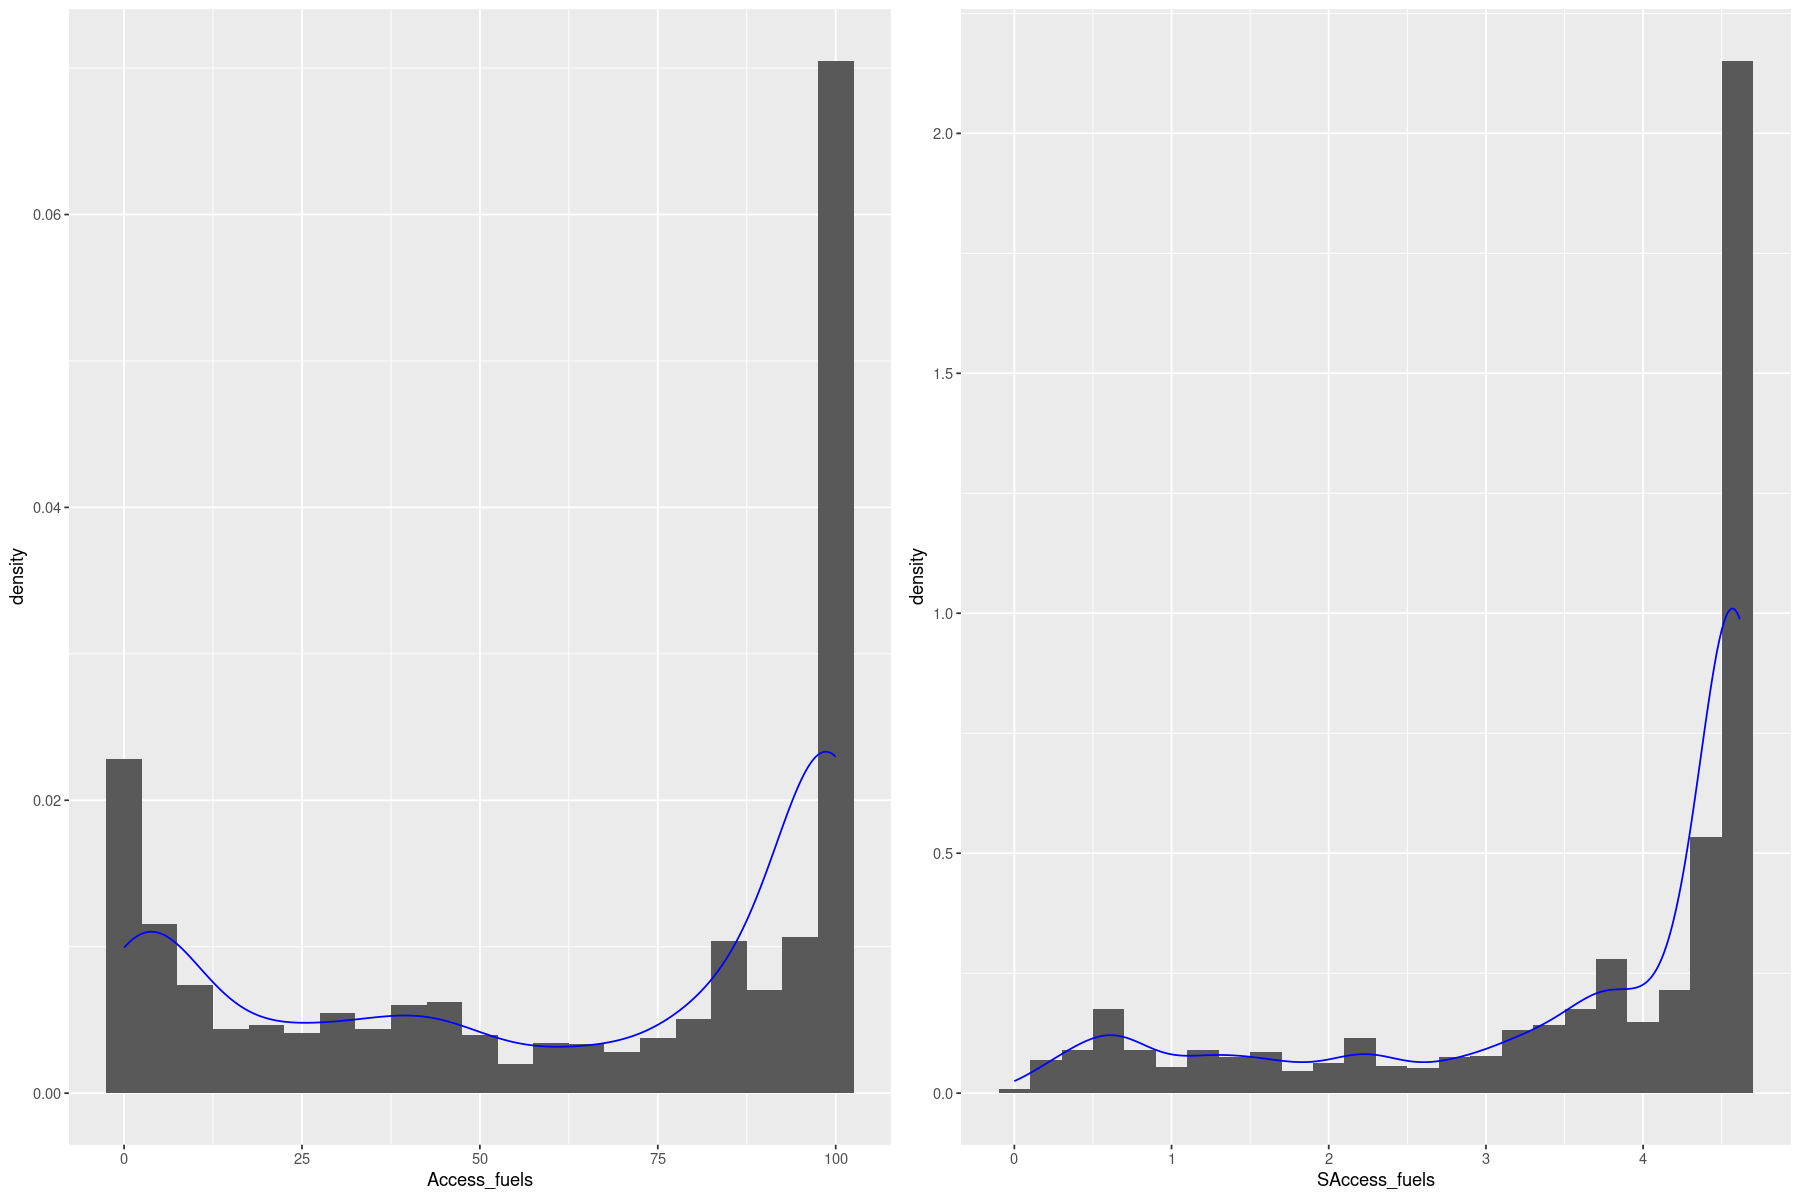

In [172]:
complete_energy[, "SAccess_fuels"] = log(1+complete_energy[, "Access_fuels"])

g1 = ggplot(complete_energy,aes(x=Access_fuels))+ geom_histogram(aes(y=..density..),binwidth = 5)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SAccess_fuels))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

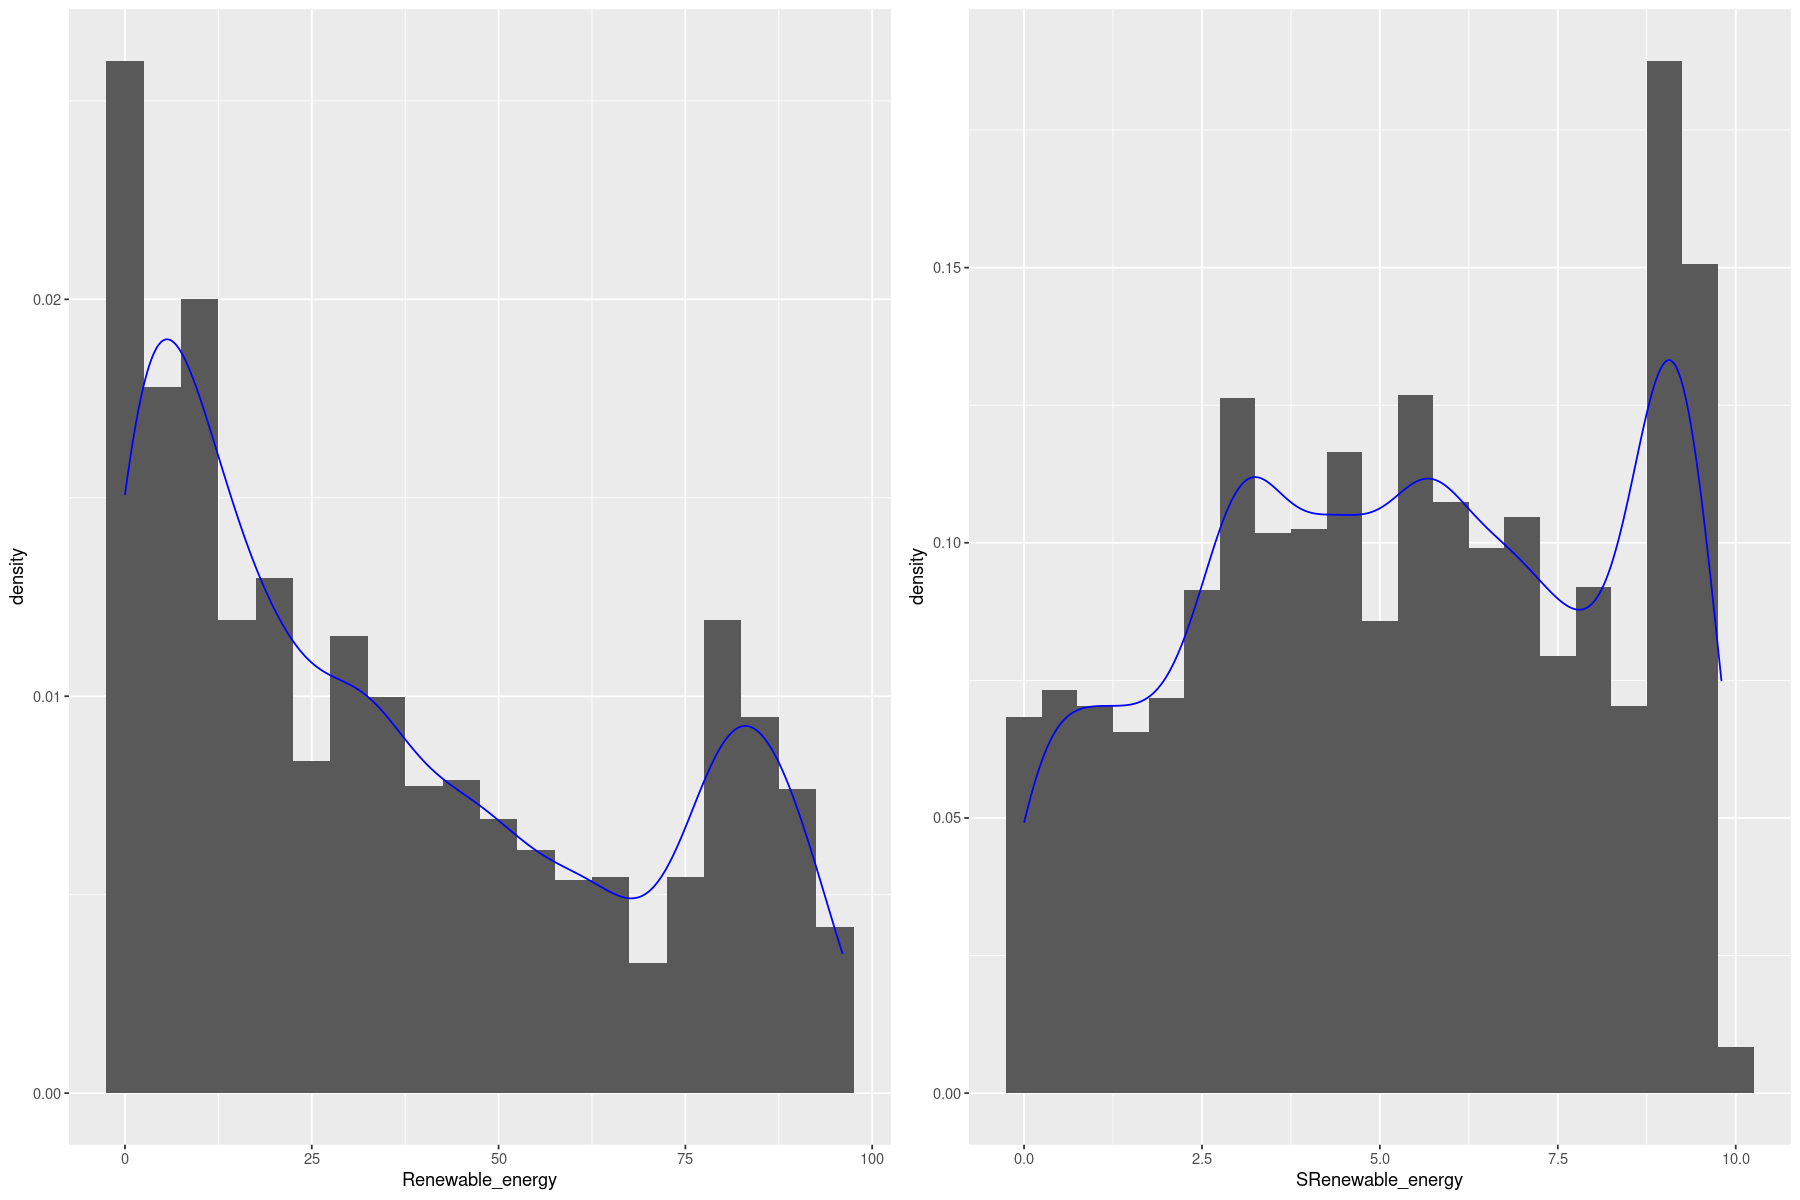

In [173]:
complete_energy[, "SRenewable_energy"] = sqrt(complete_energy[, "Renewable_energy"])

g1 = ggplot(complete_energy,aes(x=Renewable_energy))+ geom_histogram(aes(y=..density..),binwidth = 5)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SRenewable_energy))+ geom_histogram(aes(y=..density..),binwidth = 0.5)+geom_density(alpha=.1, col="blue") 
grid.arrange(g1,g2,ncol=2)

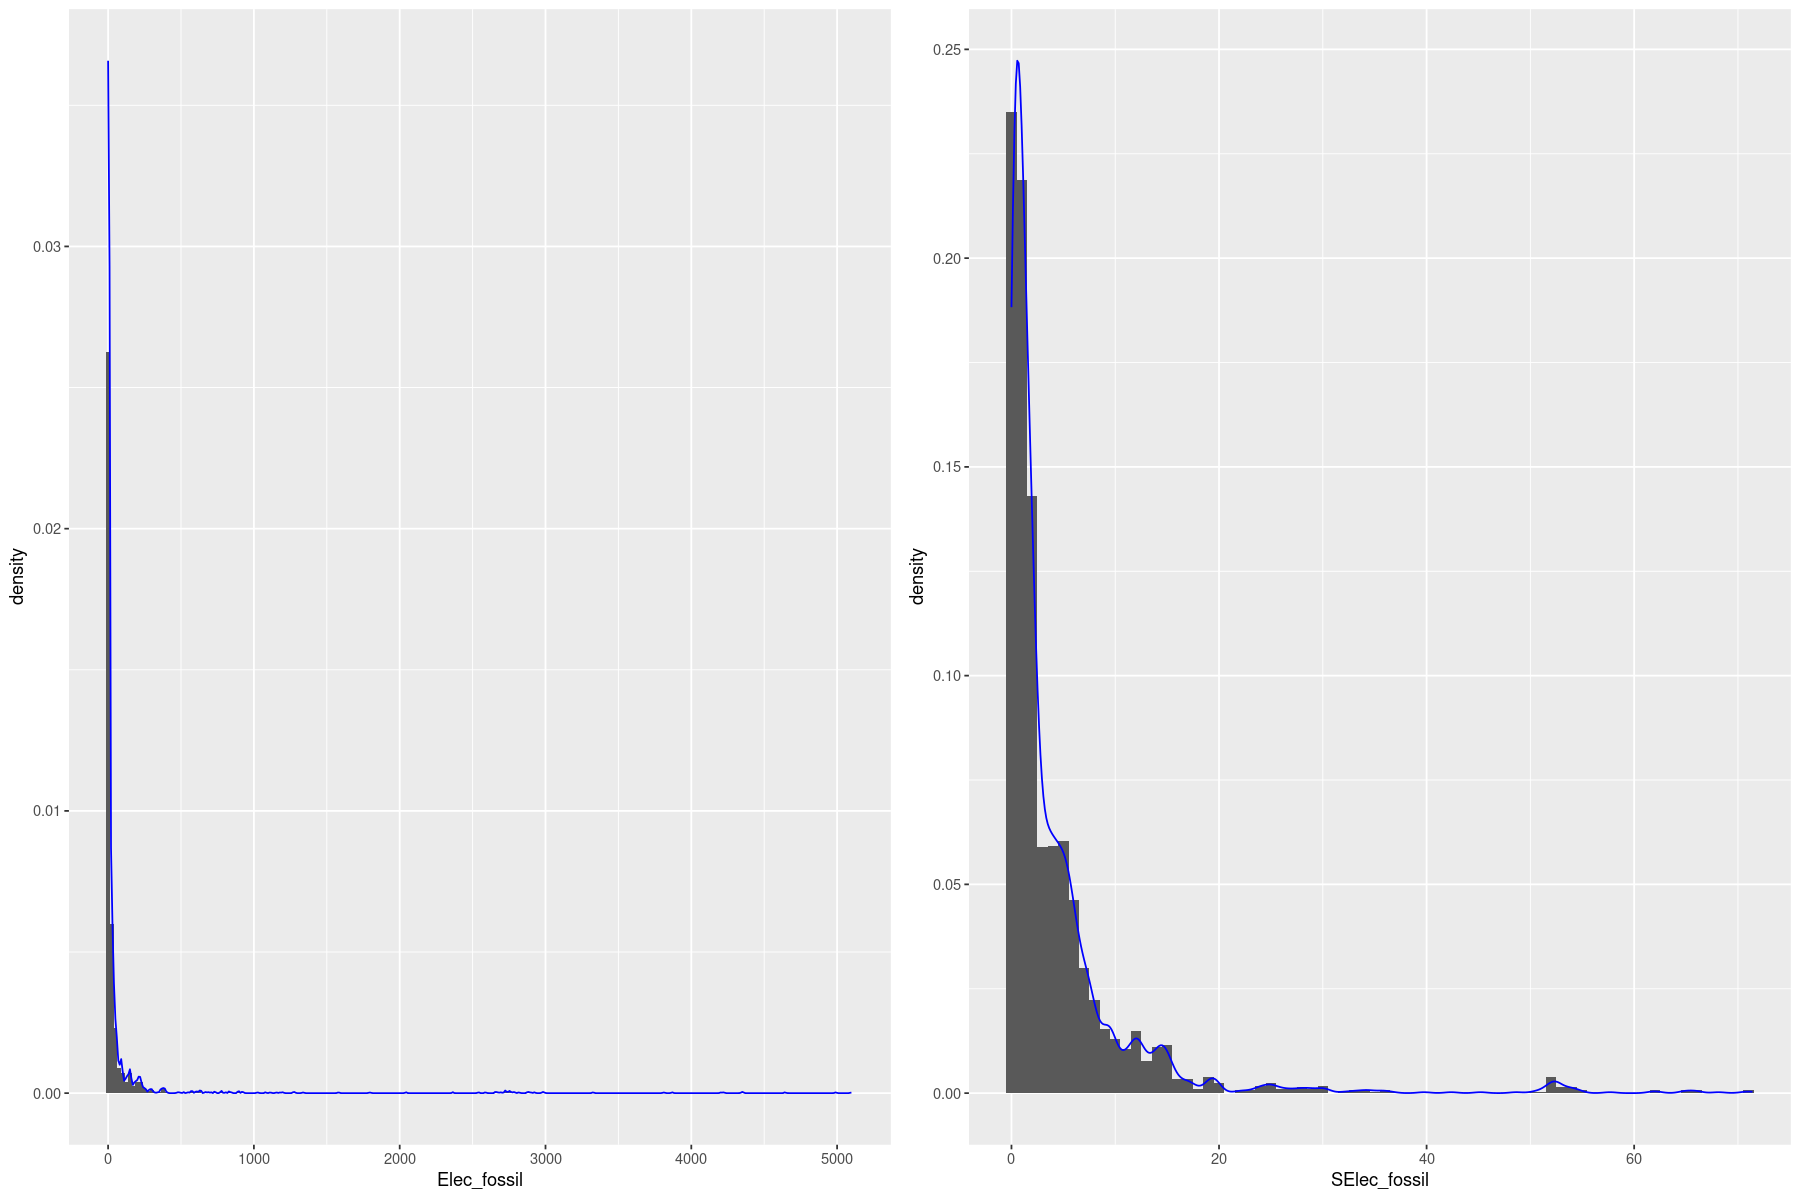

In [174]:
complete_energy[, "SElec_fossil"] = sqrt(complete_energy[, "Elec_fossil"])

g1 = ggplot(complete_energy,aes(x=Elec_fossil))+ geom_histogram(aes(y=..density..),binwidth = 25)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SElec_fossil))+ geom_histogram(aes(y=..density..),binwidth = 1)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

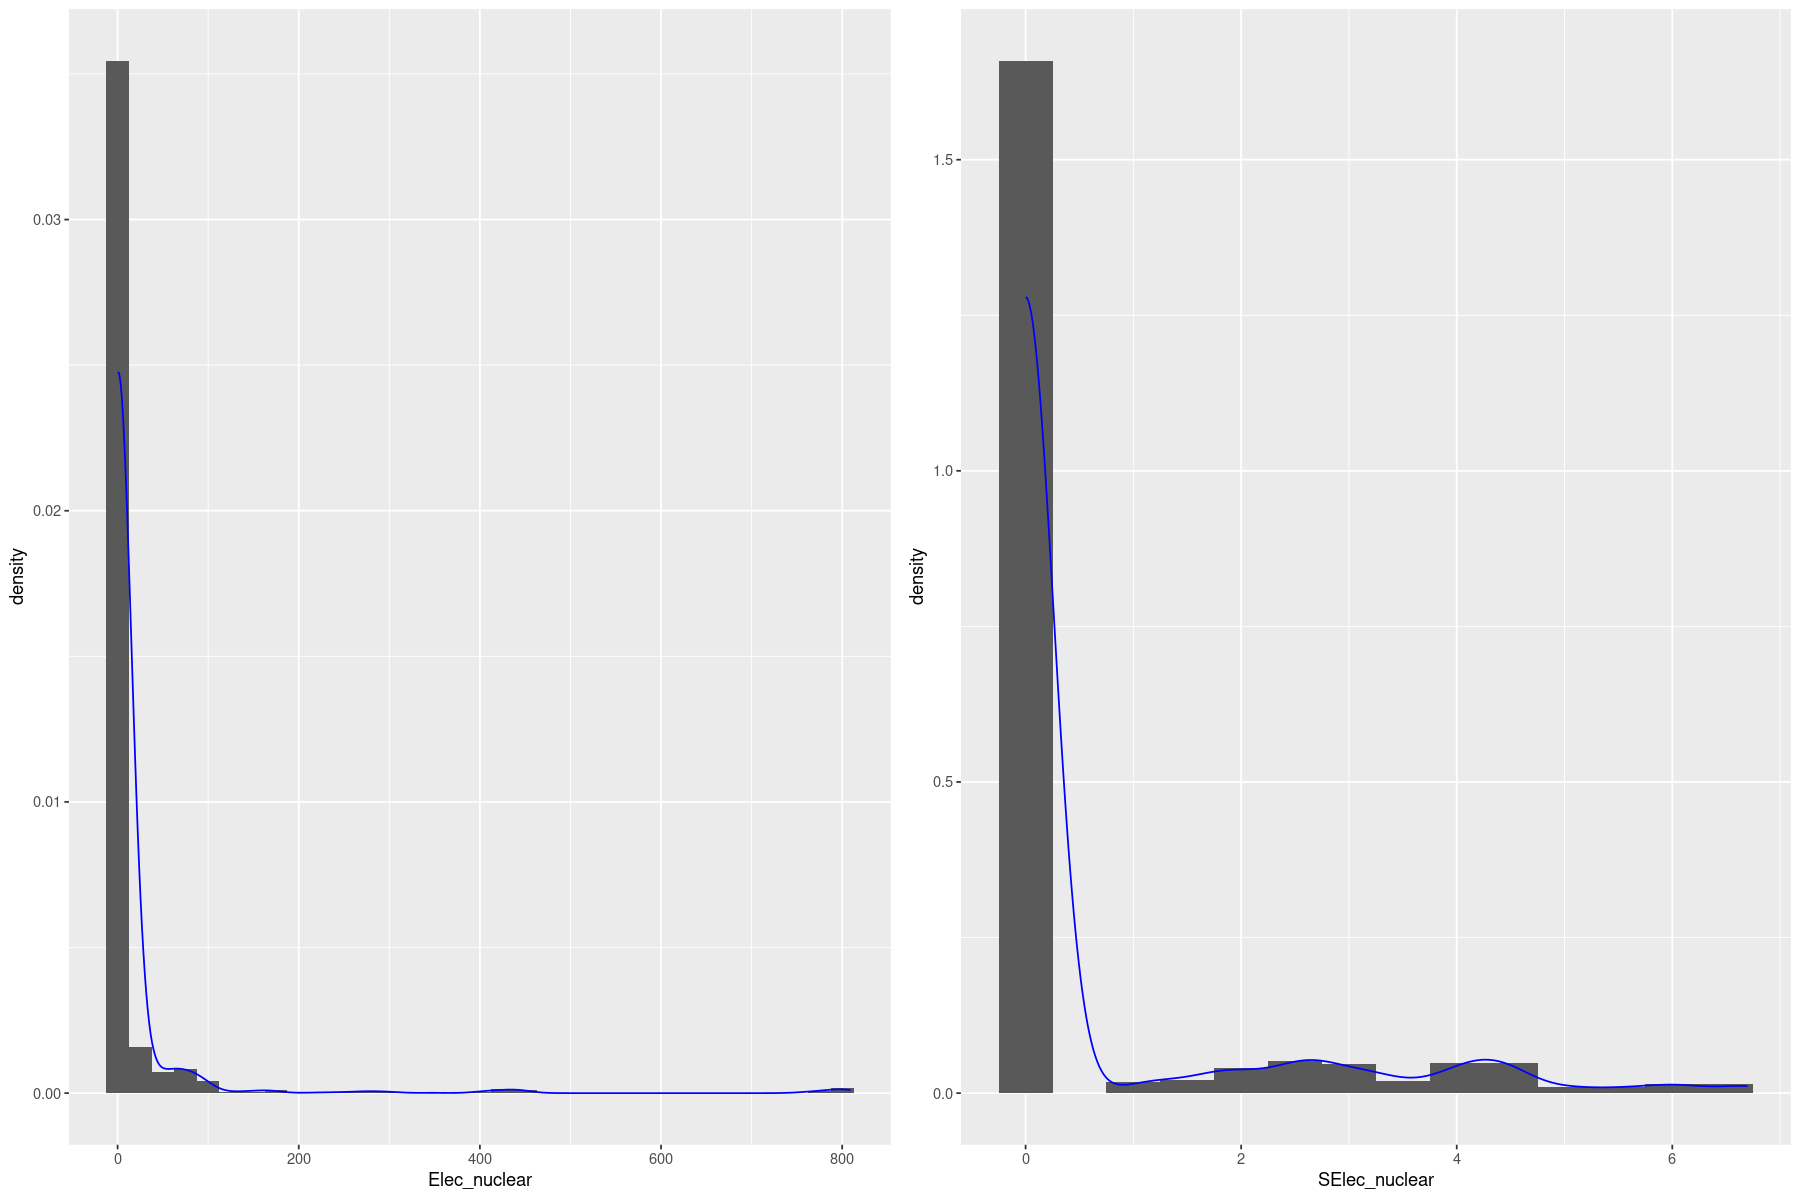

In [175]:
complete_energy[, "SElec_nuclear"] = log(1+complete_energy[, "Elec_nuclear"])

g1 = ggplot(complete_energy,aes(x=Elec_nuclear))+ geom_histogram(aes(y=..density..),binwidth = 25)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SElec_nuclear))+ geom_histogram(aes(y=..density..),binwidth = 0.5)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

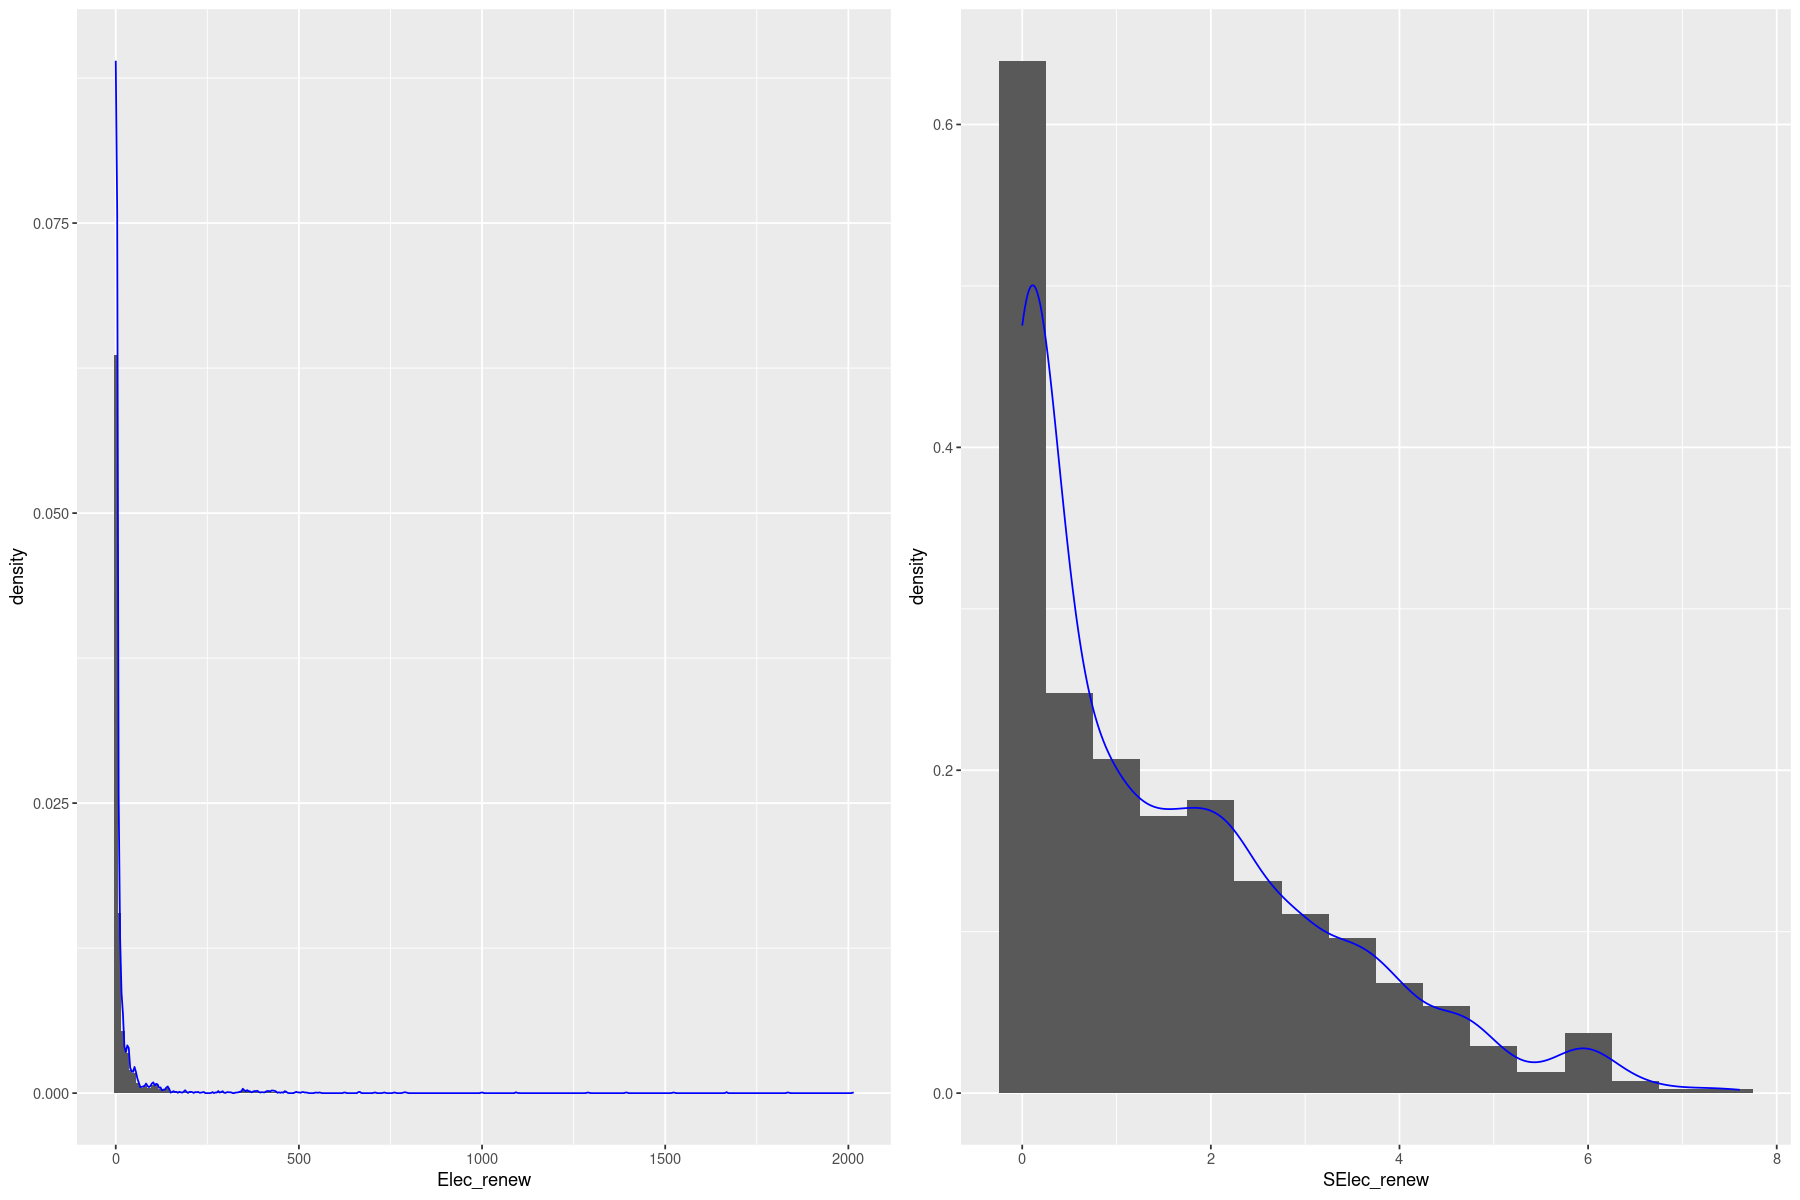

In [176]:
complete_energy[, "SElec_renew"] = log(1+complete_energy[, "Elec_renew"])

g1 = ggplot(complete_energy,aes(x=Elec_renew))+ geom_histogram(aes(y=..density..),binwidth = 10)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SElec_renew))+ geom_histogram(aes(y=..density..),binwidth = 0.5)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

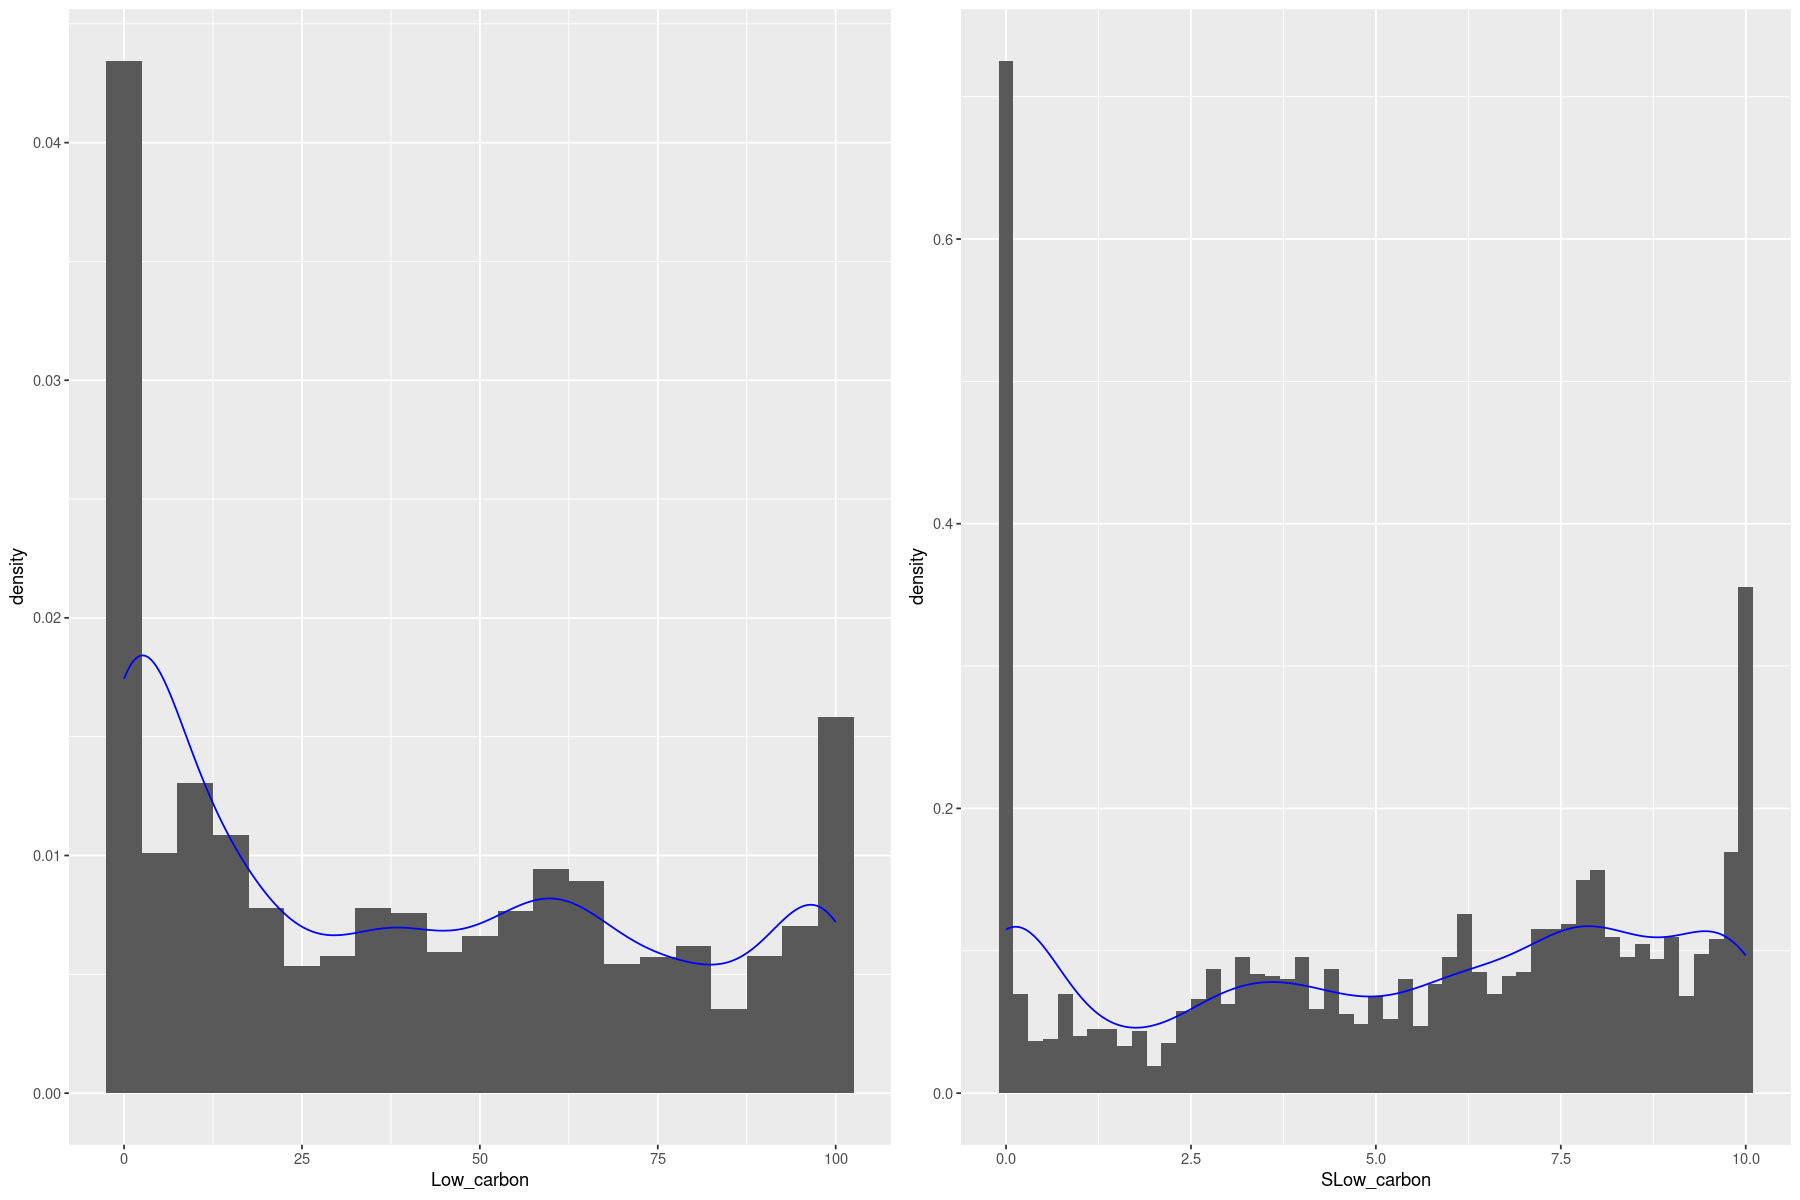

In [177]:
complete_energy[, "SLow_carbon"] = sqrt(complete_energy[, "Low_carbon"])

g1 = ggplot(complete_energy,aes(x=Low_carbon))+ geom_histogram(aes(y=..density..),binwidth = 5)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SLow_carbon))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

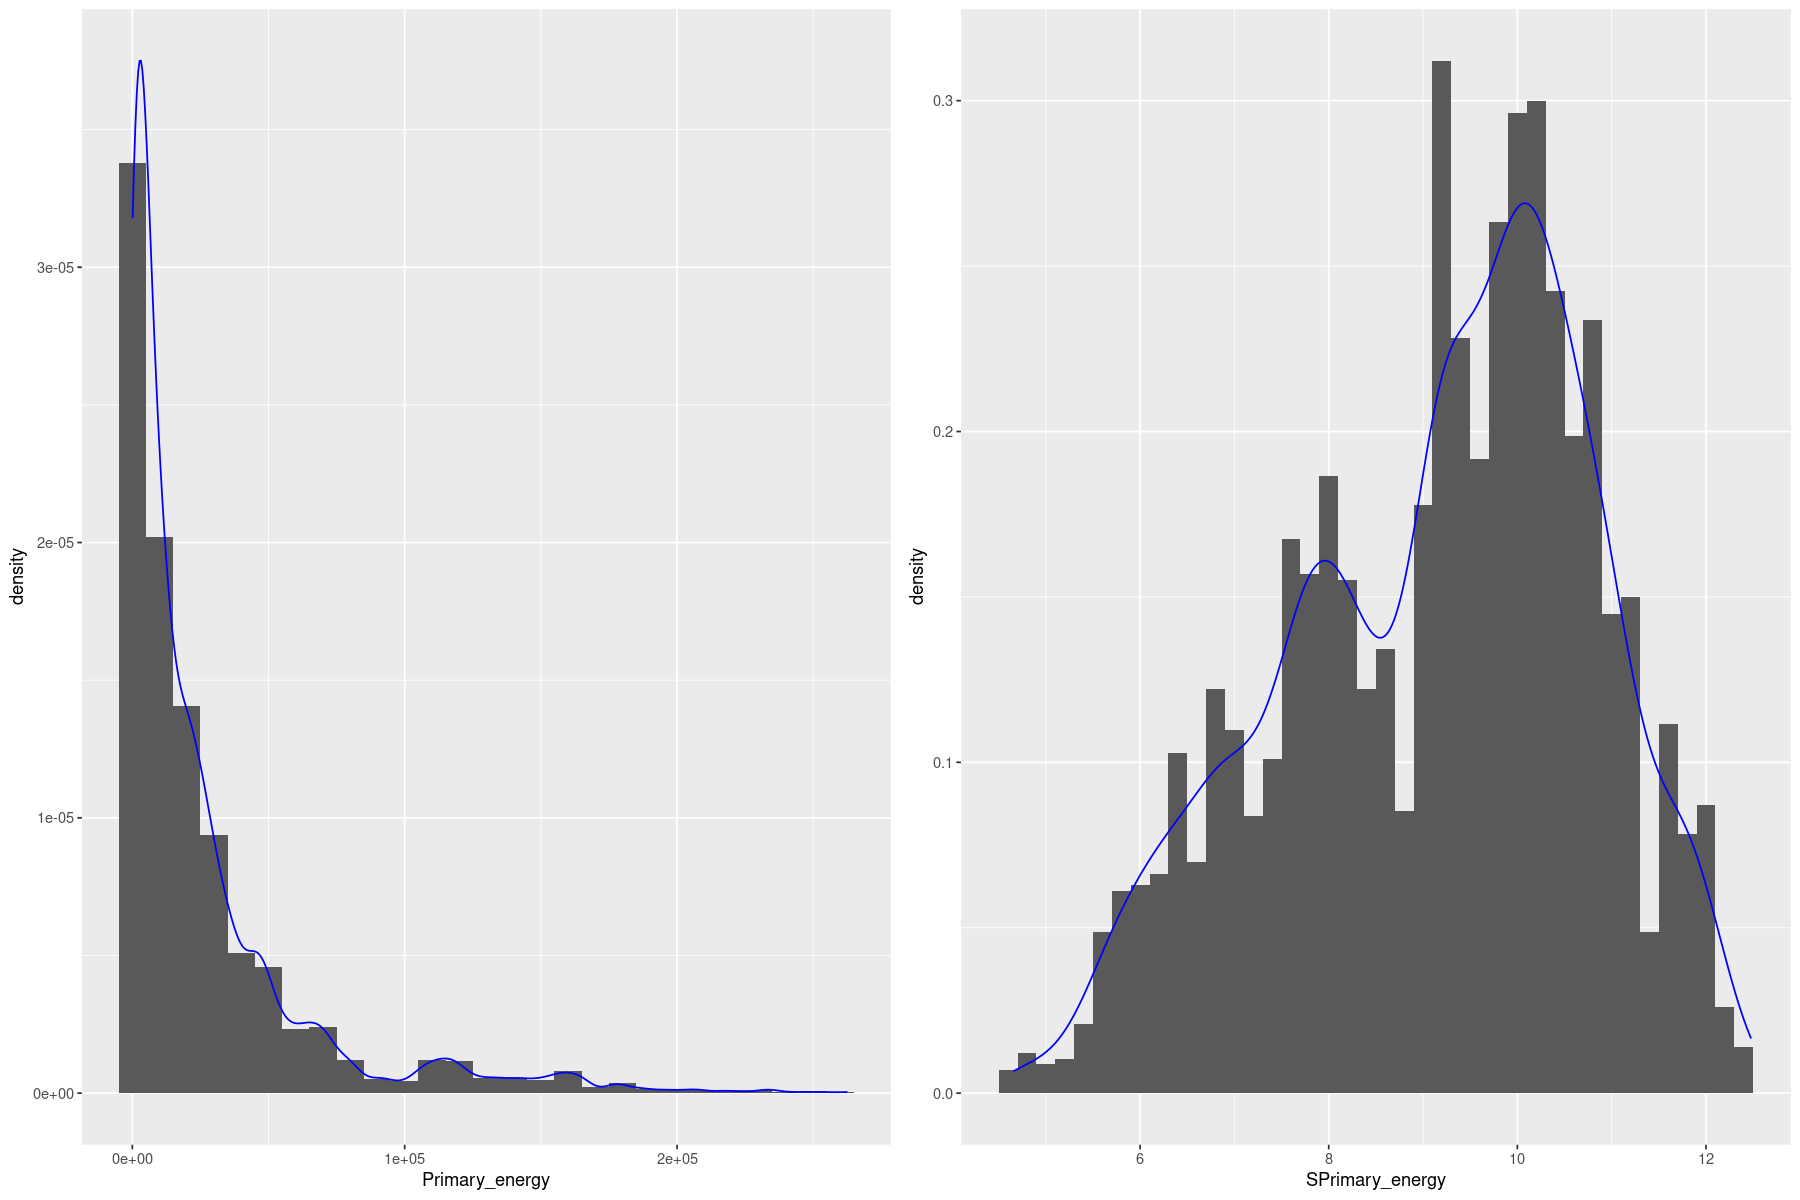

In [178]:
complete_energy[, "SPrimary_energy"] = log(complete_energy[, "Primary_energy"])

g1 = ggplot(complete_energy,aes(x=Primary_energy))+ geom_histogram(aes(y=..density..),binwidth = 10000)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SPrimary_energy))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

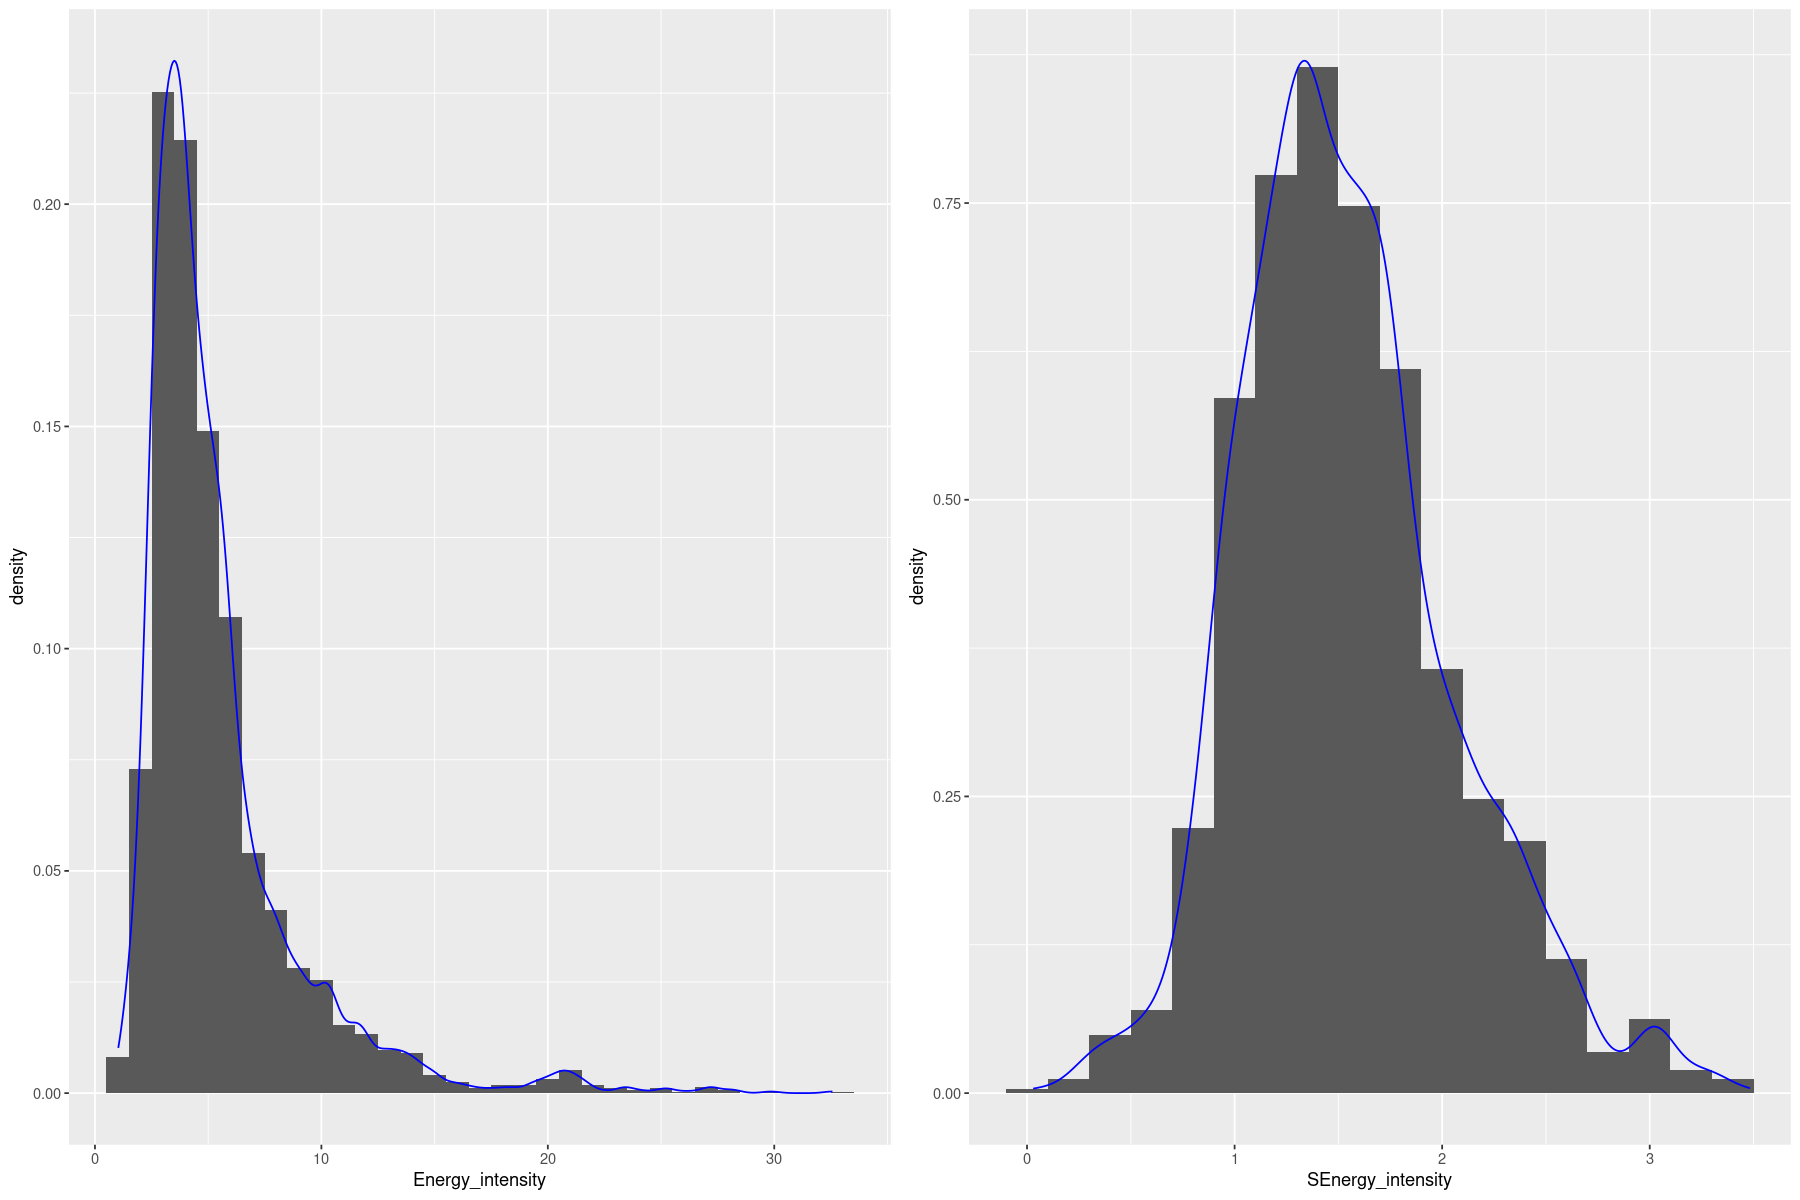

In [179]:
complete_energy[, "SEnergy_intensity"] = log(complete_energy[, "Energy_intensity"])

g1 = ggplot(complete_energy,aes(x=Energy_intensity))+ geom_histogram(aes(y=..density..),binwidth = 1)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SEnergy_intensity))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

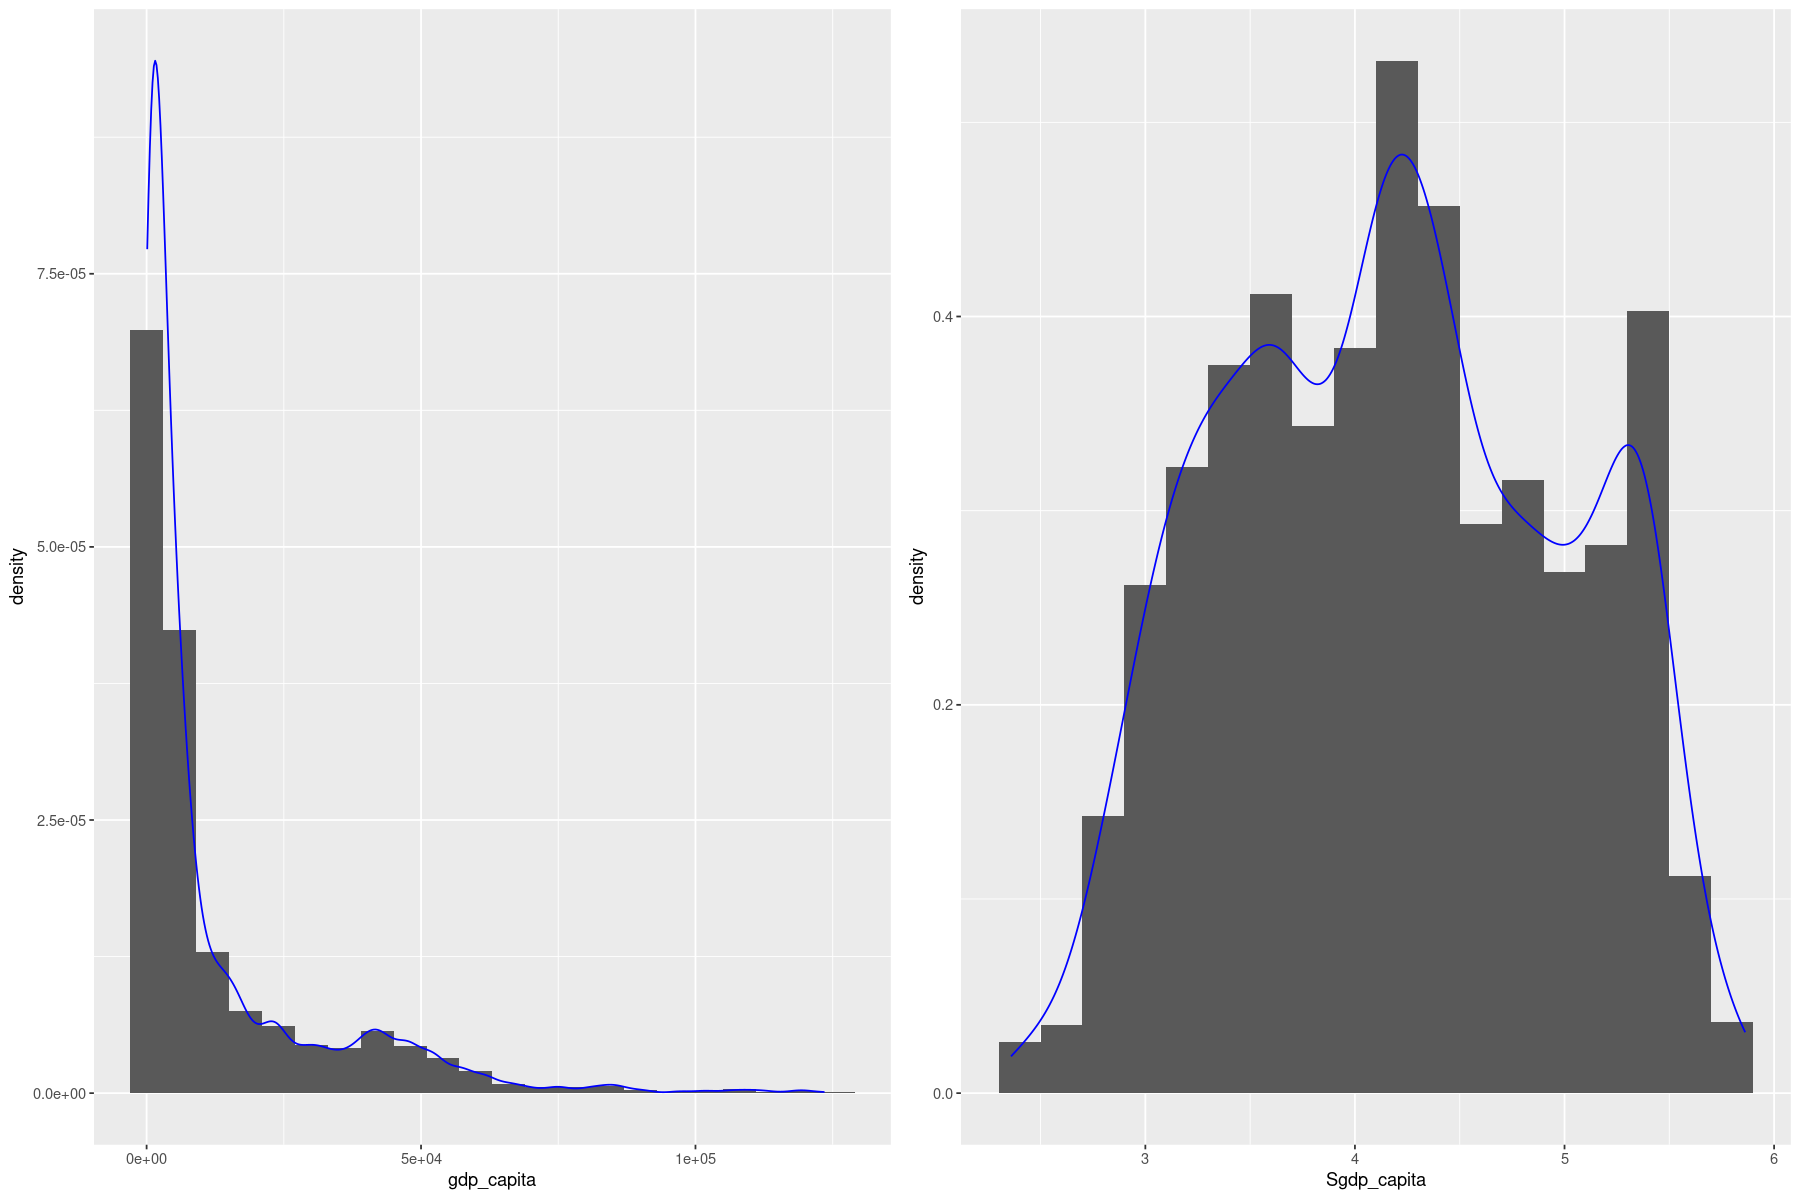

In [180]:
complete_energy[, "Sgdp_capita"] = log(sqrt(complete_energy[, "gdp_capita"]))

g1 = ggplot(complete_energy,aes(x=gdp_capita))+ geom_histogram(aes(y=..density..),binwidth = 6000)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=Sgdp_capita))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

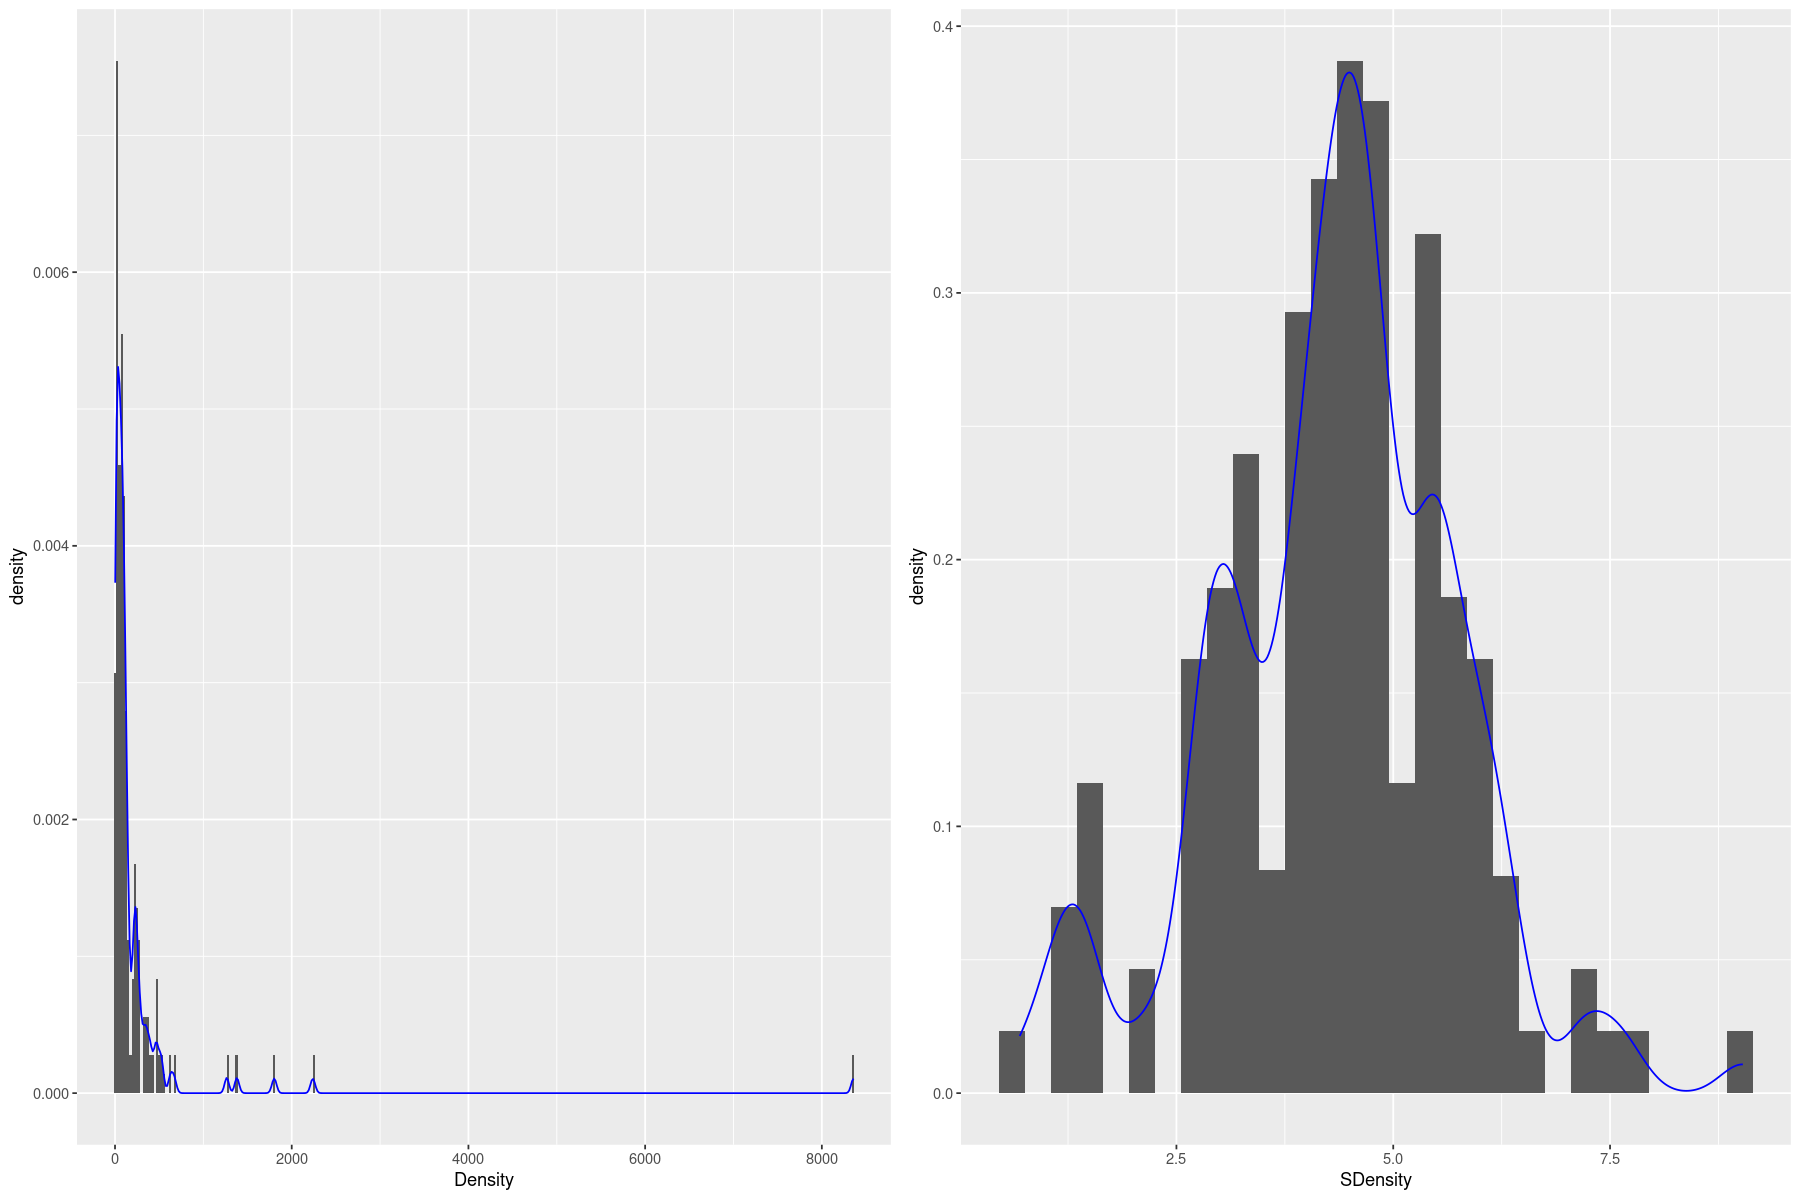

In [181]:
complete_energy[, "SDensity"] = log(complete_energy[, "Density"])

g1 = ggplot(complete_energy,aes(x=Density))+ geom_histogram(aes(y=..density..),binwidth = 25)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SDensity))+ geom_histogram(aes(y=..density..),binwidth = 0.3)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

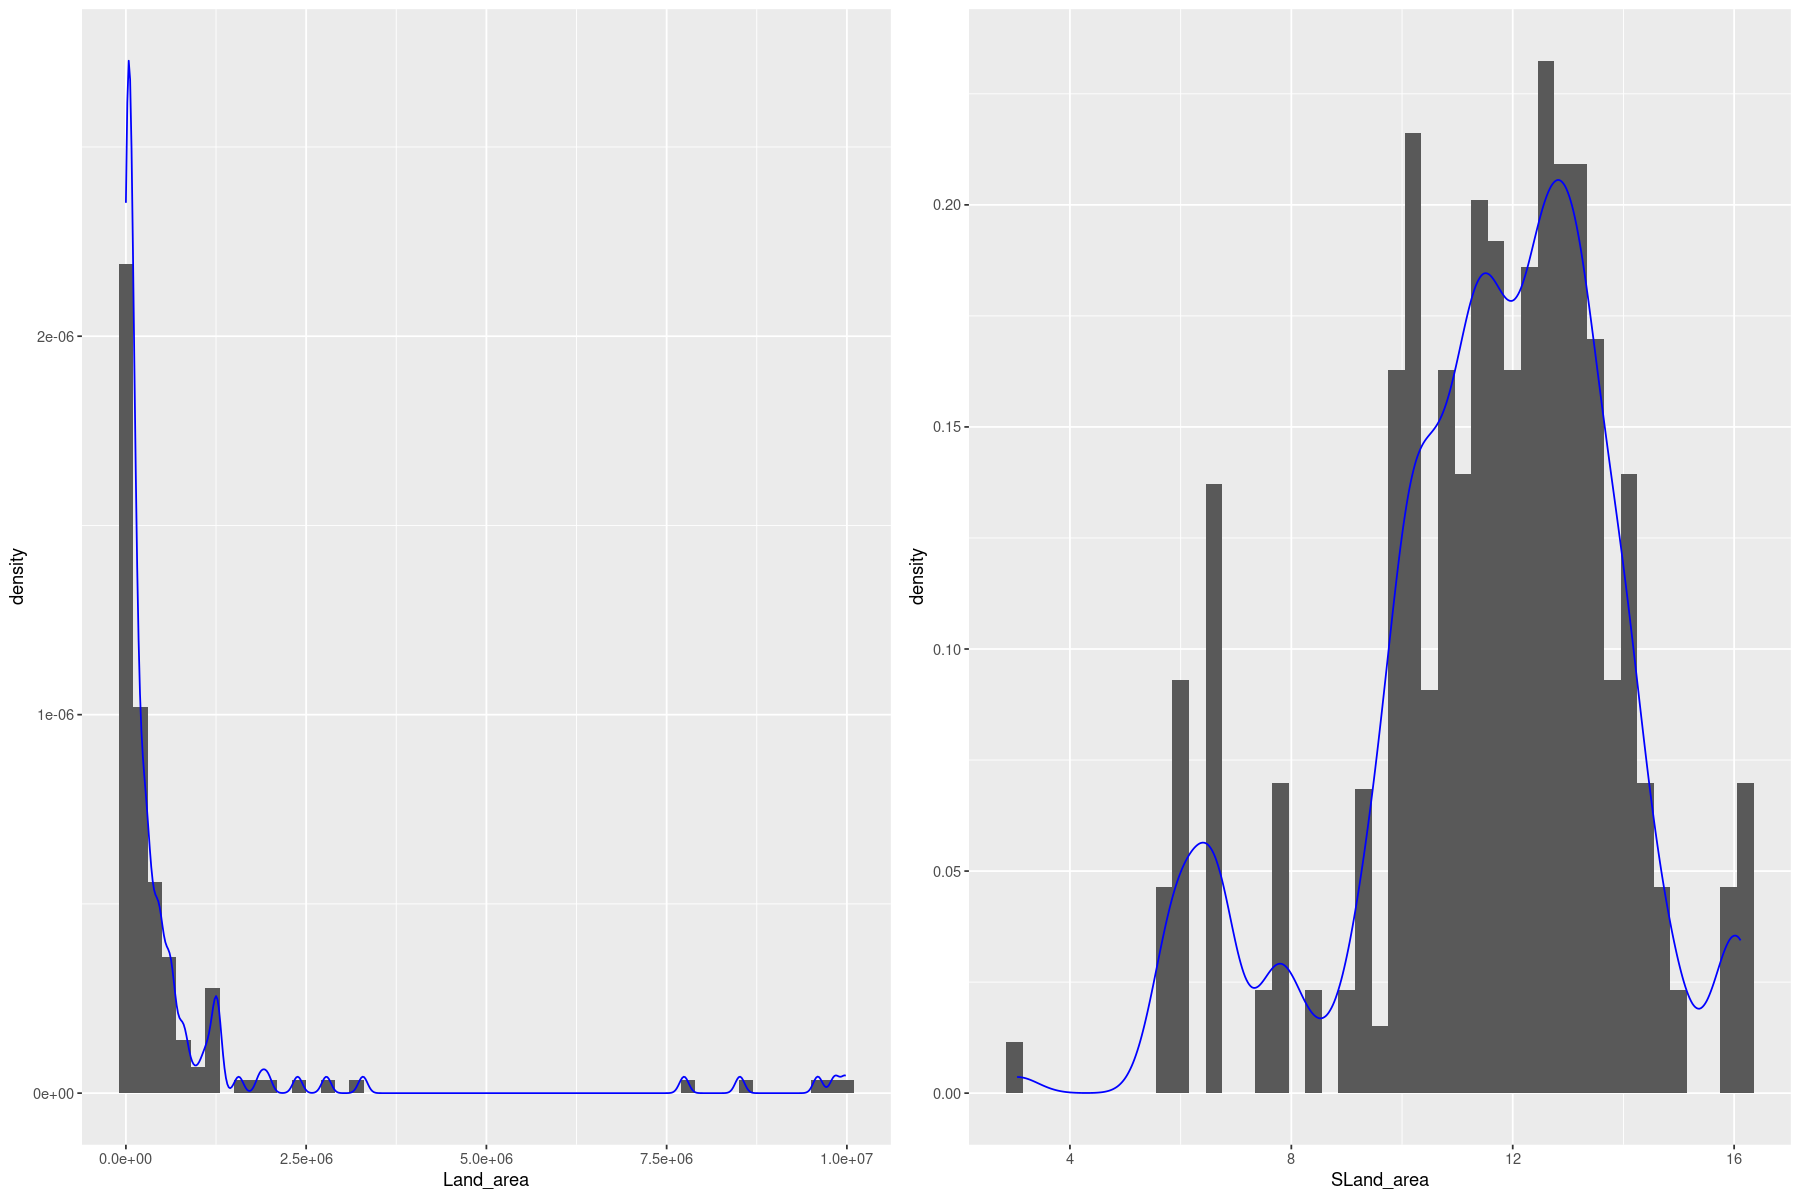

In [182]:
complete_energy[, "SLand_area"] = log(complete_energy[, "Land_area"])

g1 = ggplot(complete_energy,aes(x=Land_area))+ geom_histogram(aes(y=..density..),binwidth = 200000)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SLand_area))+ geom_histogram(aes(y=..density..),binwidth = 0.3)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

## Question 5

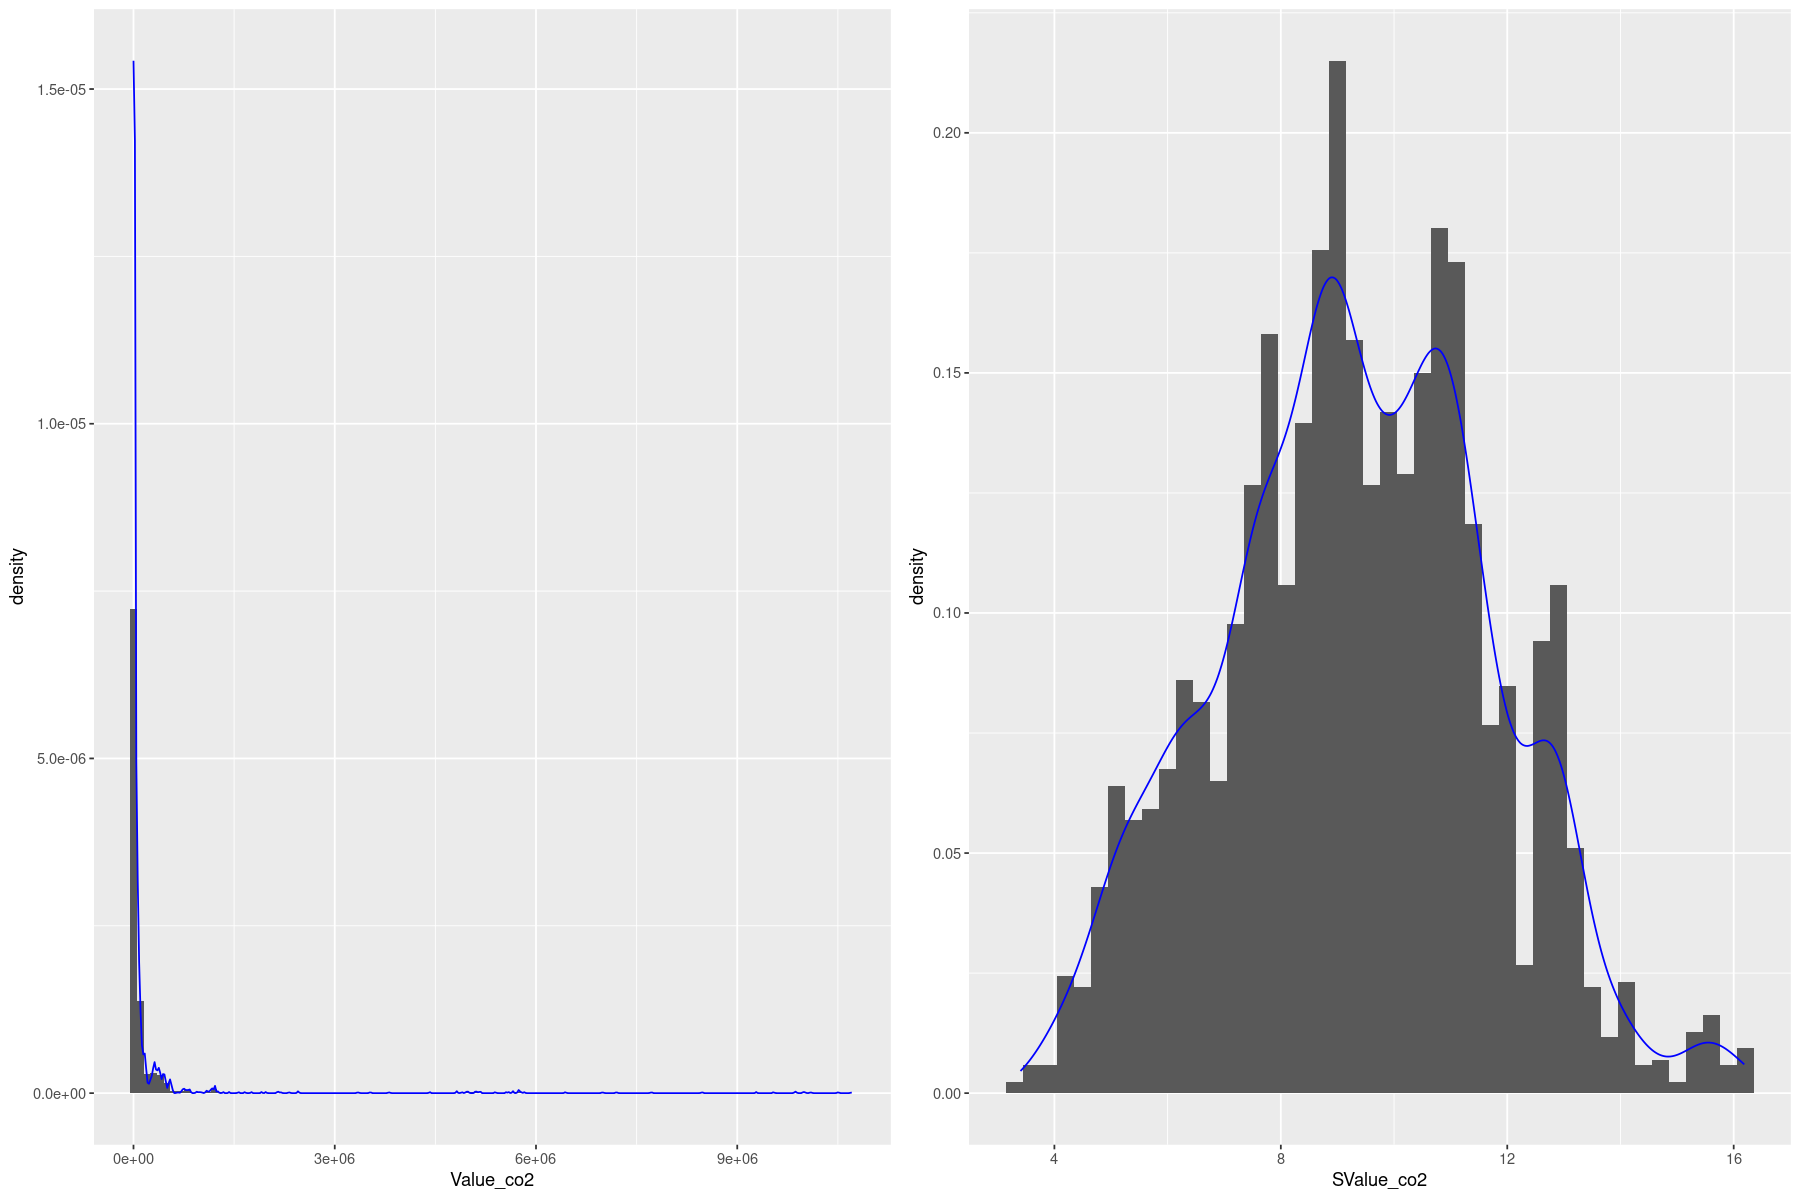

In [183]:
complete_energy[, "SValue_co2"] = log(complete_energy[, "Value_co2"])

g1 = ggplot(complete_energy,aes(x=Value_co2))+ geom_histogram(aes(y=..density..),binwidth = 100000)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SValue_co2))+ geom_histogram(aes(y=..density..),binwidth = 0.3)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

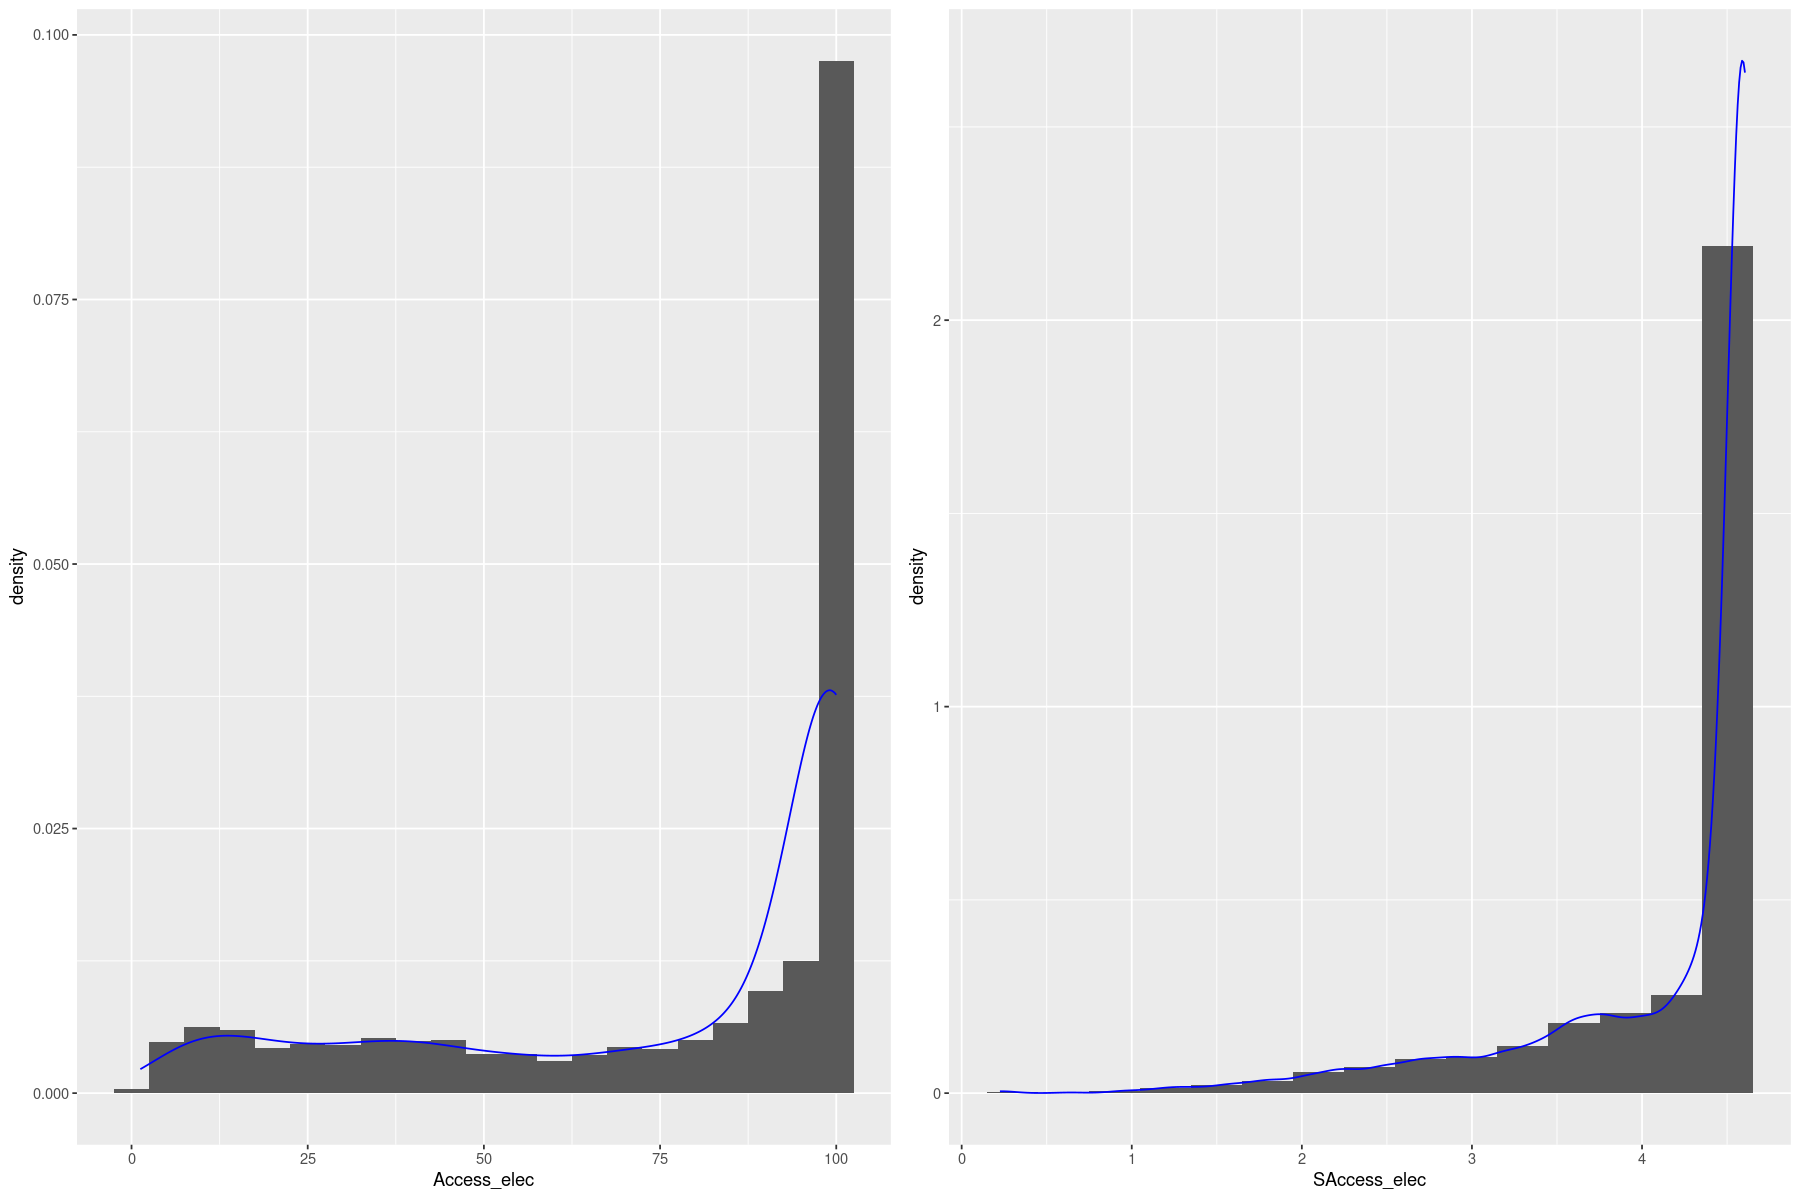

In [184]:
complete_energy[, "SAccess_elec"] = log(complete_energy[, "Access_elec"])

g1 = ggplot(complete_energy,aes(x=Access_elec))+ geom_histogram(aes(y=..density..),binwidth = 5)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SAccess_elec))+ geom_histogram(aes(y=..density..),binwidth =0.3)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

#Pourquoi deux fois ? 

In [185]:
#for (i in 3:length(names(complete_energy))) {

#complete_energy[, "SAccess.to.electricity....of.population."] = log(complete_energy[, "Access.to.electricity....of.population."])

#g1 = ggplot(complete_energy,aes(x=Access.to.electricity....of.population.))+ geom_histogram(aes(y=..density..),binwidth = 5)+geom_density(alpha=.1,col="blue") 
#g2 = ggplot(complete_energy,aes(x=SAccess.to.electricity....of.population.))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

#grid.arrange(g1,g2,ncol=2)
    
#}

In [186]:
#summary(complete_energy)

In [187]:
complete_energy = complete_energy[-c(3,4,5,6,7,8,9,10,11,14,15,16)]

In [188]:
summary(complete_energy)

    Entity               Year        Value_co2          gdp_growth     
 Length:2868        2014   : 147   Min.   :      30   Min.   :-36.658  
 Class :character   2015   : 147   1st Qu.:    2188   1st Qu.:  1.771  
 Mode  :character   2016   : 146   Median :   10425   Median :  3.788  
                    2017   : 146   Mean   :  168818   Mean   :  3.895  
                    2018   : 146   3rd Qu.:   58145   3rd Qu.:  5.957  
                    2019   : 146   Max.   :10707220   Max.   : 63.380  
                    (Other):1990                                       
    Latitude         Longitude        SAccess_elec   SAccess_fuels  
 Min.   :-40.901   Min.   :-175.20   Min.   :0.225   Min.   :0.000  
 1st Qu.:  1.651   1st Qu.: -10.94   1st Qu.:3.975   1st Qu.:3.139  
 Median : 17.061   Median :  18.64   Median :4.575   Median :4.413  
 Mean   : 18.140   Mean   :  12.97   Mean   :4.160   Mean   :3.633  
 3rd Qu.: 39.400   3rd Qu.:  43.68   3rd Qu.:4.605   3rd Qu.:4.615  
 Max.   : 

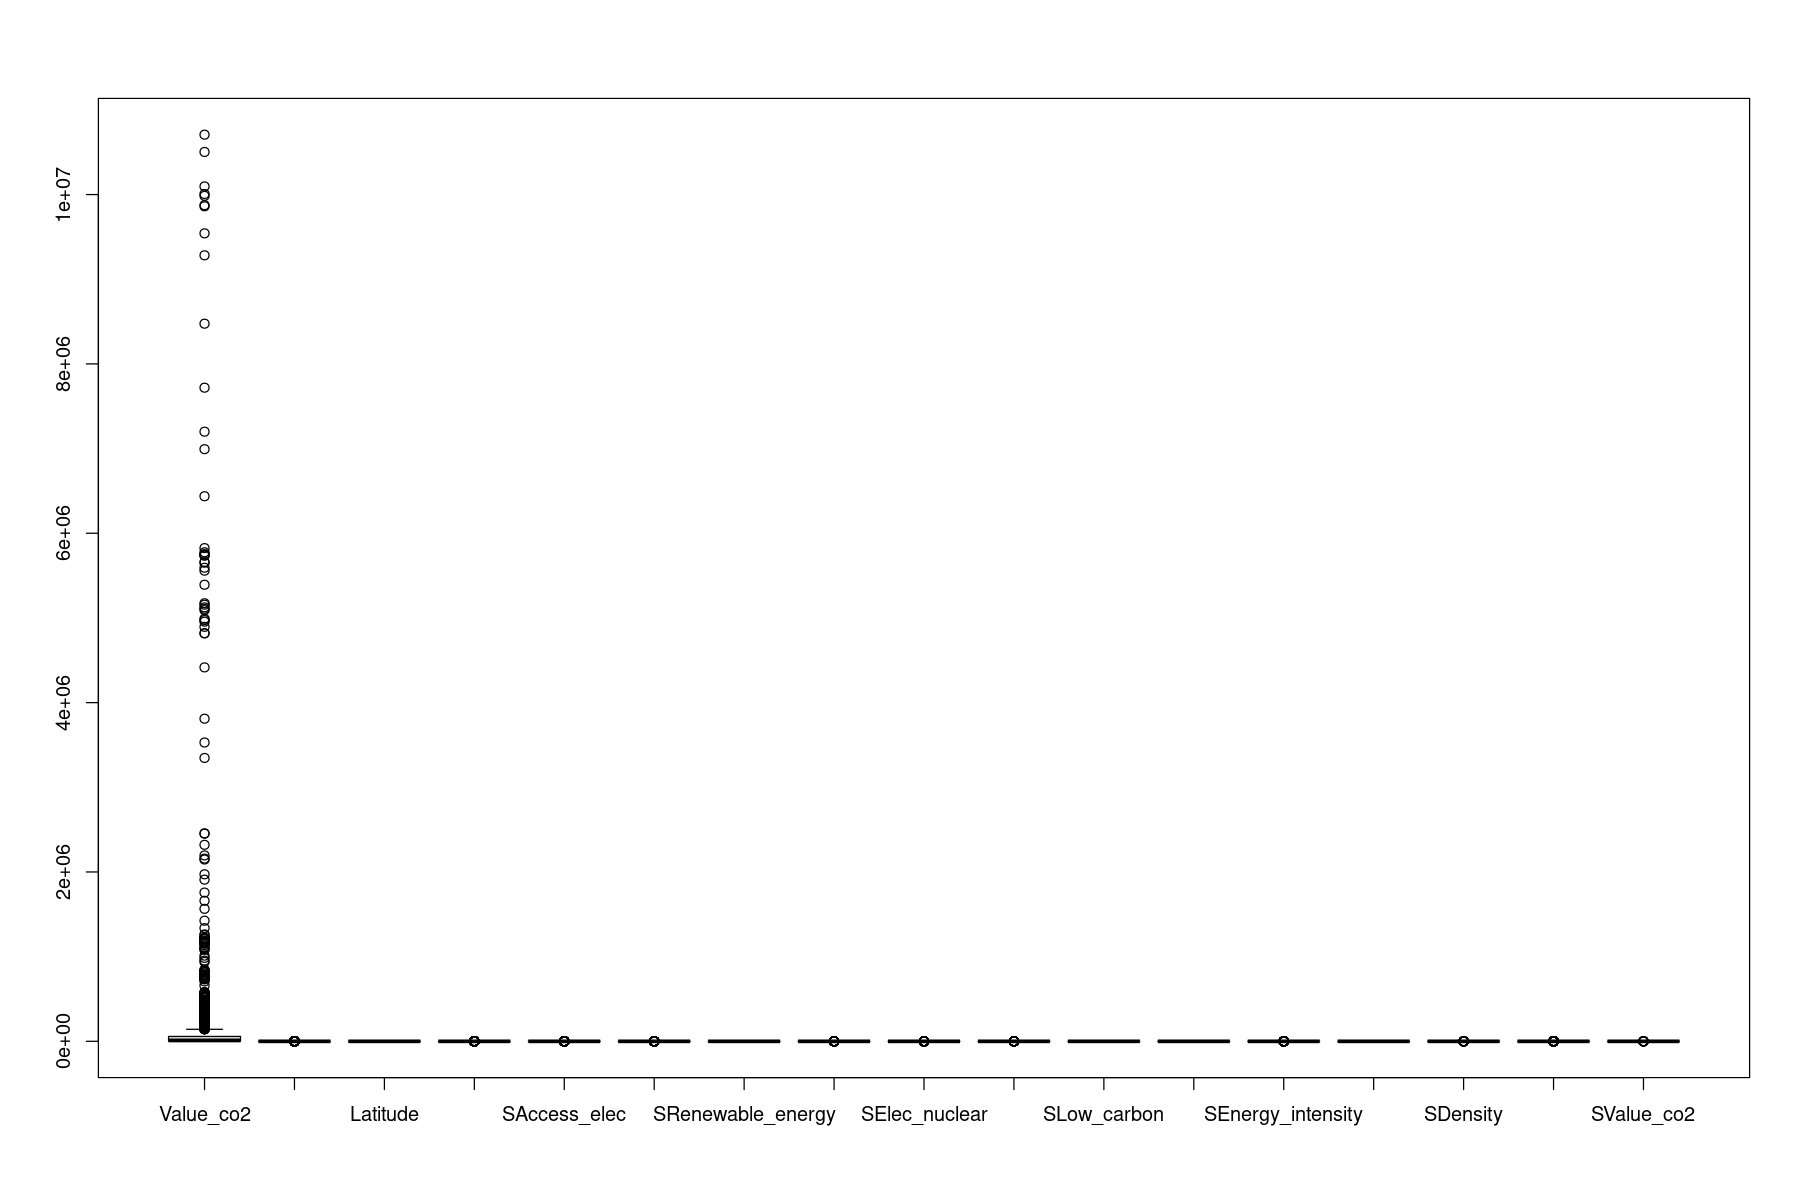

In [189]:
boxplot(complete_energy[,-c(1,2)])

On affiche toutes les variables, mais comme elles n'ont pas la même échelle, c'est difficile à interpréter.

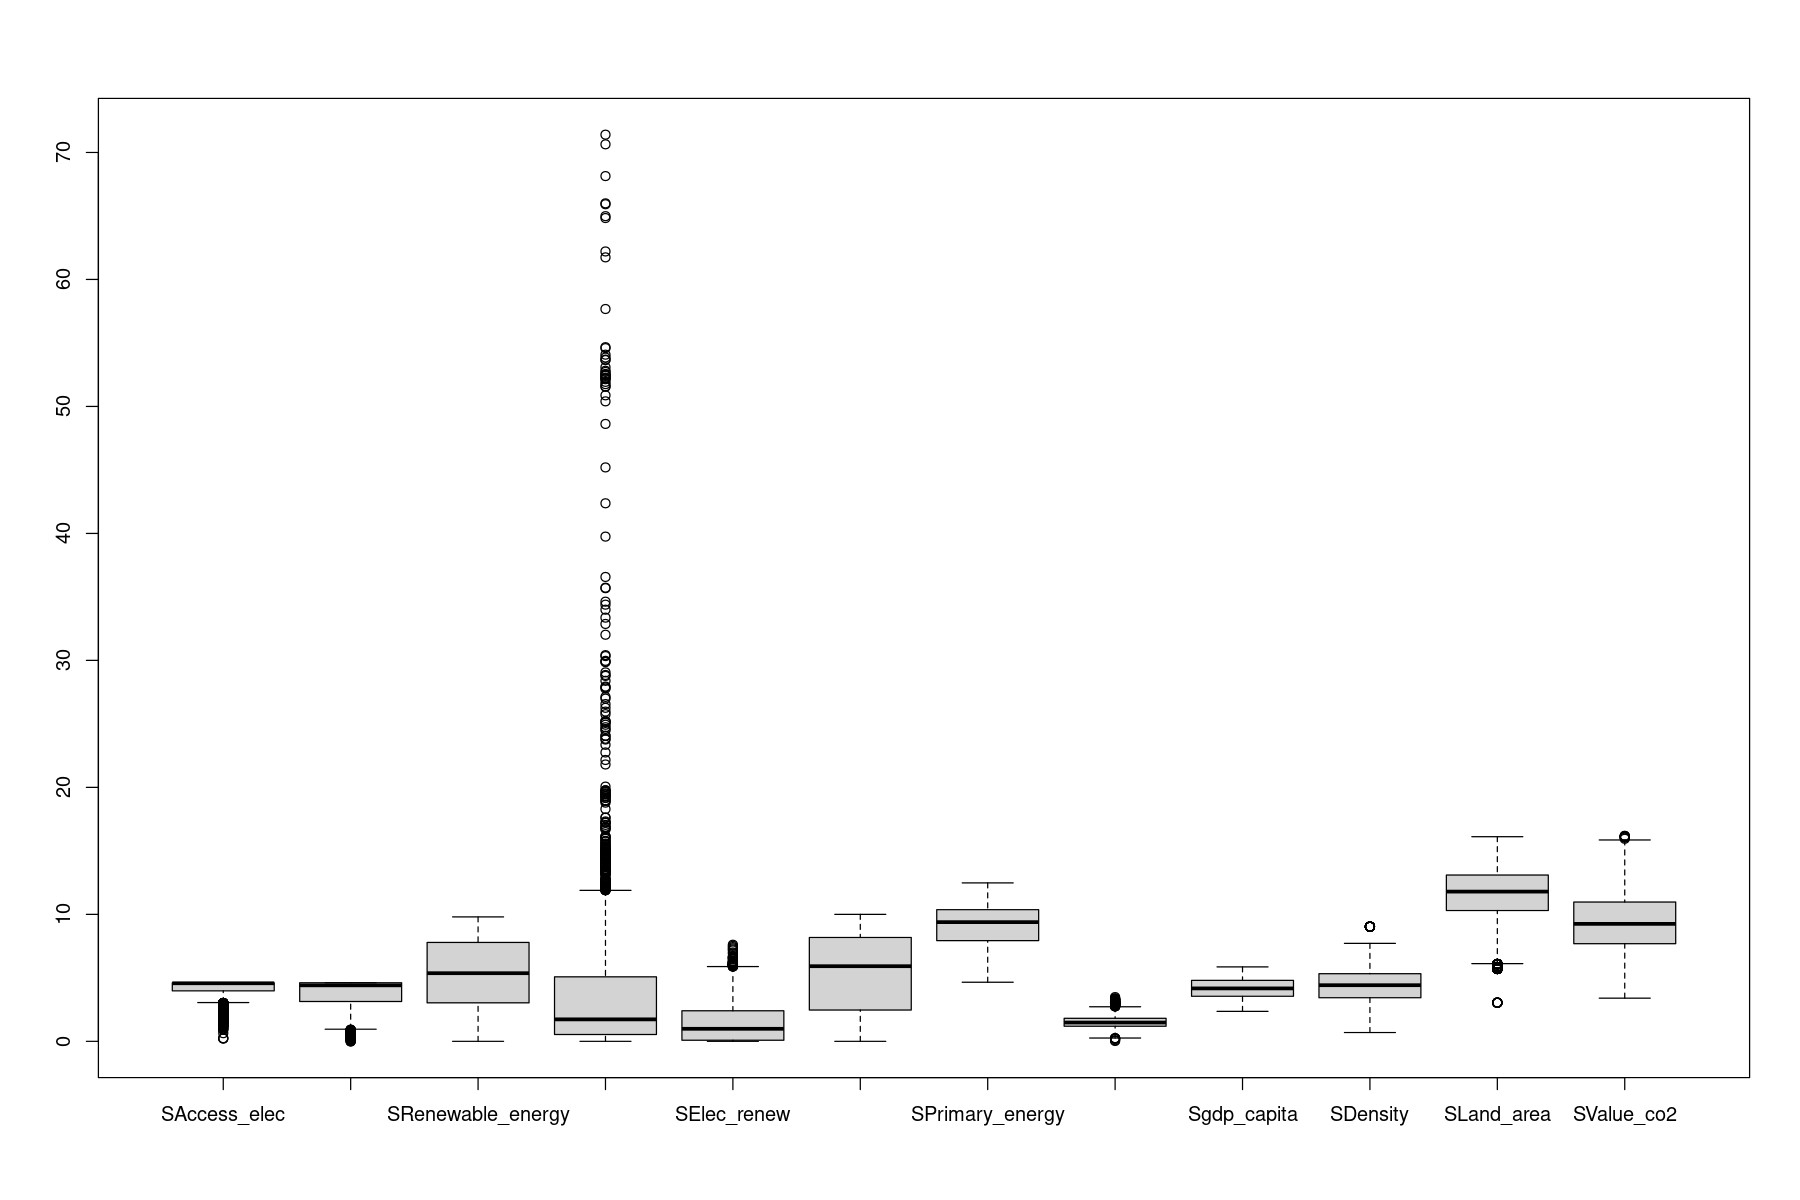

In [190]:
boxplot(complete_energy[,-c(1:6,11)])

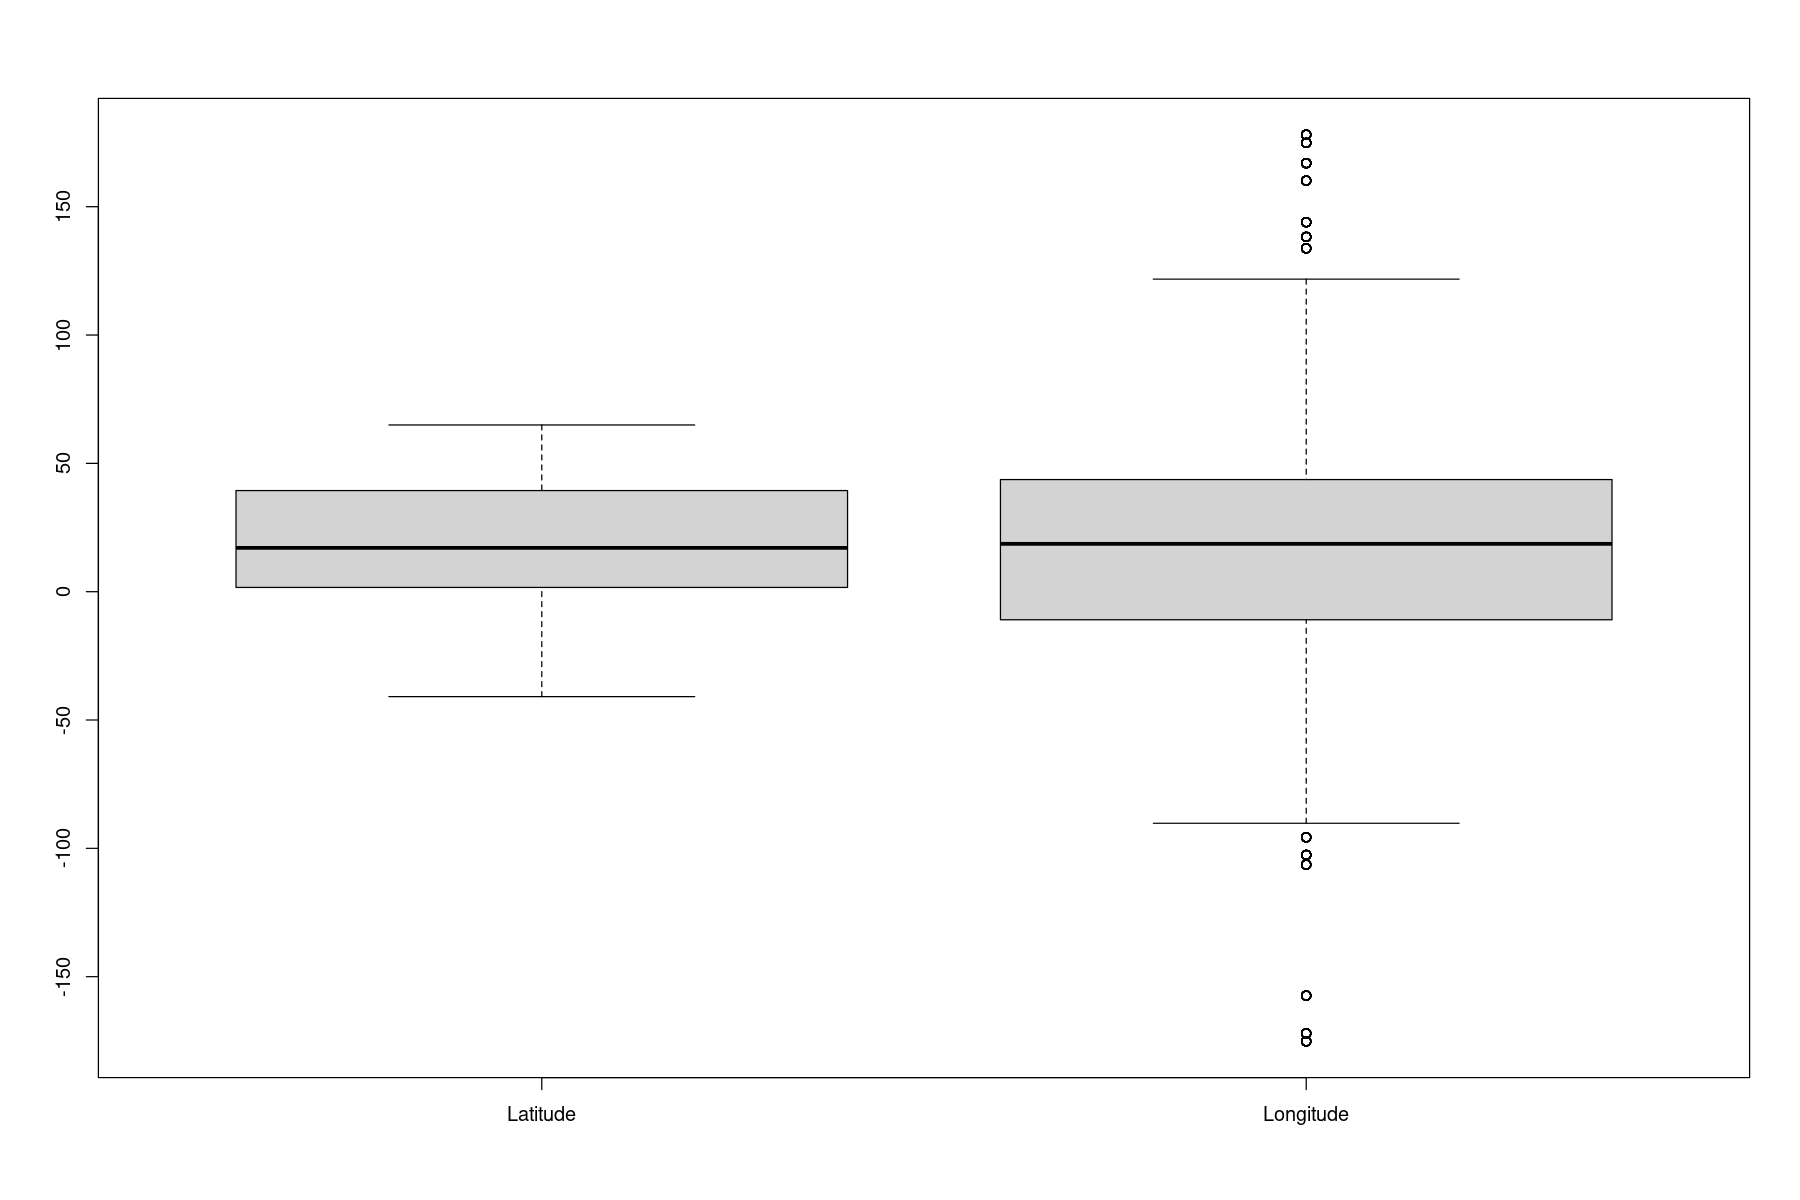

In [191]:
boxplot(complete_energy[,c(5:6)])

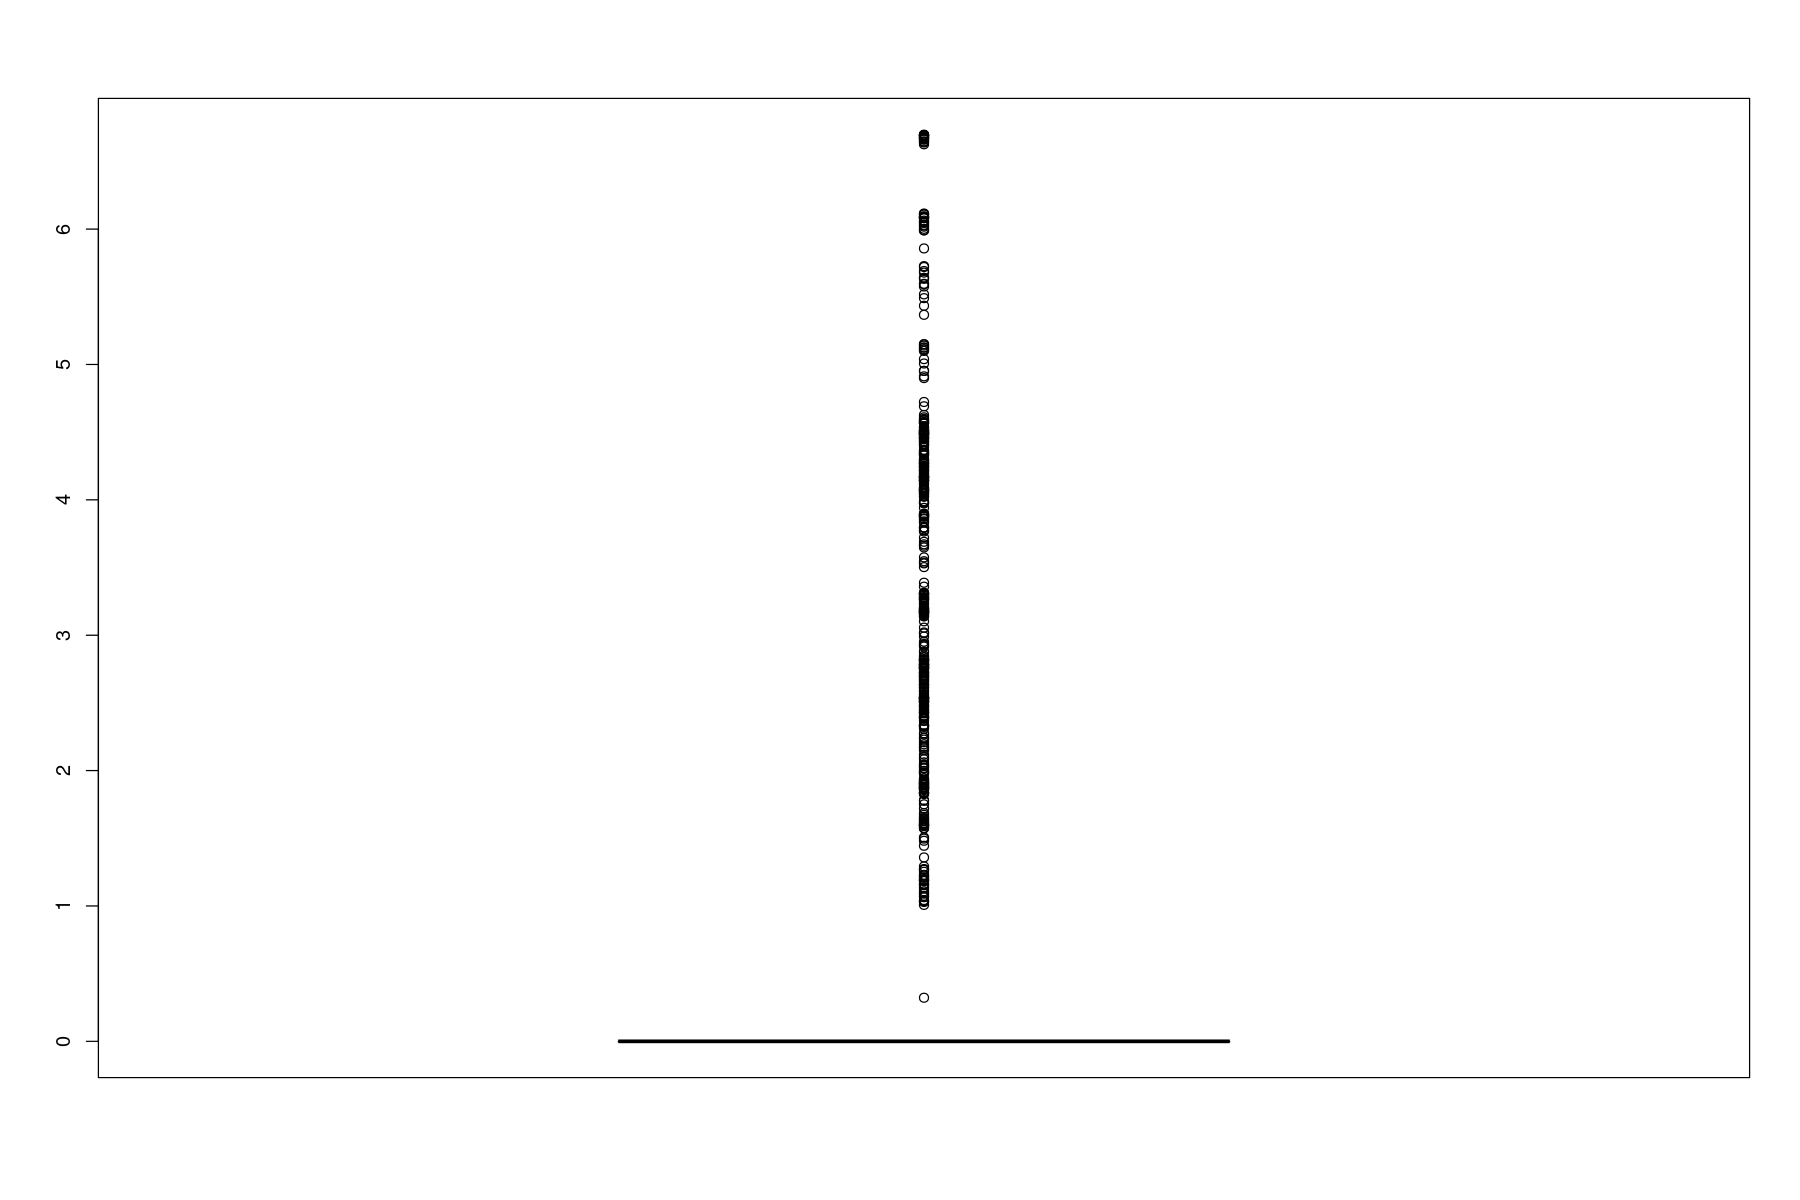

In [192]:
boxplot(complete_energy[,c(11)]) #nuclear

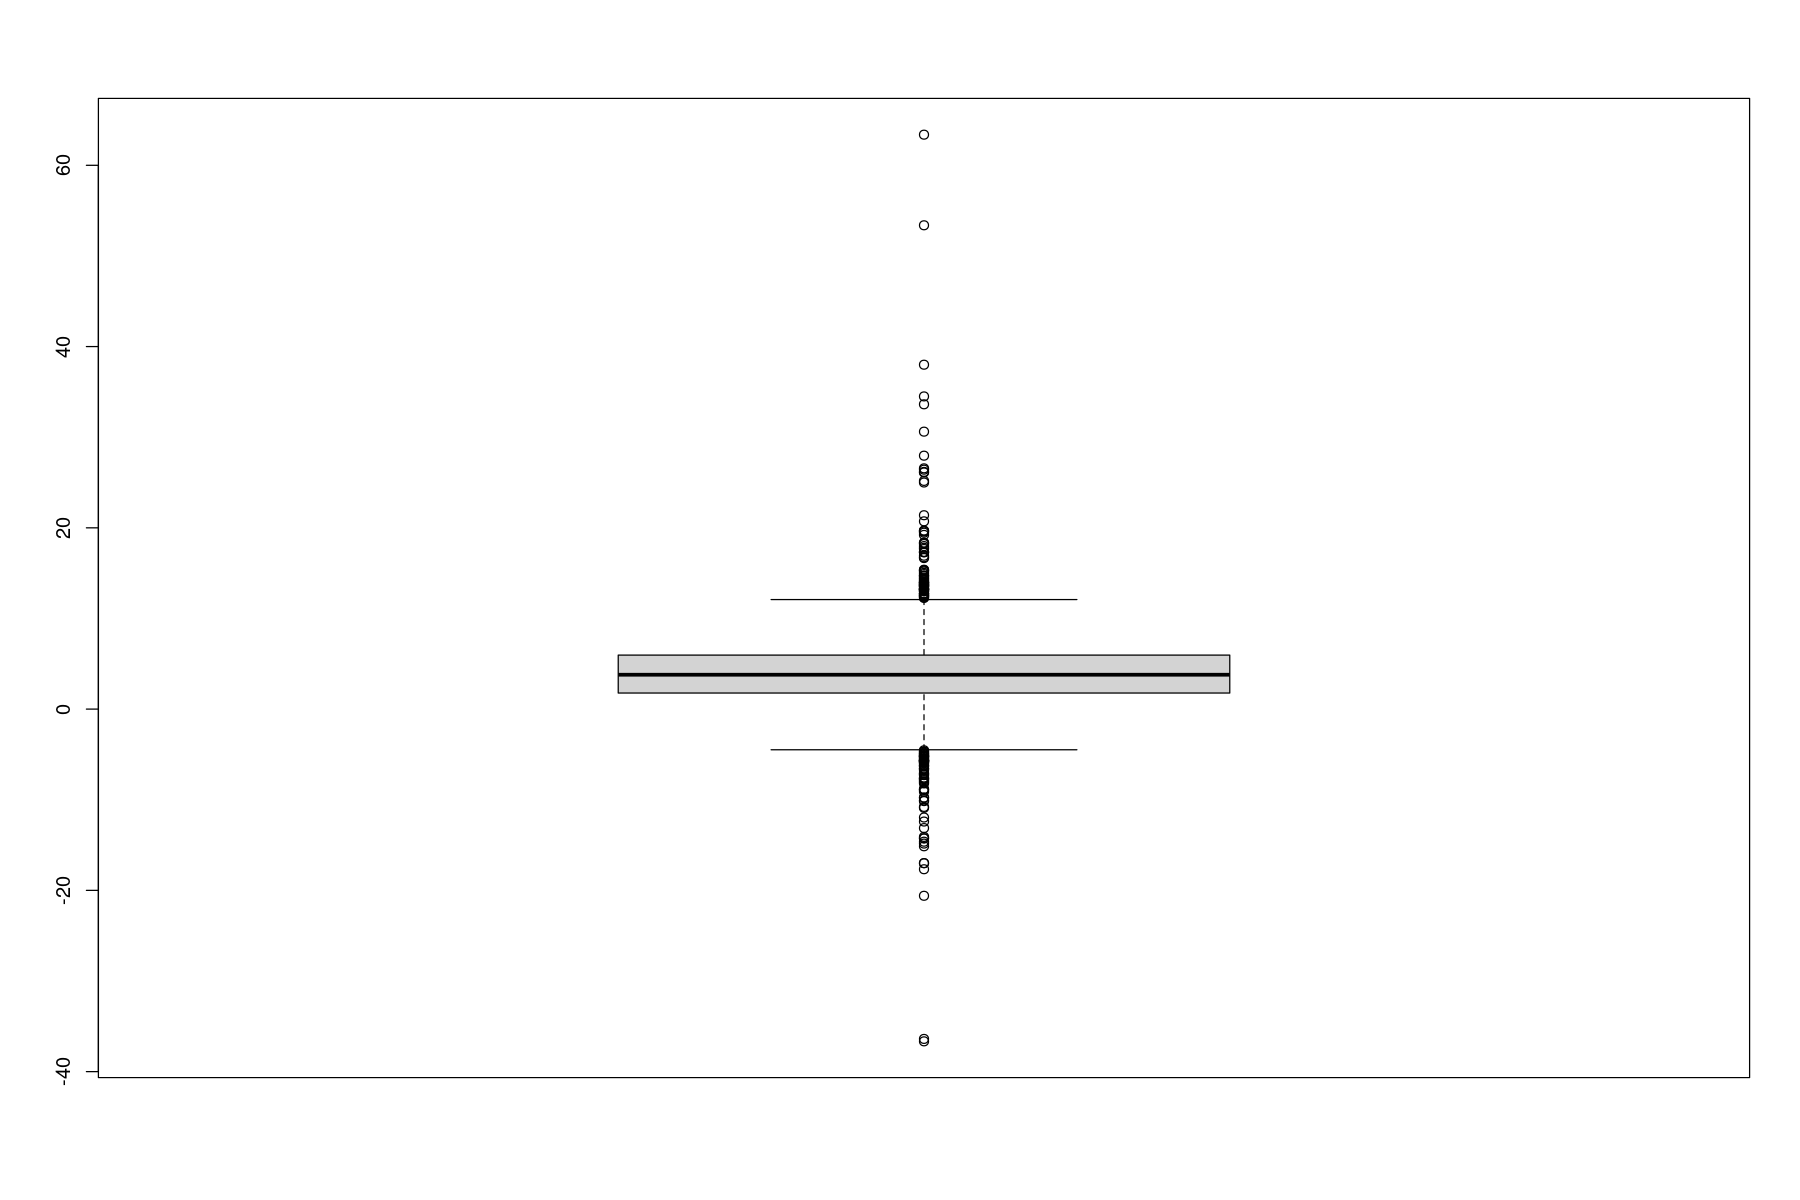

In [193]:
boxplot(complete_energy[,c(4)]) #gdp growth

On ne regarde à présent que les variables transformée. L'échelle est meilleure

## Question 6 

### Analyse descriptive multidimensionnelle

#### Variable quantitative

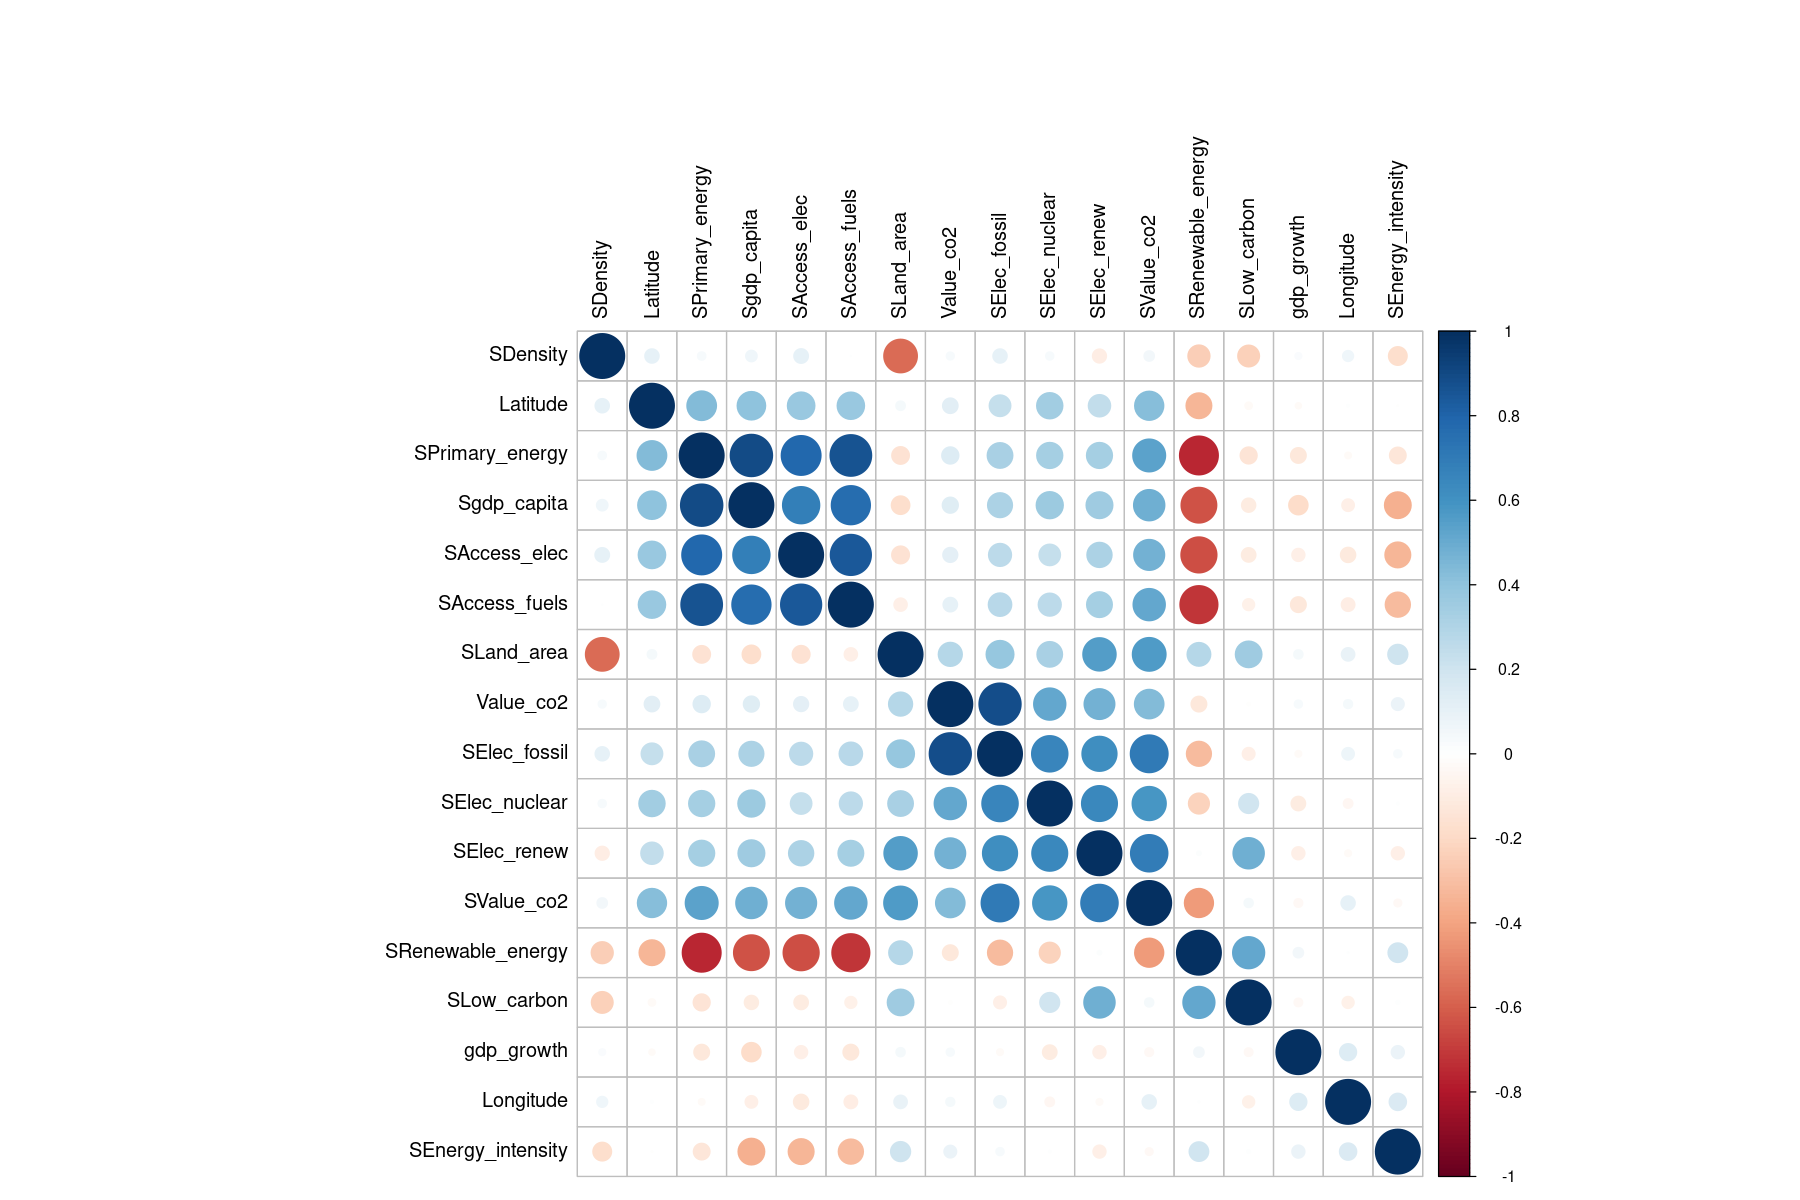

In [194]:
numeric_energy =complete_energy[sapply(complete_energy, is.numeric)]
mcor <- cor(numeric_energy)
par(mfrow=c(1,1), mar=c(5,5,2,2))
corrplot(mcor, order="hclust", tl.col="black")

In [195]:
#par(mfrow = c(6,3) , mar = c(4,4,2,1))

#for (i in 3:length(names(complete_energy))) {
 #   dfi = complete_energy[,c(2,i)]
   # plot(dfi, main=names(complete_energy)[i],xlab='Values')
#}

#### Variable qualitative

Pour cette étude, nous avons essayé plusieurs techniques pour visualiser nos données. Cependant nous avons pu remarquer que le nombre d'observations par pays n'est pas identique en fonction des années, ce qui ne rend pas forcément fiable nos exploitations.En effet, nous avons également essayé d'afficher des boxplots de l'ensemble des variables en fonction de Year, mais ce n'était pas très pertinent.   

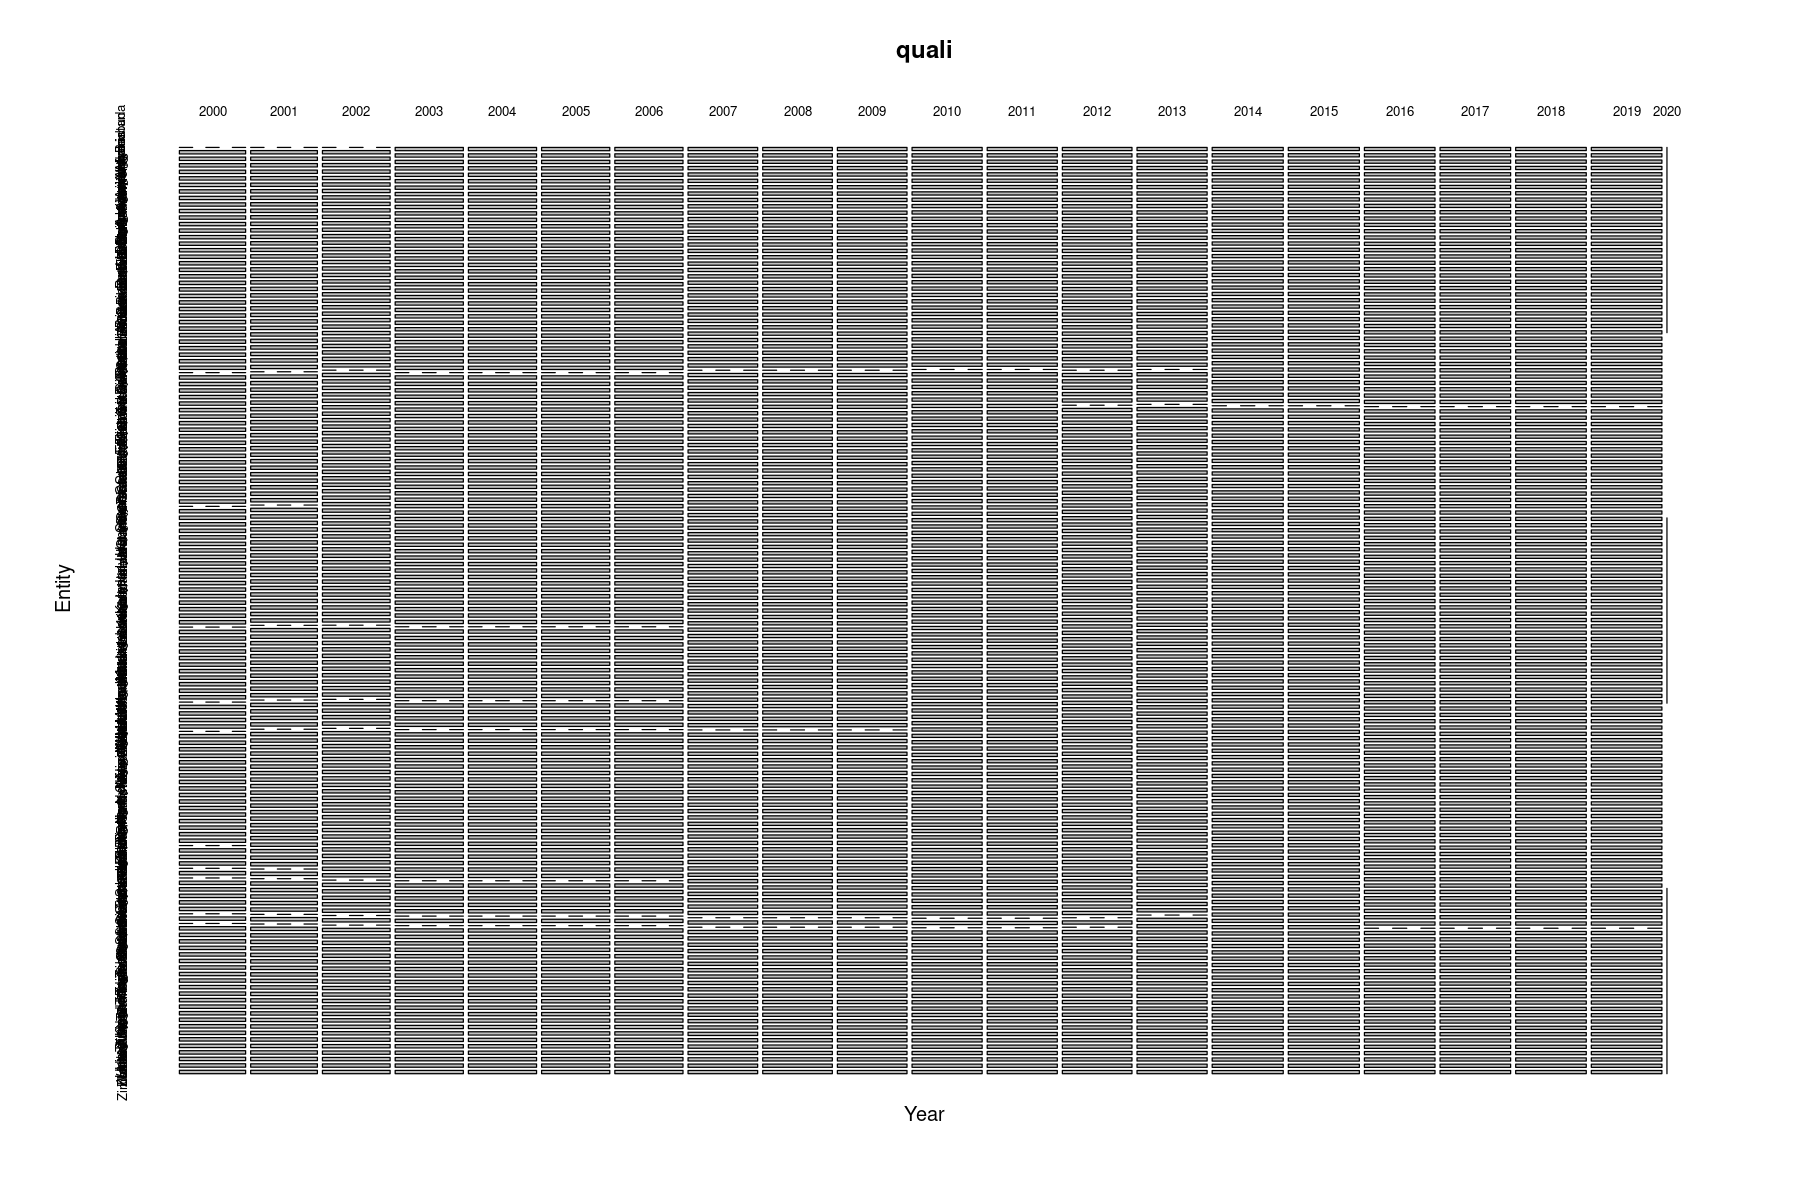

In [196]:
quali= xtabs(~Year + Entity, data = complete_energy)
mosaicplot(quali)

## Question 8

### Dépendance entre Year et la variable à prédire

In [197]:
numeric_energy =complete_energy[sapply(complete_energy, is.numeric)]
mcor <- cor(numeric_energy)
mcor

Value_co2    gdp_growth  Latitude     Longitude   
Value_co2          1.000000000  0.03411701  0.120536382  0.041251083
gdp_growth         0.034117009  1.00000000 -0.020155317  0.145424368
Latitude           0.120536382 -0.02015532  1.000000000  0.005383208
Longitude          0.041251083  0.14542437  0.005383208  1.000000000
SAccess_elec       0.113086972 -0.08667138  0.377298604 -0.117429902
SAccess_fuels      0.106404221 -0.12506100  0.374115257 -0.093581473
SRenewable_energy -0.124085468  0.05468604 -0.331451213  0.002843847
SElec_fossil       0.884187976 -0.02392442  0.234446949  0.079712007
SElec_nuclear      0.516949866 -0.10640649  0.343511618 -0.046396859
SElec_renew        0.471864935 -0.08729166  0.249426737 -0.023680676
SLow_carbon       -0.007522328 -0.03839108 -0.028380329 -0.073863556
SPrimary_energy    0.147546520 -0.12381293  0.435920911 -0.022953050
SEnergy_intensity  0.082319000  0.08686496 -0.002025071  0.150443869
Sgdp_capita        0.130053676 -0.18713373  0.405178572 -0.080057646
SDensity           0.032995225  0.02448516  0.103062783  0.061326129
SLand_area         0.289812800  0.04376595  0.045790681  0.091532246
SValue_co2         0.432835142 -0.03950100  0.423550406  0.102129945
                  SAccess_elec SAccess_fuels SRenewable_energy SElec_fossil
Value_co2          0.11308697   0.106404221  -0.124085468       0.88418798 
gdp_growth        -0.08667138  -0.125061004   0.054686042      -0.02392442 
Latitude           0.37729860   0.374115257  -0.331451213       0.23444695 
Longitude         -0.11742990  -0.093581473   0.002843847       0.07971201 
SAccess_elec       1.00000000   0.840577284  -0.646676860       0.26488052 
SAccess_fuels      0.84057728   1.000000000  -0.718101562       0.27530791 
SRenewable_energy -0.64667686  -0.718101562   1.000000000      -0.31325194 
SElec_fossil       0.26488052   0.275307913  -0.313251936       1.00000000 
SElec_nuclear      0.23236483   0.265832415  -0.220059929       0.65818060 
SElec_renew        0.31676661   0.331936061   0.011434267       0.61245018 
SLow_carbon       -0.10621389  -0.072790931   0.512679572      -0.08216487 
SPrimary_energy    0.78787031   0.861232925  -0.751055803       0.32859055 
SEnergy_intensity -0.33342613  -0.316369169   0.192684146       0.03446609 
Sgdp_capita        0.68961885   0.761871860  -0.635711896       0.31089742 
SDensity           0.10786672   0.001223283  -0.243306668       0.10247725 
SLand_area        -0.15912208  -0.089671597   0.281381821       0.38633521 
SValue_co2         0.47689118   0.517511015  -0.422251875       0.70961801 
                  SElec_nuclear SElec_renew SLow_carbon  SPrimary_energy
Value_co2          0.51694987    0.47186494 -0.007522328  0.14754652    
gdp_growth        -0.10640649   -0.08729166 -0.038391075 -0.12381293    
Latitude           0.34351162    0.24942674 -0.028380329  0.43592091    
Longitude         -0.04639686   -0.02368068 -0.073863556 -0.02295305    
SAccess_elec       0.23236483    0.31676661 -0.106213894  0.78787031    
SAccess_fuels      0.26583242    0.33193606 -0.072790931  0.86123292    
SRenewable_energy -0.22005993    0.01143427  0.512679572 -0.75105580    
SElec_fossil       0.65818060    0.61245018 -0.082164870  0.32859055    
SElec_nuclear      1.00000000    0.64193710  0.198956621  0.33973304    
SElec_renew        0.64193710    1.00000000  0.487452376  0.33815050    
SLow_carbon        0.19895662    0.48745238  1.000000000 -0.14495285    
SPrimary_energy    0.33973304    0.33815050 -0.144952845  1.00000000    
SEnergy_intensity  0.00485607   -0.08641200  0.009528002 -0.13928092    
Sgdp_capita        0.36722700    0.35977141 -0.101778276  0.89118810    
SDensity           0.03431112   -0.09898334 -0.237289992  0.03585797    
SLand_area         0.32743667    0.55175227  0.353529721 -0.15609946    
SValue_co2         0.58046534    0.69550200  0.043307117  0.53714390    
                  SEnergy_intensity Sgdp_capita SDensity     SLand_area 
Value_co2          0.

Ici, nous avons la matrice de corrélation entre toutes les variables de notre energyset. En effet, on peut voir que la corrélation entre la variable Year et Value_co2_emissions_kt_by_country semble faible. Sa valeur faut 0.02055306	

On voit ici que la corrélation entre les variables Year et Value_co2 est très faible. En effet, on obtient un coefficient de corélation proche de 0, ce qui montre que les deux variables ne sont pas coorélées.

In [198]:
correlation_value=cor(as.numeric(complete_energy$Year), complete_energy$SValue_co2)
print(correlation_value) # méthode pour avoir le coefficient directement
#Est ce qu'on fait avec SValue ou pas ? 

[1] 0.04714463


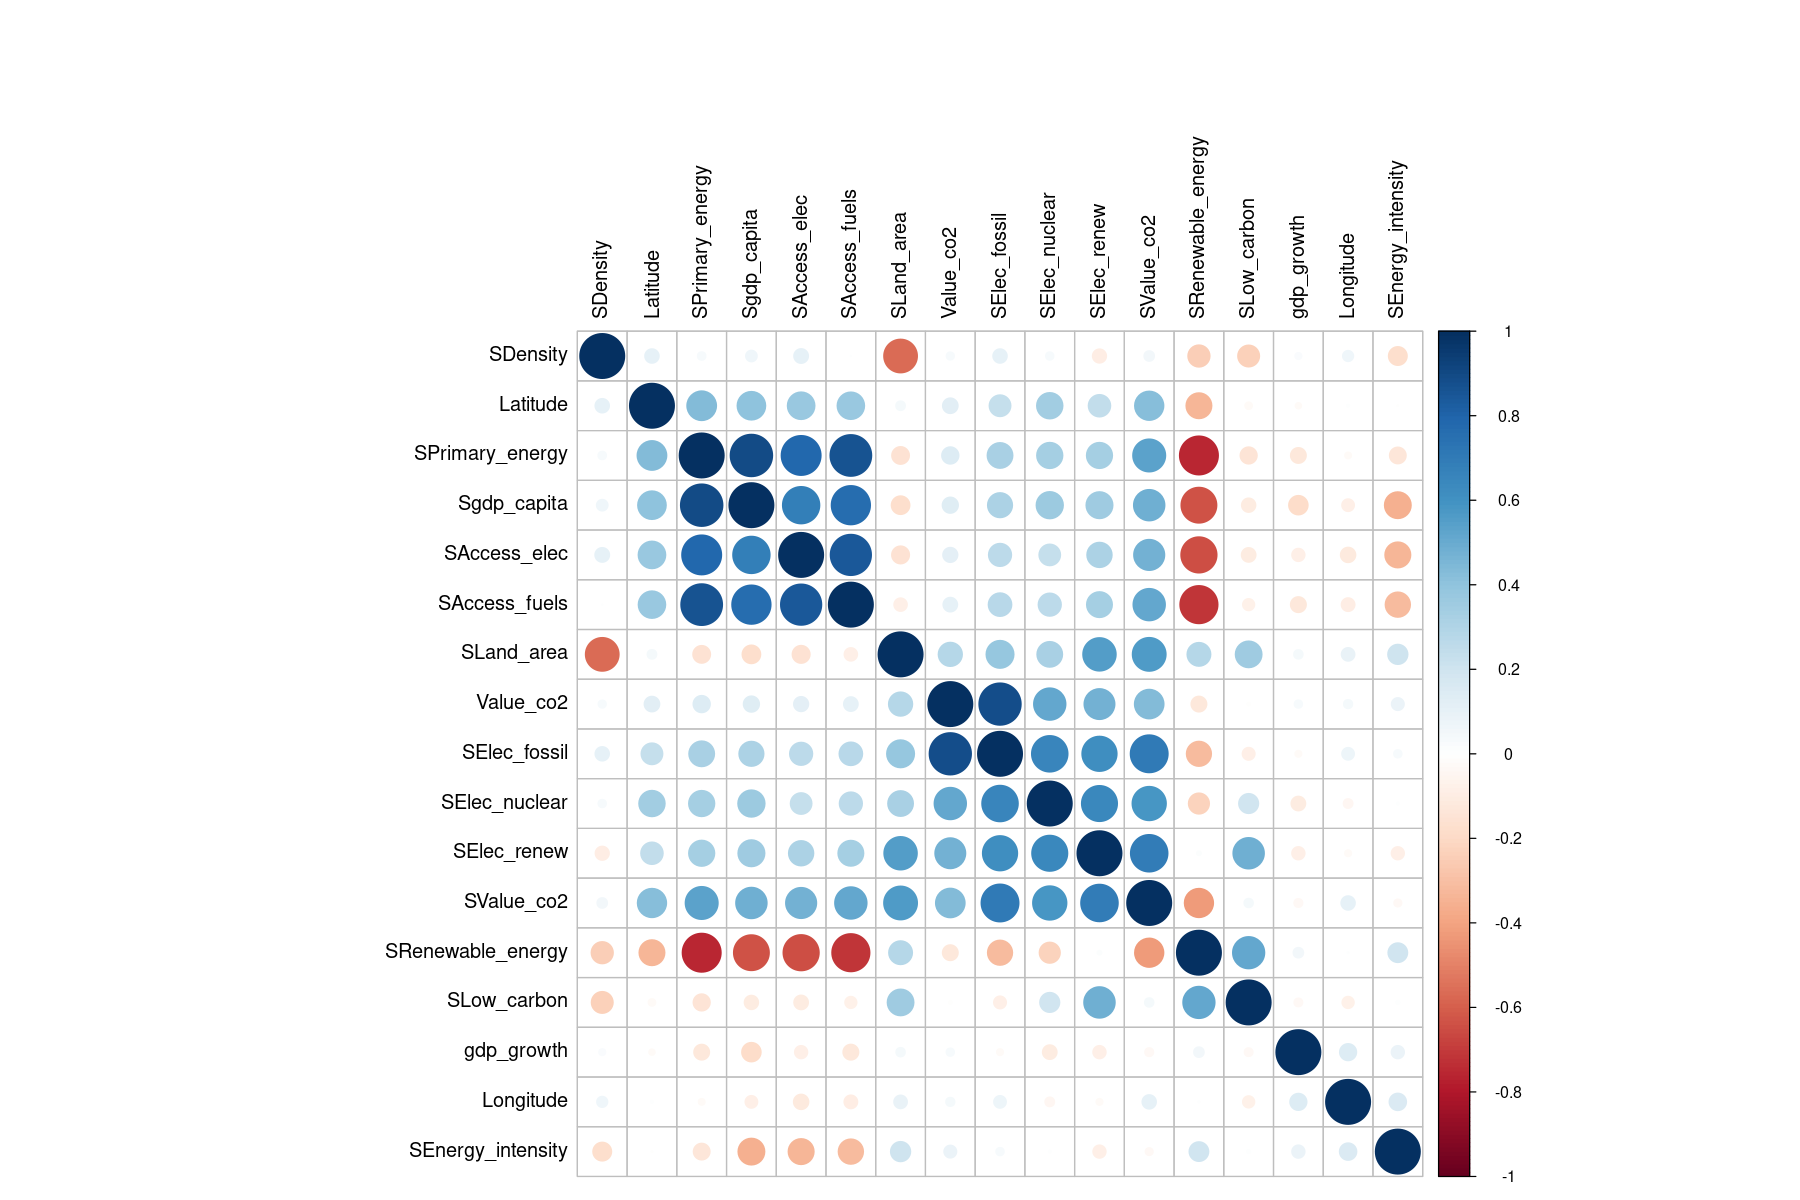

In [199]:
options(corrplot.width = 20, corrplot.height = 20)
corrplot(mcor, order="hclust", tl.col="black")

Ce graphique nous donne la corrélation entre chaque point. En effet, on peut par exemple voir que la variable Value_co2_emissions_kt_by_country est bien corrélée car elle est proche de 1. Au contraire, la longitude n'est pas bine représentée, on peut pas avoir réellement confiance en ses valeurs. 
De plus, si nous comparons les variables Electricity.from.renewables et Value_co2_emissions_kt_by_country, l'angle entre les deux est très faible, ce qui signifie qu'elles sont bien corrélées en elles. A l'inverse, les variables Value_co2_emissions_kt_by_country et Renewable.energy.share.in.the.total.final.energy.consumption ont un angle quasi droit entre elles, ce qui indique qu'elles sont indépendantes.

## Question 7

In [200]:
str(complete_energy)

'data.frame':	2868 obs. of  19 variables:
 $ Entity           : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year             : Factor w/ 21 levels "2000","2001",..: 4 5 6 7 8 9 10 11 12 13 ...
 $ Value_co2        : num  1220 1030 1550 1760 1770 ...
 $ gdp_growth       : num  8.83 1.41 11.23 5.36 13.83 ...
 $ Latitude         : num  33.9 33.9 33.9 33.9 33.9 ...
 $ Longitude        : num  67.7 67.7 67.7 67.7 67.7 ...
 $ SAccess_elec     : num  2.69 3 3.23 3.42 3.58 ...
 $ SAccess_fuels    : num  2.35 2.48 2.58 2.7 2.79 ...
 $ SRenewable_energy: num  6.05 6.65 5.82 5.65 5.36 ...
 $ SElec_fossil     : num  0.557 0.574 0.583 0.447 0.447 ...
 $ SElec_nuclear    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SElec_renew      : num  0.489 0.445 0.464 0.495 0.56 ...
 $ SLow_carbon      : num  8.19 7.93 7.96 8.73 8.89 ...
 $ SPrimary_energy  : num  5.44 5.32 5.53 5.72 5.87 ...
 $ SEnergy_intensity: num  0.336 0.182 0.344 0.405 0.425 ...
 $ Sgdp_capita      : num  2.63 2.68 2.74 2.79 2

### Analyse en composante principale

In [201]:
energy_pca = scale(complete_energy[,-c(1,2,3)], center = TRUE, scale = TRUE)
head(energy_pca)

gdp_growth   Latitude  Longitude SAccess_elec SAccess_fuels SRenewable_energy
4  1.062712614 0.6338505 0.8359896 -1.9758403   -0.9495474     0.27838517      
5 -0.534097141 0.6338505 0.8359896 -1.5610729   -0.8568021     0.48769117      
6  1.578777364 0.6338505 0.8359896 -1.2445776   -0.7799768     0.19625172      
7  0.314722045 0.6338505 0.8359896 -0.9884929   -0.6927000     0.13536853      
8  2.137714332 0.6338505 0.8359896 -0.7733013   -0.6236650     0.03627968      
9  0.006383943 0.6338505 0.8359896 -0.5552194   -0.5626073    -0.23163510      
  SElec_fossil SElec_nuclear SElec_renew SLow_carbon SPrimary_energy
4 -0.4890647   -0.4113497    -0.6367967  0.8483680   -2.258782      
5 -0.4867492   -0.4113497    -0.6642972  0.7739608   -2.330927      
6 -0.4856178   -0.4113497    -0.6523632  0.7835205   -2.203004      
7 -0.5034139   -0.4113497    -0.6329647  1.0069395   -2.088298      
8 -0.5034139   -0.4113497    -0.5922914  1.0527261   -1.996101      
9 -0.5048969   -0.4113497    -0.6723815  0.9695002   -1.667974      
  SEnergy_intensity Sgdp_capita SDensity   SLand_area SValue_co2
4 -2.326985         -1.963254   -0.1815456 0.7884167  -0.9320640
5 -2.624948         -1.898120   -0.1815456 0.7884167  -1.0030475
6 -2.313227         -1.812539   -0.1815456 0.7884167  -0.8316828
7 -2.193626         -1.758263   -0.1815456 0.7884167  -0.7784075
8 -2.155349         -1.562128   -0.1815456 0.7884167  -0.7760319
9 -1.696431         -1.553454   -0.1815456 0.7884167  -0.4830358

In [202]:
resultat_pca = PCA(energy_pca,ncp=16)
get_eig(resultat_pca)

eigenvalue  variance.percent cumulative.variance.percent
Dim.1  5.484759138 34.27974461       34.27974                  
Dim.2  2.991178926 18.69486828       52.97461                  
Dim.3  1.522017152  9.51260720       62.48722                  
Dim.4  1.173257491  7.33285932       69.82008                  
Dim.5  0.984740573  6.15462858       75.97471                  
Dim.6  0.865739312  5.41087070       81.38558                  
Dim.7  0.844580761  5.27862976       86.66421                  
Dim.8  0.633640931  3.96025582       90.62446                  
Dim.9  0.480224132  3.00140083       93.62587                  
Dim.10 0.296853269  1.85533293       95.48120                  
Dim.11 0.269506708  1.68441692       97.16561                  
Dim.12 0.184078742  1.15049213       98.31611                  
Dim.13 0.122602638  0.76626649       99.08237                  
Dim.14 0.101238596  0.63274122       99.71511                  
Dim.15 0.038753005  0.24220628       99.95732                  
Dim.16 0.006828628  0.04267892      100.00000

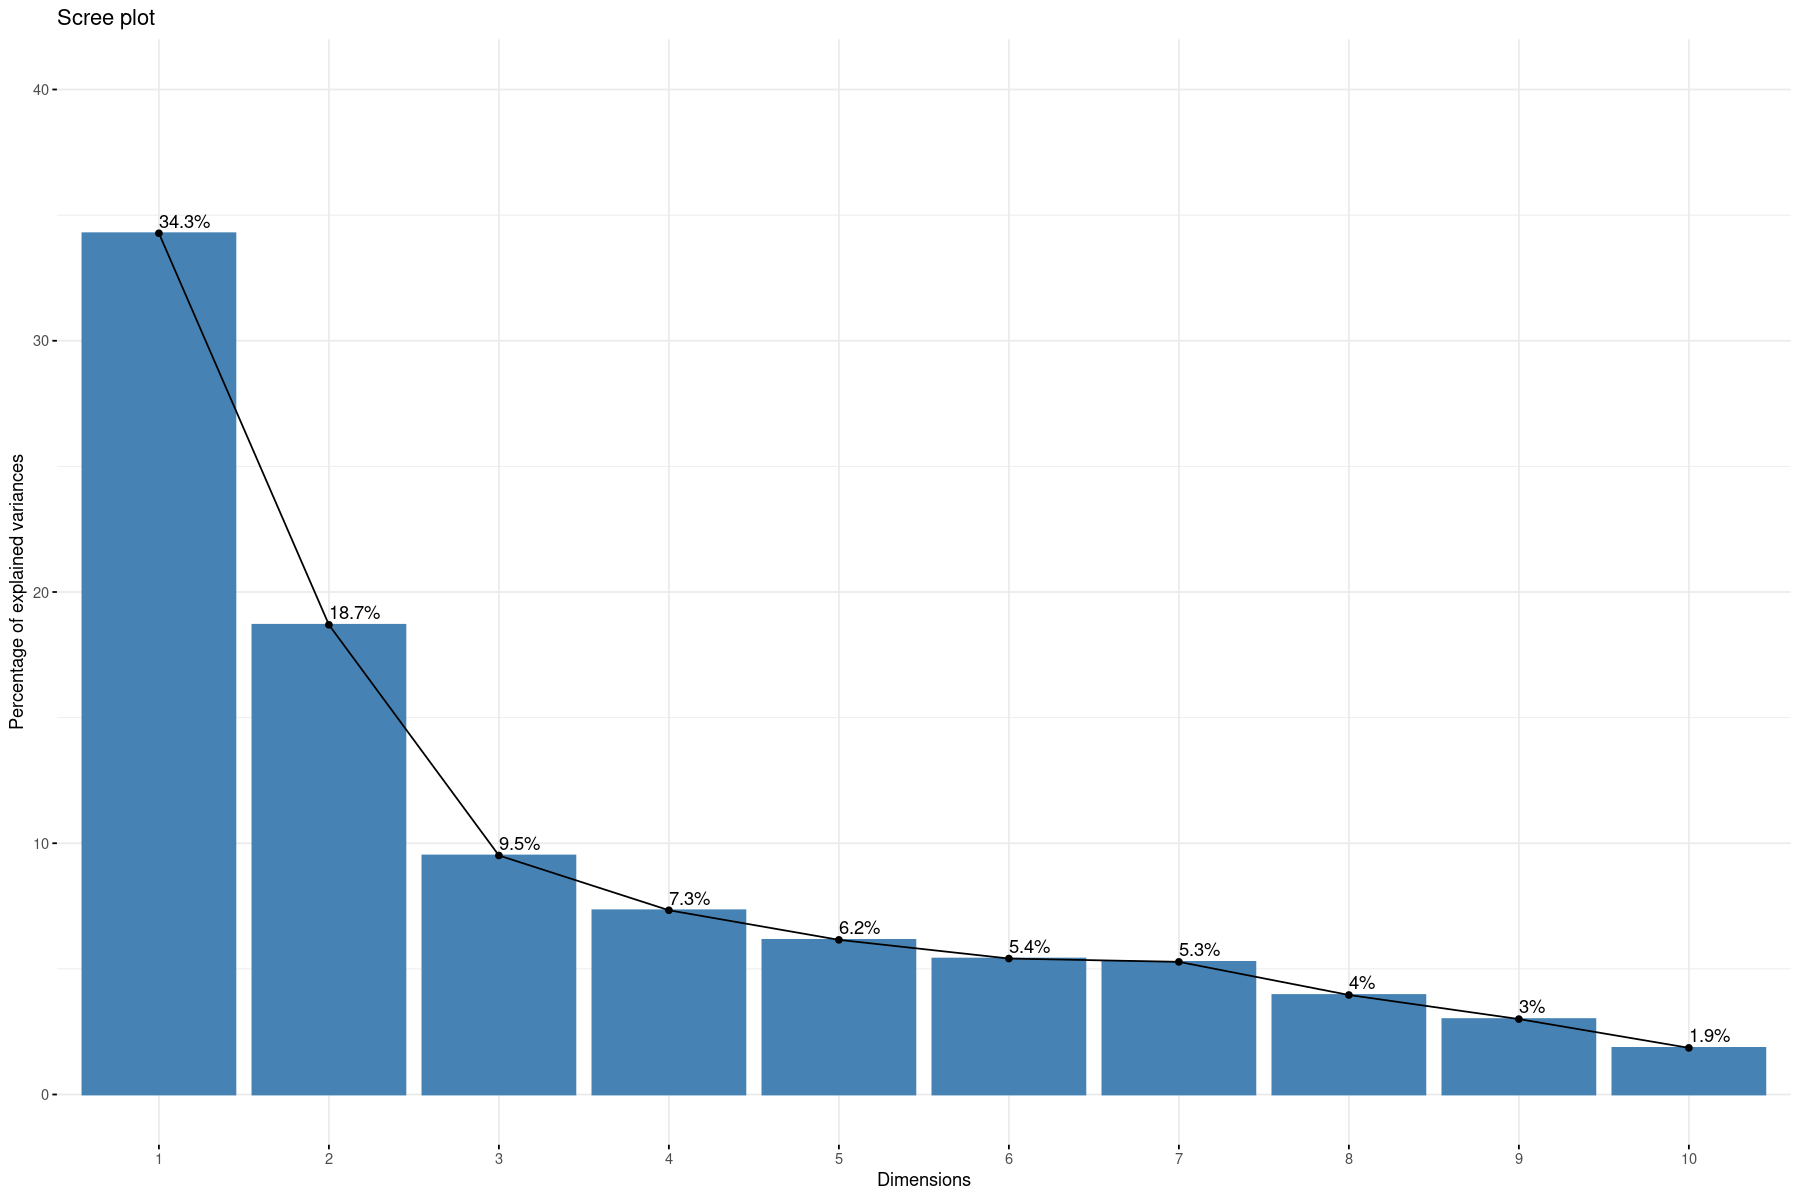

In [203]:
fviz_screeplot(resultat_pca, addlabels=TRUE, ylim=c(0,40))

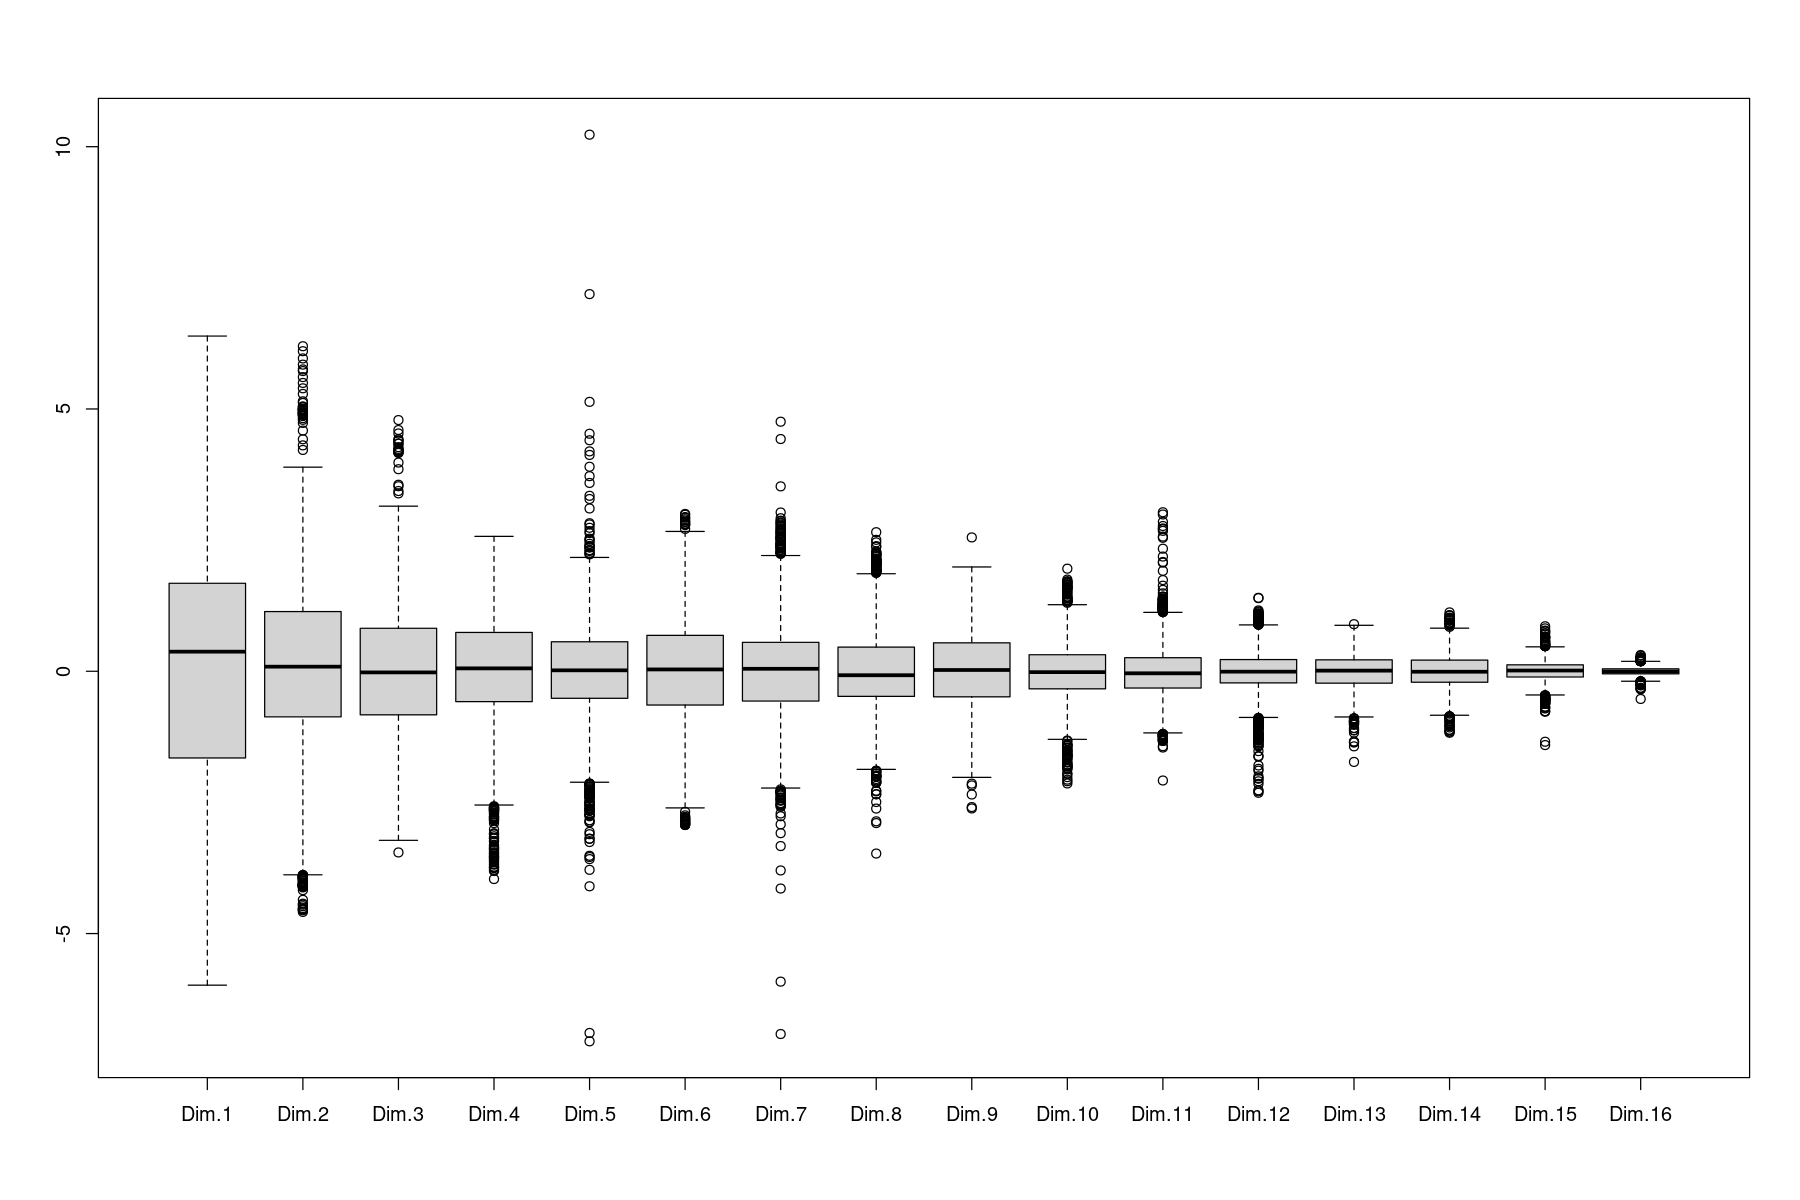

In [204]:
boxplot(resultat_pca$ind$coord)

Nous pouvons en effet voir par cette ACP, que la première composante explique 33.3% des valeurs du energy set.La deuxième composante, elle représente 18.9%. Nous pourrions réduire notre dimension à 2 car avec ces deux-ci, nous expliquons pratiquement la moitié du energy set. Il faudrait ajouter 4 dimensions pour avoir 80% des valeurs expliquées. 

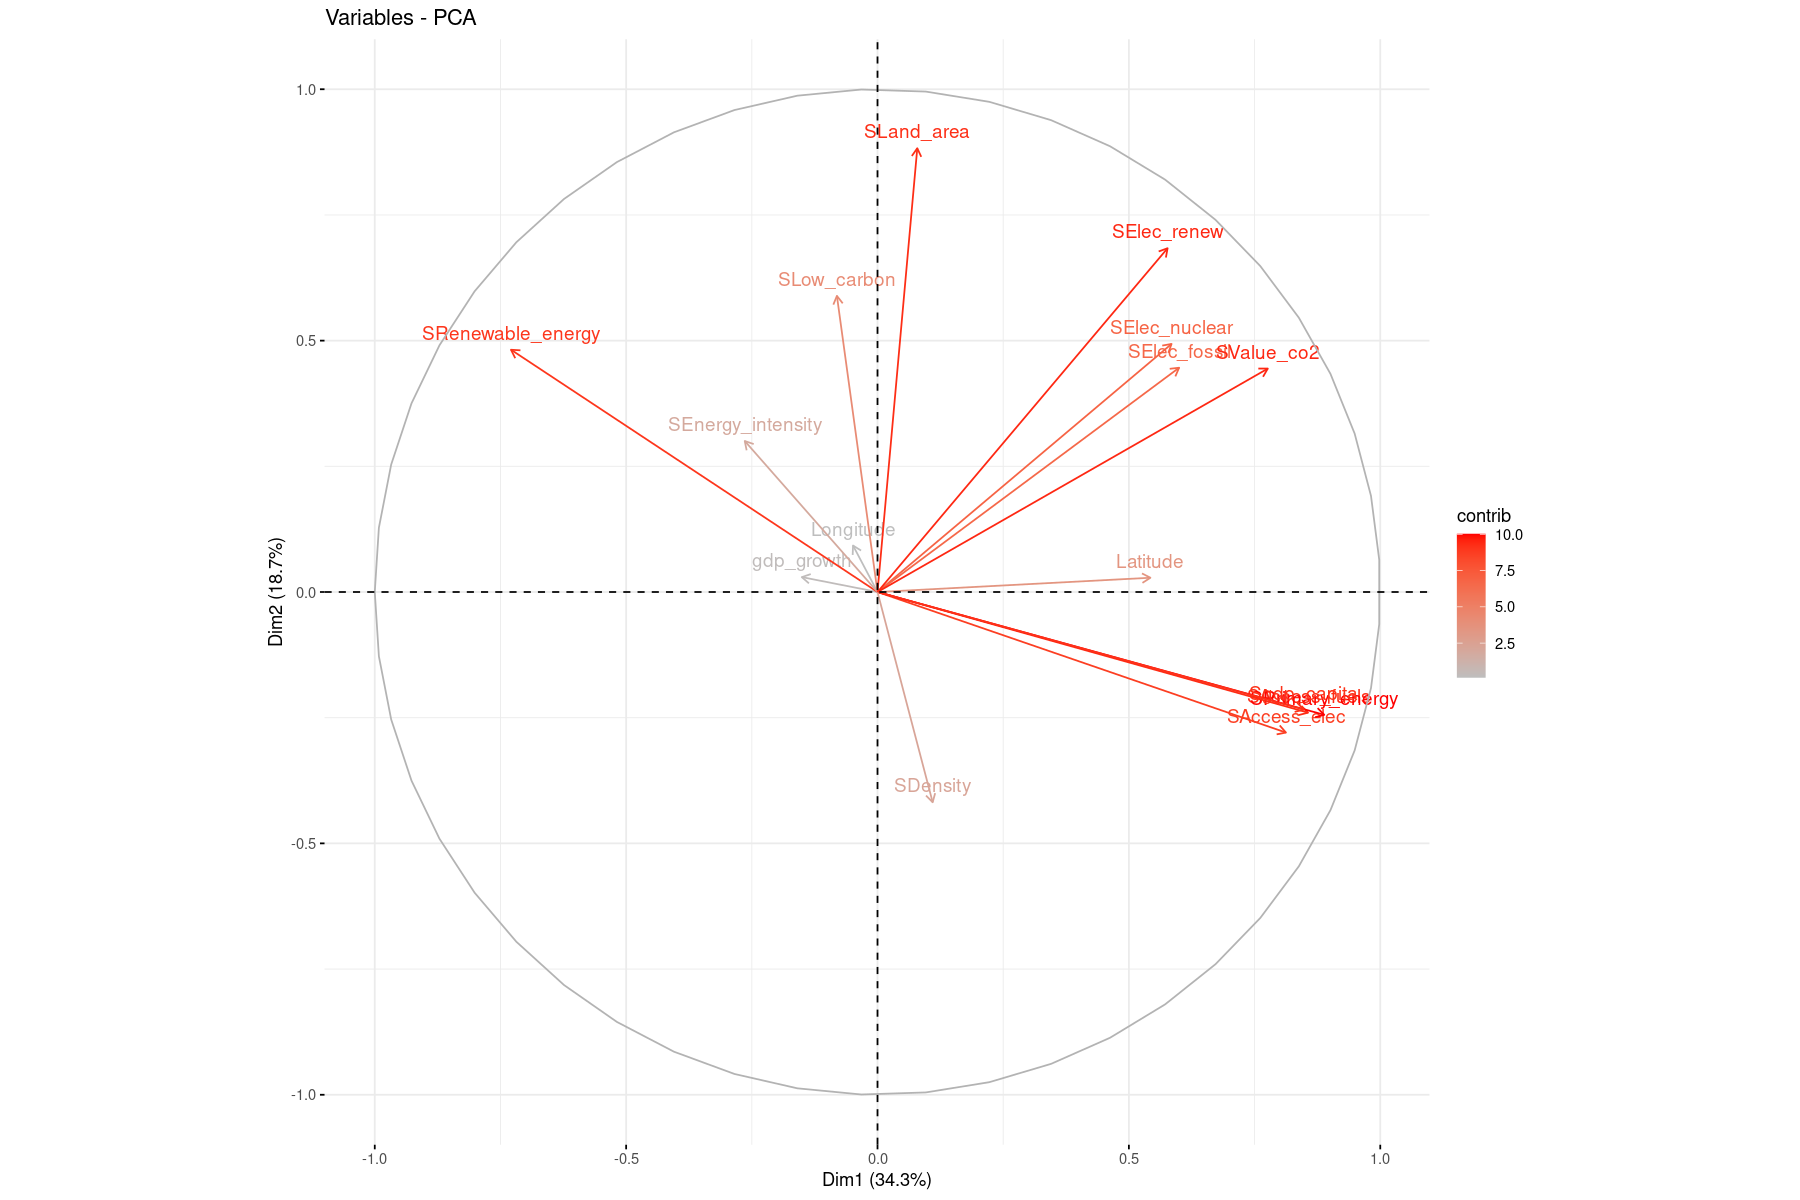

In [205]:
var=get_pca_var(resultat_pca)
fviz_pca_var(resultat_pca,col.var= "contrib",gradient.cols=c("grey", "red"))

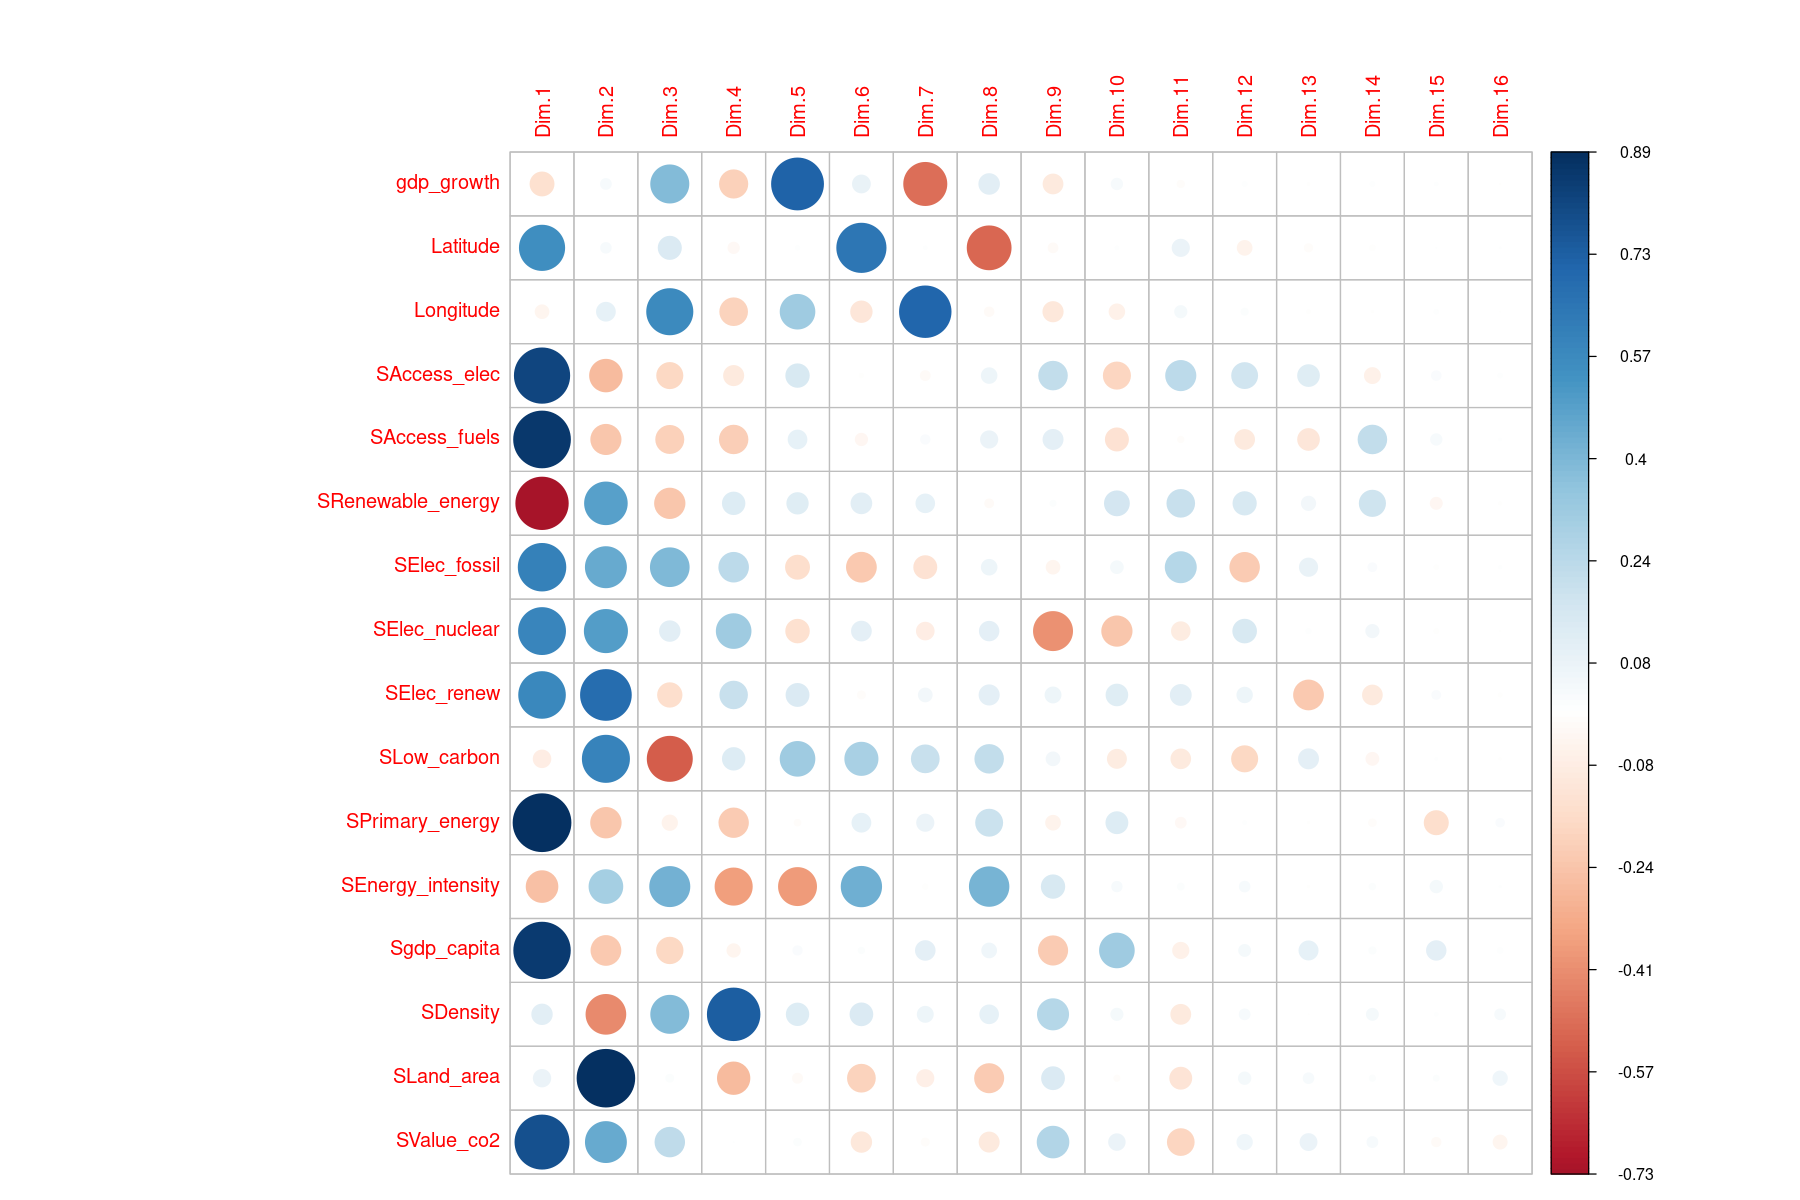

In [206]:
corrplot(resultat_pca$var$cor, is.corr=FALSE)

Dim 1 : Corrélée positivement avec Access_to_Electricity, Access_Clean_Fuel, Primary_energy_consumption, gdp_per_capita / Négativement avec Renewable_share

Dim 2 : Corrélée positivement Land_Area, Electricity_renewables

Dim 4 : Corrélée positivement Density

Dim 5 : Corrélée positivement gdp_growth

Dim 6 Corrélée positivement Latitude

# Modélisation

In [207]:
complete_energy$SElec_fossil = NULL
complete_energy$Value_co2 = NULL

## Question 1

### Diviser échantillon d'apprentissage / de test

Entity         SValue_co2
28  China          15.78308  
143 United States  15.48658  
63  India          14.25228  
69  Japan          13.98342  
51  Germany        13.55689  
25  Canada         13.21272  
142 United Kingdom 13.05053  
86  Mexico         13.00205  
124 South Africa   12.88753  
67  Italy          12.88747

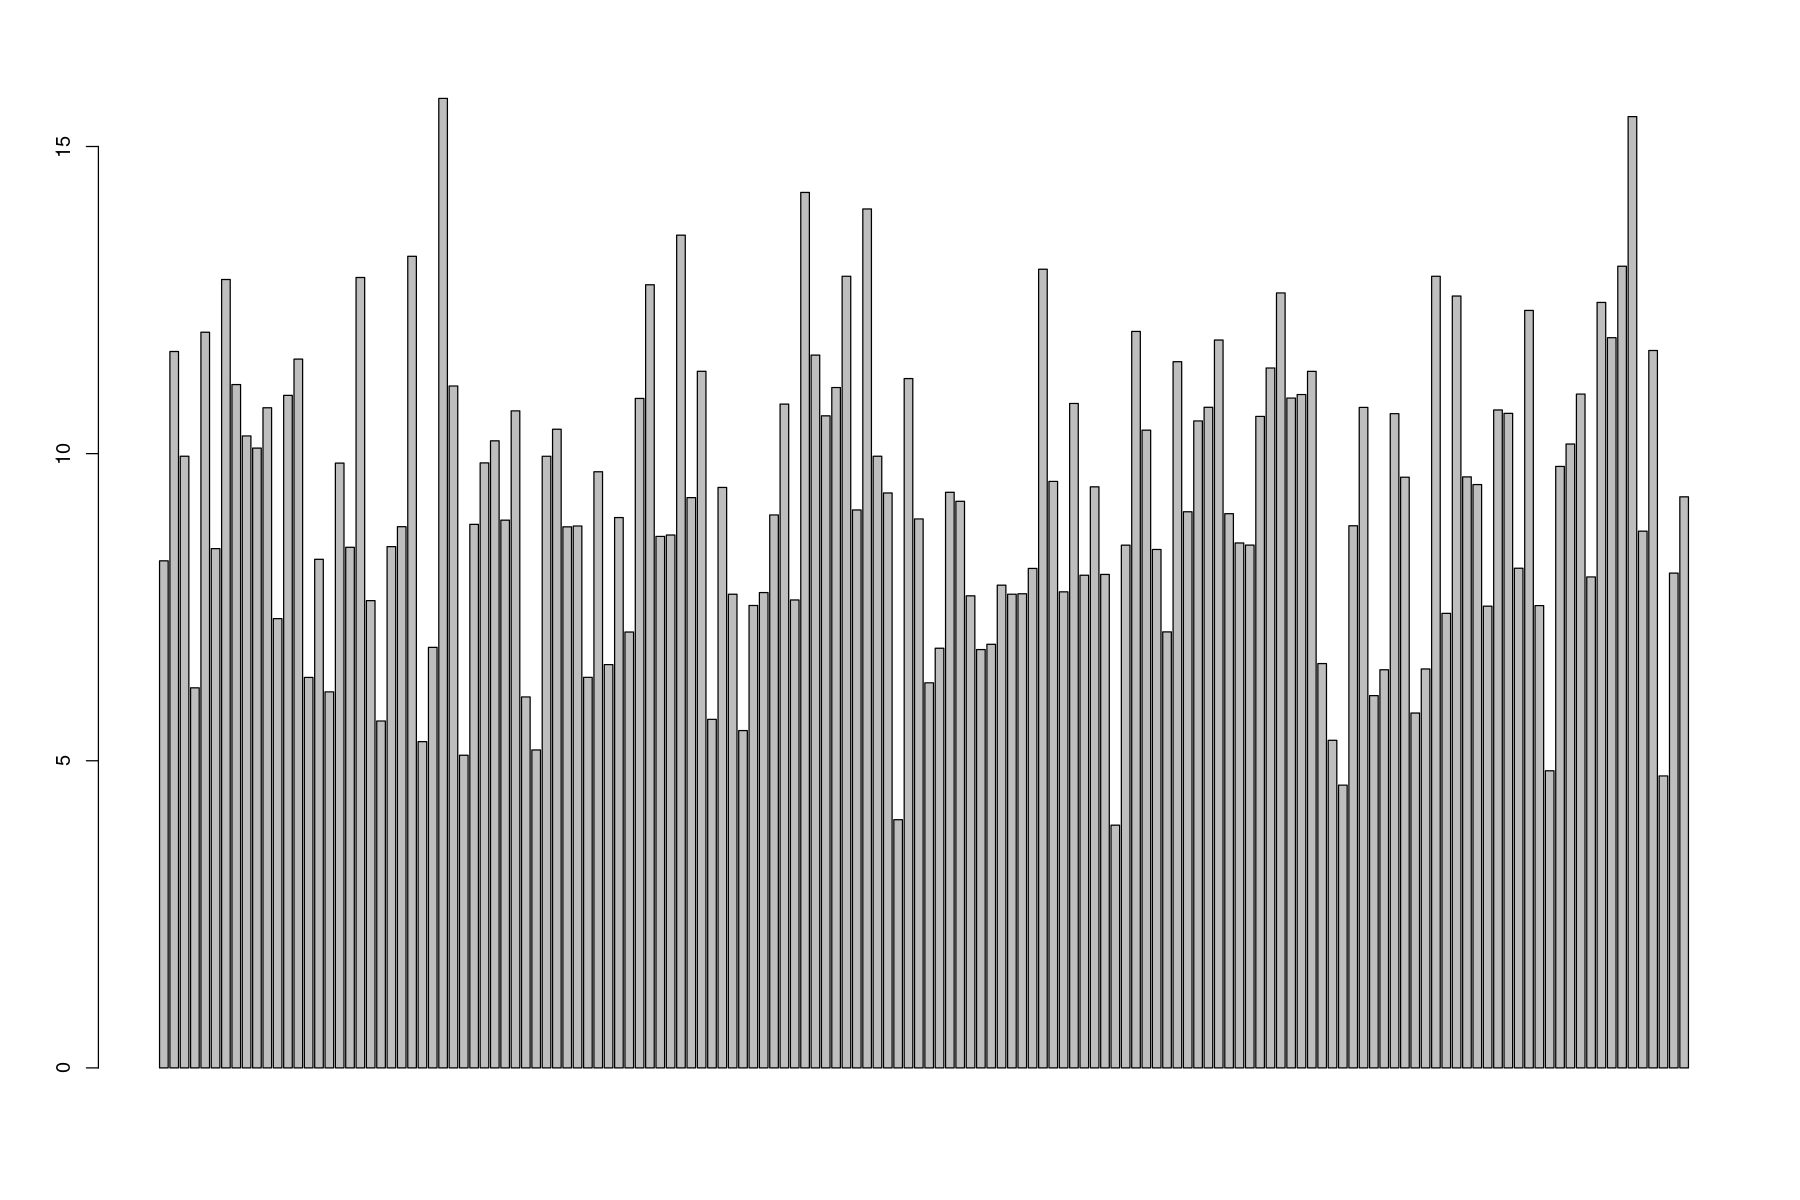

In [208]:
Moy = aggregate(data=complete_energy,SValue_co2~Entity,FUN=mean)
index = order(Moy$SValue_co2, decreasing = TRUE )
Moy_classe = Moy[index,]
head(Moy_classe,10)
barplot(Moy[,2])

In [209]:
data_S = subset(complete_energy, SValue_co2 >13 )
data_S$Entity = as.factor (data_S$Entity)

Afin de réduire notre jeu de données, nous avons réduit l'étude sur des pays qui ont déjà une SValue_co2 supérieure à 13, nous travaillons donc sur les 11 pays les émetteurs, les plus impactants.

In [210]:
str(data_S)

'data.frame':	162 obs. of  17 variables:
 $ Entity           : Factor w/ 11 levels "Brazil","Canada",..: 1 1 1 1 1 1 2 2 2 2 ...
 $ Year             : Factor w/ 21 levels "2000","2001",..: 13 14 15 16 17 18 1 2 3 4 ...
 $ gdp_growth       : num  1.921 3.005 0.504 -3.546 -3.276 ...
 $ Latitude         : num  -14.2 -14.2 -14.2 -14.2 -14.2 ...
 $ Longitude        : num  -51.9 -51.9 -51.9 -51.9 -51.9 ...
 $ SAccess_elec     : num  4.6 4.6 4.6 4.6 4.6 ...
 $ SAccess_fuels    : num  4.56 4.56 4.57 4.57 4.57 ...
 $ SRenewable_energy: num  6.59 6.51 6.46 6.6 6.74 ...
 $ SElec_nuclear    : num  2.78 2.75 2.74 2.7 2.77 ...
 $ SElec_renew      : num  6.12 6.08 6.07 6.06 6.14 ...
 $ SLow_carbon      : num  9.27 8.95 8.75 8.8 9.15 ...
 $ SPrimary_energy  : num  9.74 9.75 9.77 9.75 9.72 ...
 $ SEnergy_intensity: num  1.34 1.36 1.38 1.4 1.39 ...
 $ Sgdp_capita      : num  4.71 4.71 4.7 4.54 4.54 ...
 $ SDensity         : num  3.22 3.22 3.22 3.22 3.22 ...
 $ SLand_area       : num  16 16 16 16 16 ...


In [211]:
data = data_S

In [212]:
str(data)

'data.frame':	162 obs. of  17 variables:
 $ Entity           : Factor w/ 11 levels "Brazil","Canada",..: 1 1 1 1 1 1 2 2 2 2 ...
 $ Year             : Factor w/ 21 levels "2000","2001",..: 13 14 15 16 17 18 1 2 3 4 ...
 $ gdp_growth       : num  1.921 3.005 0.504 -3.546 -3.276 ...
 $ Latitude         : num  -14.2 -14.2 -14.2 -14.2 -14.2 ...
 $ Longitude        : num  -51.9 -51.9 -51.9 -51.9 -51.9 ...
 $ SAccess_elec     : num  4.6 4.6 4.6 4.6 4.6 ...
 $ SAccess_fuels    : num  4.56 4.56 4.57 4.57 4.57 ...
 $ SRenewable_energy: num  6.59 6.51 6.46 6.6 6.74 ...
 $ SElec_nuclear    : num  2.78 2.75 2.74 2.7 2.77 ...
 $ SElec_renew      : num  6.12 6.08 6.07 6.06 6.14 ...
 $ SLow_carbon      : num  9.27 8.95 8.75 8.8 9.15 ...
 $ SPrimary_energy  : num  9.74 9.75 9.77 9.75 9.72 ...
 $ SEnergy_intensity: num  1.34 1.36 1.38 1.4 1.39 ...
 $ Sgdp_capita      : num  4.71 4.71 4.7 4.54 4.54 ...
 $ SDensity         : num  3.22 3.22 3.22 3.22 3.22 ...
 $ SLand_area       : num  16 16 16 16 16 ...


In [213]:
set.seed(183) # initialisation du générateur

# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test
npop <- nrow(data) # nombre de lignes dans les données
nvar <- ncol(data) # nombre de colonnes

# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio) 

# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi) 

# construction de l'échantillon d'apprentissage
datappr <- data[appri,] 
# construction de l'échantillon test
datestr <- data[testi, ] 

# vérification
str(datappr)
str(datestr)
#summary(datappr) 

'data.frame':	129 obs. of  17 variables:
 $ Entity           : Factor w/ 11 levels "Brazil","Canada",..: 1 1 1 1 1 2 2 2 2 2 ...
 $ Year             : Factor w/ 21 levels "2000","2001",..: 14 15 16 17 18 1 2 3 4 5 ...
 $ gdp_growth       : num  3.005 0.504 -3.546 -3.276 1.323 ...
 $ Latitude         : num  -14.2 -14.2 -14.2 -14.2 -14.2 ...
 $ Longitude        : num  -51.9 -51.9 -51.9 -51.9 -51.9 ...
 $ SAccess_elec     : num  4.6 4.6 4.6 4.6 4.6 ...
 $ SAccess_fuels    : num  4.56 4.57 4.57 4.57 4.57 ...
 $ SRenewable_energy: num  6.51 6.46 6.6 6.74 6.73 ...
 $ SElec_nuclear    : num  2.75 2.74 2.7 2.77 2.76 ...
 $ SElec_renew      : num  6.08 6.07 6.06 6.14 6.14 ...
 $ SLow_carbon      : num  8.95 8.75 8.8 9.15 9.08 ...
 $ SPrimary_energy  : num  9.75 9.77 9.75 9.72 9.72 ...
 $ SEnergy_intensity: num  1.36 1.38 1.4 1.39 1.4 ...
 $ Sgdp_capita      : num  4.71 4.7 4.54 4.54 4.6 ...
 $ SDensity         : num  3.22 3.22 3.22 3.22 3.22 ...
 $ SLand_area       : num  16 16 16 16 16 ...
 $ 

Permet de tester notre modèle sur des données encore non traitées Eviter le sur ajustement. 

## Question 2

### Modèle linéaire

#### Sans sélection de variable

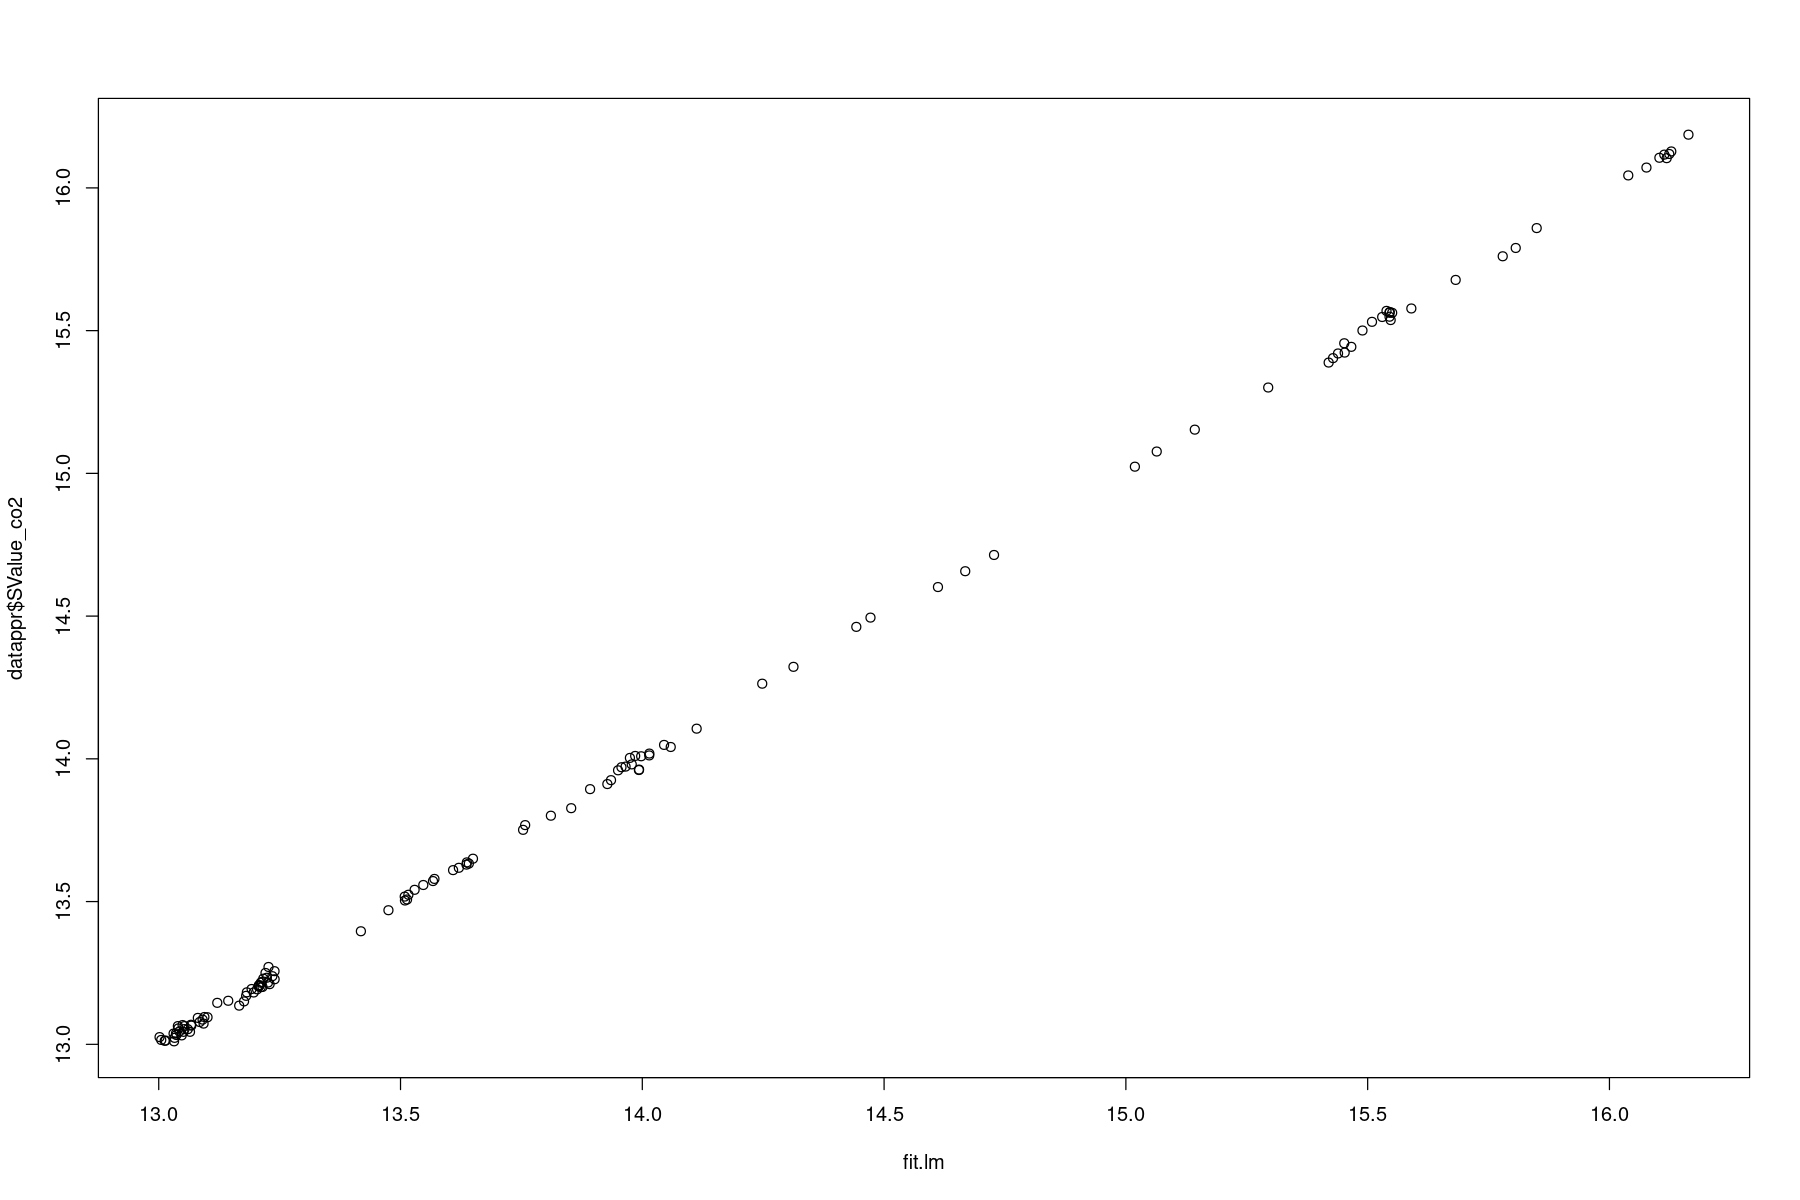

In [214]:
# estimation du modèle sans interaction
reg.lm <-aov(SValue_co2 ~ ., data = datappr)
# Extraction des résidus et des valeurs ajustées de ce modèle
res.lm <- reg.lm$residuals
fit.lm <- reg.lm$fitted.values

plot(fit.lm,datappr$SValue_co2)

##### MSE et R²

In [215]:
MSE = mean((datappr$SValue_co2 - fit.lm)^2)
paste("MSE =", MSE)

# Calculer le coefficient de détermination R² (R2 score)

SS_Residual <- sum((datappr$SValue_co2 - fit.lm)^2)
SS_Total <- sum((datappr$SValue_co2 - mean(datappr$SValue_co2))^2)
R2 <- 1 - (SS_Residual / SS_Total)
paste("R2 =", R2)


[1] "MSE = 0.000214119869775477"

[1] "R2 = 0.999796526081631"

##### Graphe des résidus

In [216]:
gplot.res <- function(x, y, titre = "titre"){
    ggplot(data.frame(x=x, y=y),aes(x,y))+
    geom_point(col = "black")+
    ylab("Résidus")+ xlab("Valeurs prédites")+
    ggtitle(titre)+
    geom_hline(yintercept = 0,col="red")
}

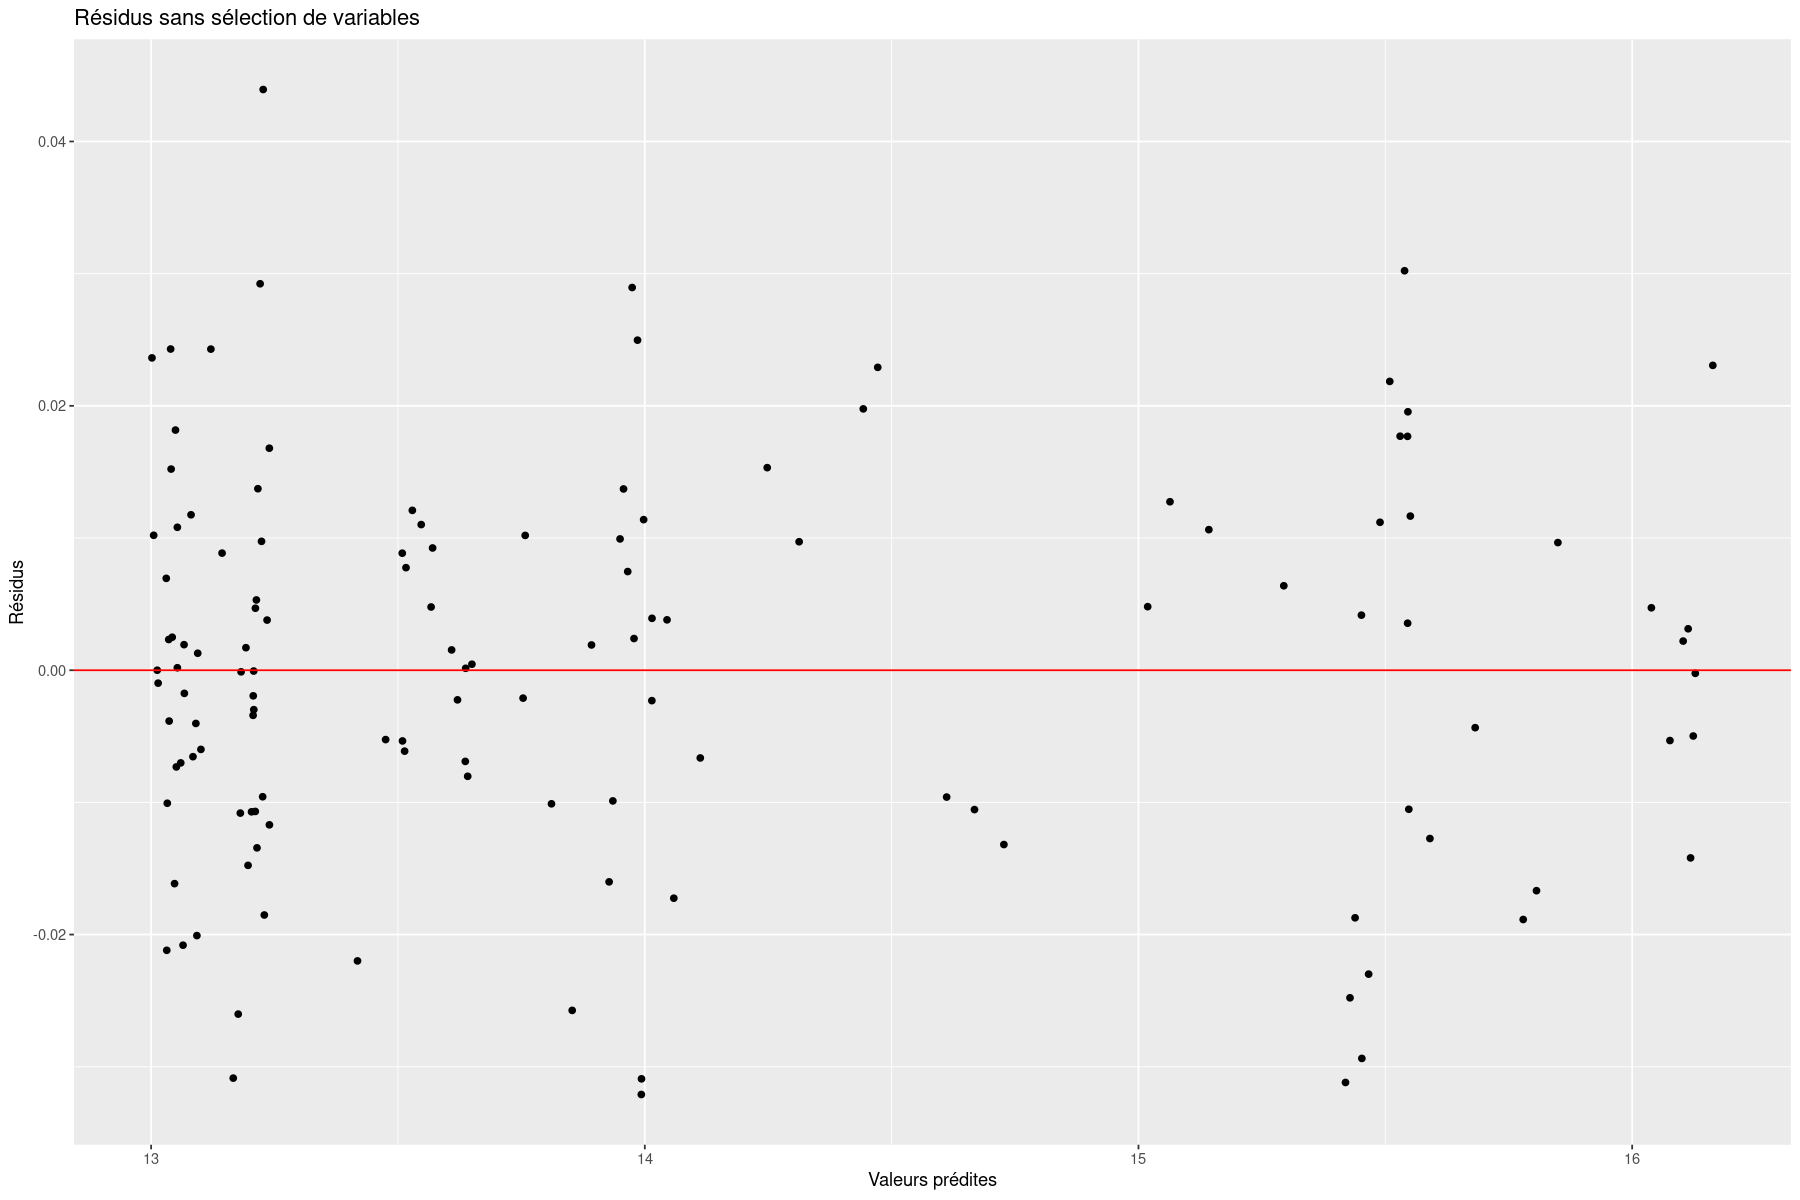

In [217]:
gplot.res(fit.lm,res.lm,"Résidus sans sélection de variables")

In [ ]:
#summary(reg.lm)
#coef(reg.lm)

#### Avec sélection de variable (AIC)

In [218]:
reg.glm <- glm(SValue_co2 ~ .^2, data = datappr)
# Recherche du meilleur modèle au sens 
# du critère d'Akaïke par méthode descendante
reg.glm.step <- step(reg.glm, direction = "backward")

Start:  AIC=-7713.57
SValue_co2 ~ (Entity + Year + gdp_growth + Latitude + Longitude + 
    SAccess_elec + SAccess_fuels + SRenewable_energy + SElec_nuclear + 
    SElec_renew + SLow_carbon + SPrimary_energy + SEnergy_intensity + 
    Sgdp_capita + SDensity + SLand_area)^2


Step:  AIC=-7713.57
SValue_co2 ~ Entity + Year + gdp_growth + Latitude + Longitude + 
    SAccess_elec + SAccess_fuels + SRenewable_energy + SElec_nuclear + 
    SElec_renew + SLow_carbon + SPrimary_energy + SEnergy_intensity + 
    Sgdp_capita + SDensity + SLand_area + Entity:Year + Entity:gdp_growth + 
    Entity:Latitude + Entity:Longitude + Entity:SAccess_elec + 
    Entity:SAccess_fuels + Entity:SRenewable_energy + Entity:SElec_nuclear + 
    Entity:SElec_renew + Entity:SLow_carbon + Entity:SPrimary_energy + 
    Entity:SEnergy_intensity + Entity:Sgdp_capita + Entity:SDensity + 
    Entity:SLand_area + Year:gdp_growth + Year:Latitude + Year:Longitude + 
    Year:SAccess_elec + Year:SAccess_fuels + Year:SRenewa

#### Avec sélection de variable (LASSO)

Warning message in storage.mode(xd) <- "double":
“NAs introduits lors de la conversion automatique”


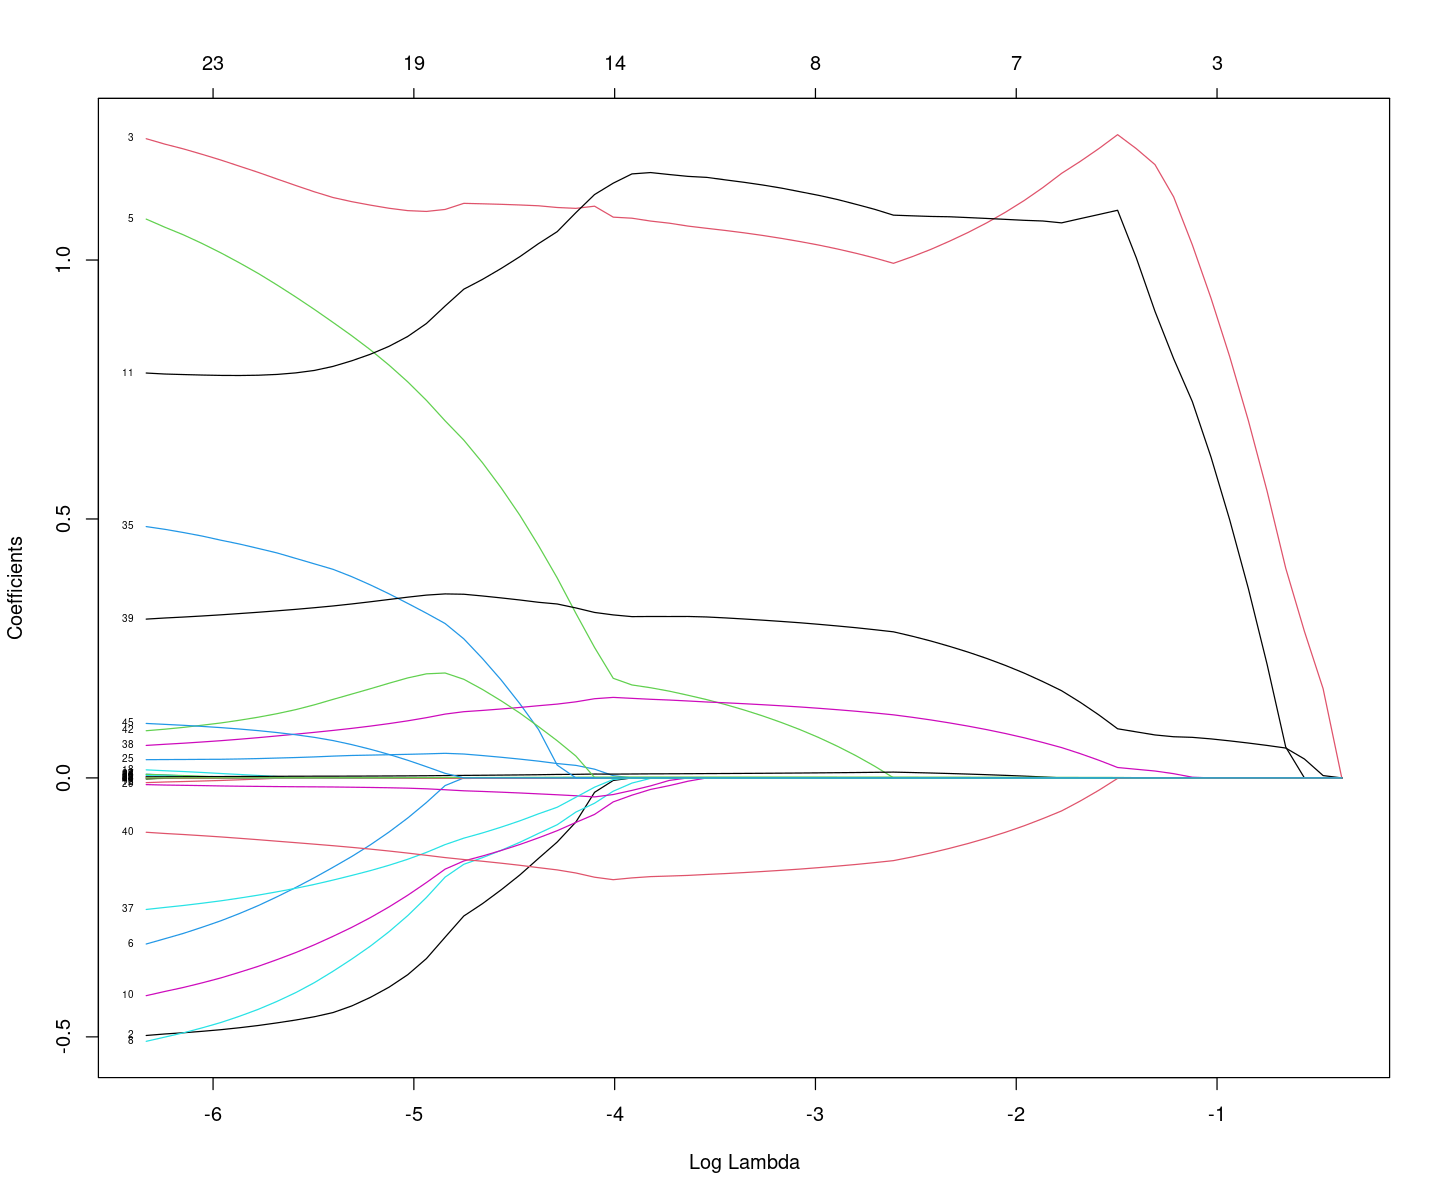

In [220]:
# Dans glmnet, le 17 correspond à l'indice de notre SvalueCo2 qu'il faut mettr en y ( variable à prédire) et pas dans x.
# Il faudra aussi enlever les factors ( entity et year )
reg.lasso.quanti <- glmnet(y = datappr[, 17],
                           x = as.matrix(datappr[, -17]))
# avec toutes les variables, créer d'abord la matrice d'expériences 
# avec 'model.matrix' (penser à retirer l'intercept du modèle)
x.mat <- model.matrix(SValue_co2 ~ . - 1, data = datappr)
reg.lasso <- glmnet(y = datappr$SValue_co2, x = x.mat)
options(repr.plot.width = 12, repr.plot.height = 10)
plot(reg.lasso, xvar = "lambda", label = TRUE)
#legend("topright", legend = paste(1:ncol(x.mat), " - ", colnames(x.mat)))

##### Choix optimal de l'hyperparamètre

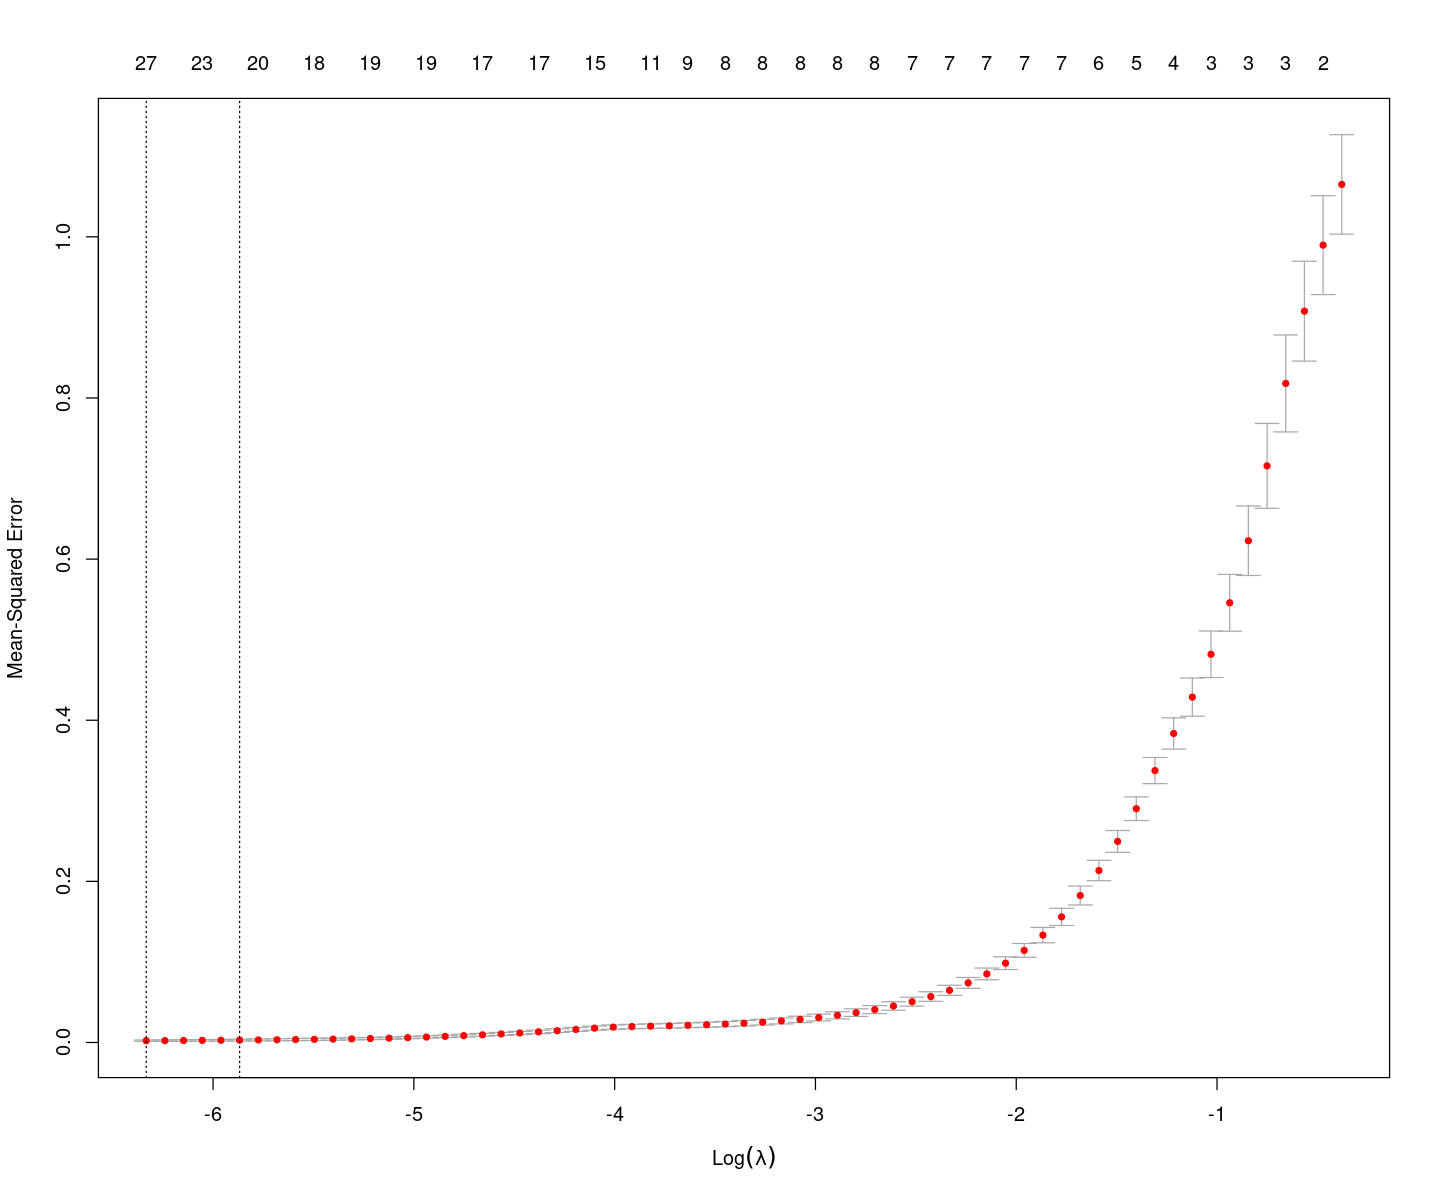

In [221]:
reg.lasso.cv <- cv.glmnet(y = datappr[, 17], x = x.mat)
plot(reg.lasso.cv)

On a le choix entre lambda min et lambda 1se. Au vue du nombre de variable conséquente que nous avons, il est pertinent d'en supprimer un max donc on prend 1se

In [222]:
paste("CV estimate of lambda :", round(reg.lasso.cv$lambda.1se, 3))
# modèle correspondant
coef(reg.lasso.cv, s = "lambda.1se")

[1] "CV estimate of lambda : 0.003"

46 x 1 sparse Matrix of class "dgCMatrix"
                                s1
(Intercept)           9.7753368438
EntityBrazil          .           
EntityCanada         -0.4823567887
EntityChina           1.1810852207
EntityGermany         .           
EntityIndia           0.9943581538
EntityItaly          -0.2617061330
EntityJapan           .           
EntityMexico         -0.4601052030
EntitySouth Africa    .           
EntityUnited Kingdom -0.3751967461
EntityUnited States   0.7770222841
Year2001             -0.0036246098
Year2002              .           
Year2003              .           
Year2004              .           
Year2005              .           
Year2006              .           
Year2007              0.0066212824
Year2008              .           
Year2009              .           
Year2010              .           
Year2011              .           
Year2012              .           
Year2013              0.0007865005
Year2014              0.0365894535
Year2015     

In [223]:
Coef = as.data.frame(as.matrix(coef(reg.lasso.cv, s = "lambda.1se")))
Coef

s1           
(Intercept)           9.7753368438
EntityBrazil          0.0000000000
EntityCanada         -0.4823567887
EntityChina           1.1810852207
EntityGermany         0.0000000000
EntityIndia           0.9943581538
EntityItaly          -0.2617061330
EntityJapan           0.0000000000
EntityMexico         -0.4601052030
EntitySouth Africa    0.0000000000
EntityUnited Kingdom -0.3751967461
EntityUnited States   0.7770222841
Year2001             -0.0036246098
Year2002              0.0000000000
Year2003              0.0000000000
Year2004              0.0000000000
Year2005              0.0000000000
Year2006              0.0000000000
Year2007              0.0066212824
Year2008              0.0000000000
Year2009              0.0000000000
Year2010              0.0000000000
Year2011              0.0000000000
Year2012              0.0000000000
Year2013              0.0007865005
Year2014              0.0365894535
Year2015              0.0000000000
Year2016              0.0000000000
Year2017              0.0000000000
Year2018             -0.0160206286
Year2019              0.0000000000
Year2020              0.0000000000
gdp_growth            0.0027961136
Latitude              0.0000000000
Longitude             0.0002124001
SAccess_elec          0.4515404677
SAccess_fuels         0.0000000000
SRenewable_energy    -0.2319906380
SElec_nuclear         0.0747319173
SElec_renew           0.3173715520
SLow_carbon          -0.1166106934
SPrimary_energy       0.0000000000
SEnergy_intensity     0.1114154351
Sgdp_capita           0.0000000000
SDensity              0.0000000000
SLand_area            0.0943782132

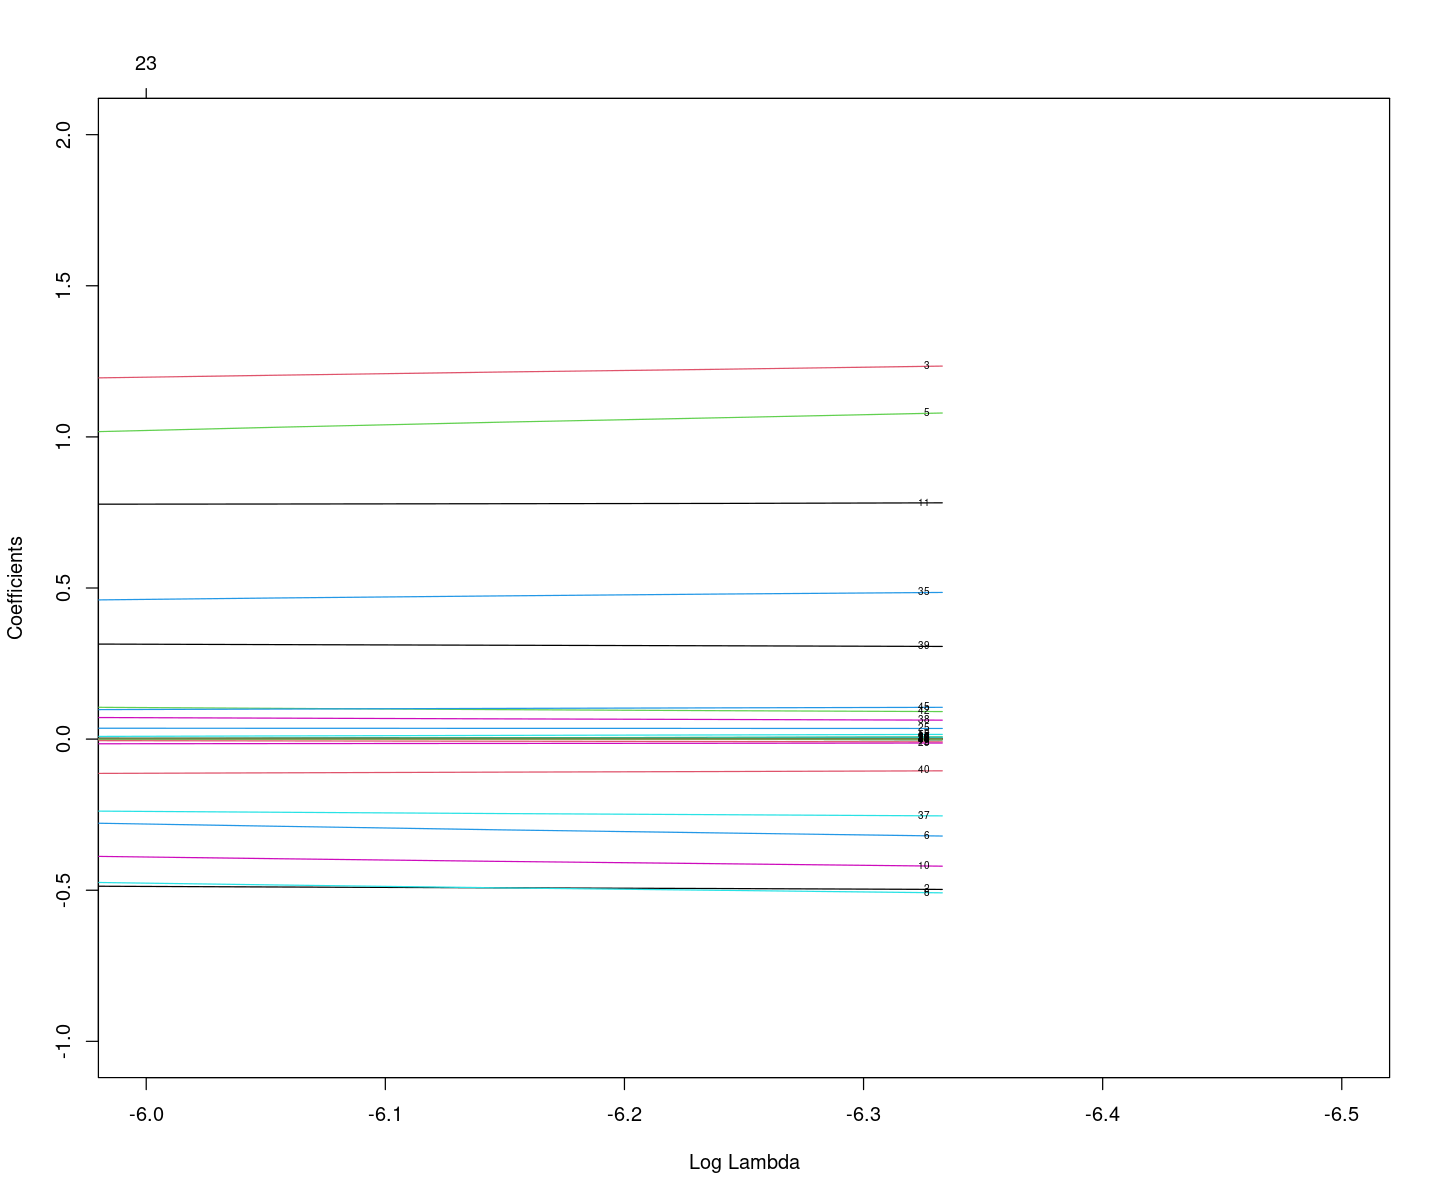

In [224]:
plot(reg.lasso, xvar = "lambda", label = TRUE,xlim=c(-6,-6.5),ylim=c(-1,2))
abline(v=log(reg.lasso.cv$lambda.1se),col="red")

In [225]:
fit.lasso.1se <- predict(reg.lasso.cv, s = "lambda.1se", newx = x.mat)
res.lasso.1se <- datappr$SValue_co2 - fit.lasso.1se 

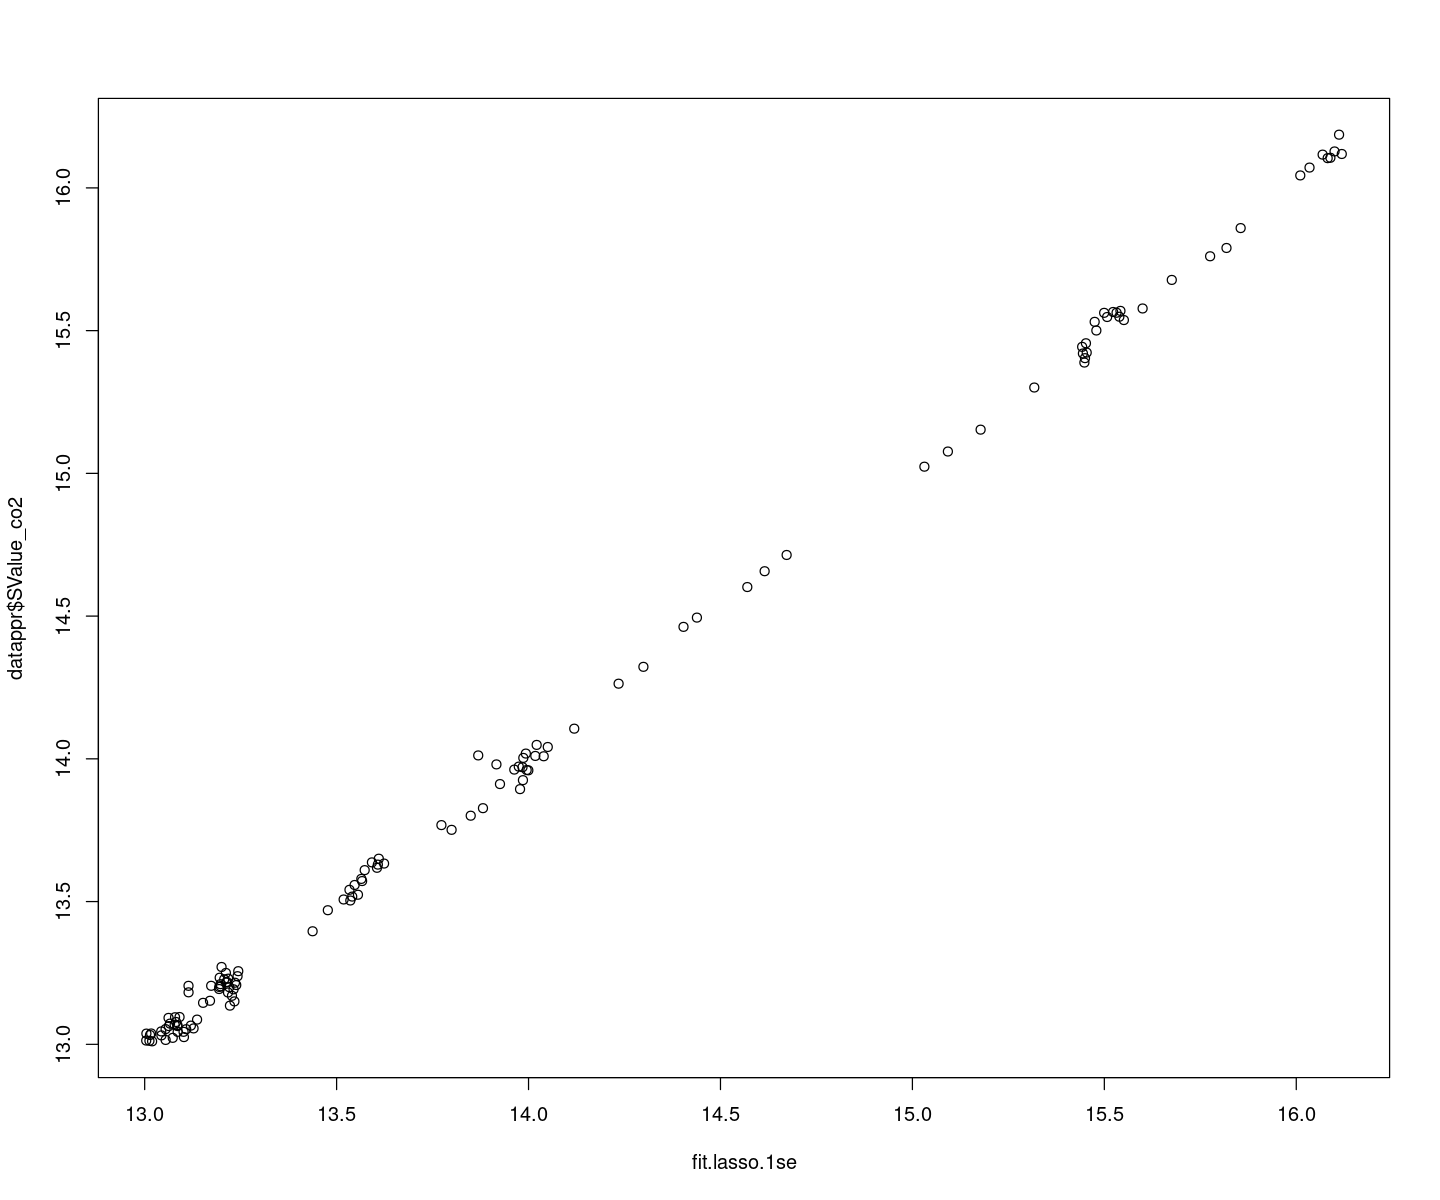

In [226]:
plot(fit.lasso.1se,datappr$SValue_co2)

##### Graphe des résidus

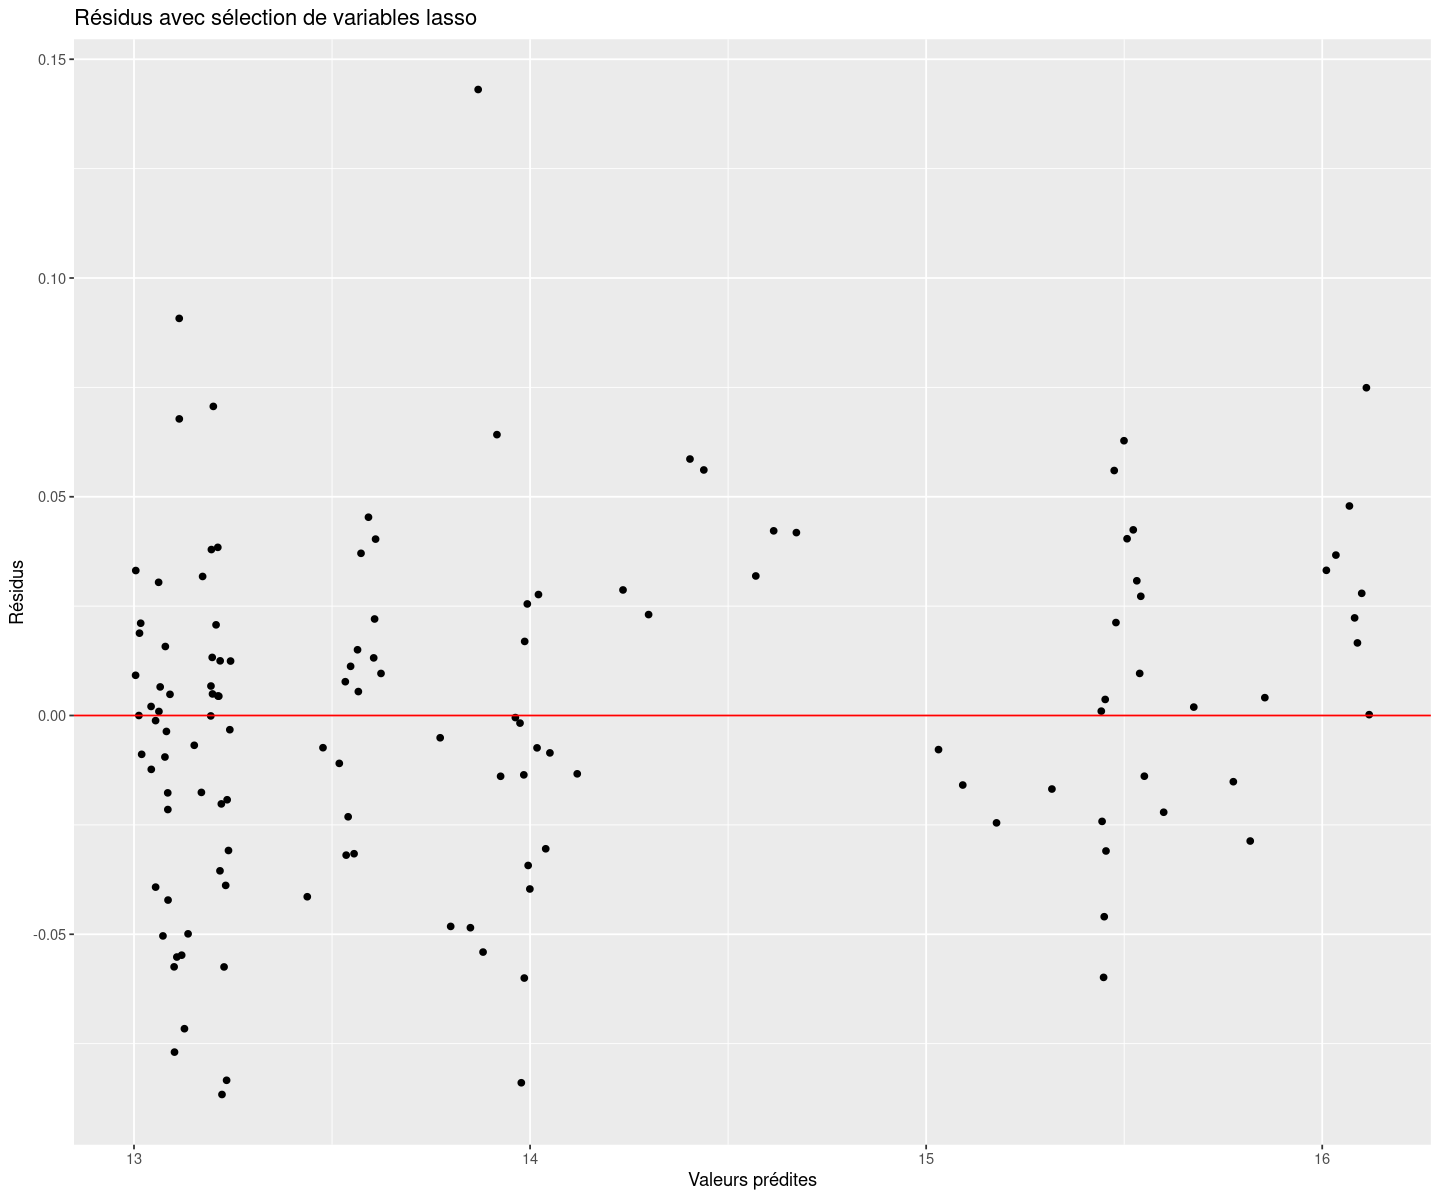

In [227]:
gplot.res(fit.lasso.1se,res.lasso.1se,"Résidus avec sélection de variables lasso")

##### MSE et R²

In [228]:
MSE = mean((datappr$SValue_co2 - fit.lasso.1se)^2)
paste("MSE =", MSE)

# Calculer le coefficient de détermination R² (R2 score)

SS_Residual <- sum((datappr$SValue_co2 - fit.lasso.1se)^2)
SS_Total <- sum((datappr$SValue_co2 - mean(datappr$SValue_co2))^2)
R2 <- 1 - (SS_Residual / SS_Total)
paste("R2 =", R2)

[1] "MSE = 0.00143754206304419"

[1] "R2 = 0.998633931934037"

### SVM

On enlève l'année 2020 parce qu'il n'y a jamais aucune donnée dedans

In [229]:
svm.reg0 = svm(SValue_co2 ~ ., data = datappr)
summary(svm.reg0)


Call:
svm(formula = SValue_co2 ~ ., data = datappr)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.02222222 
    epsilon:  0.1 


Number of Support Vectors:  44






#### Choix du meilleur noyau SVM

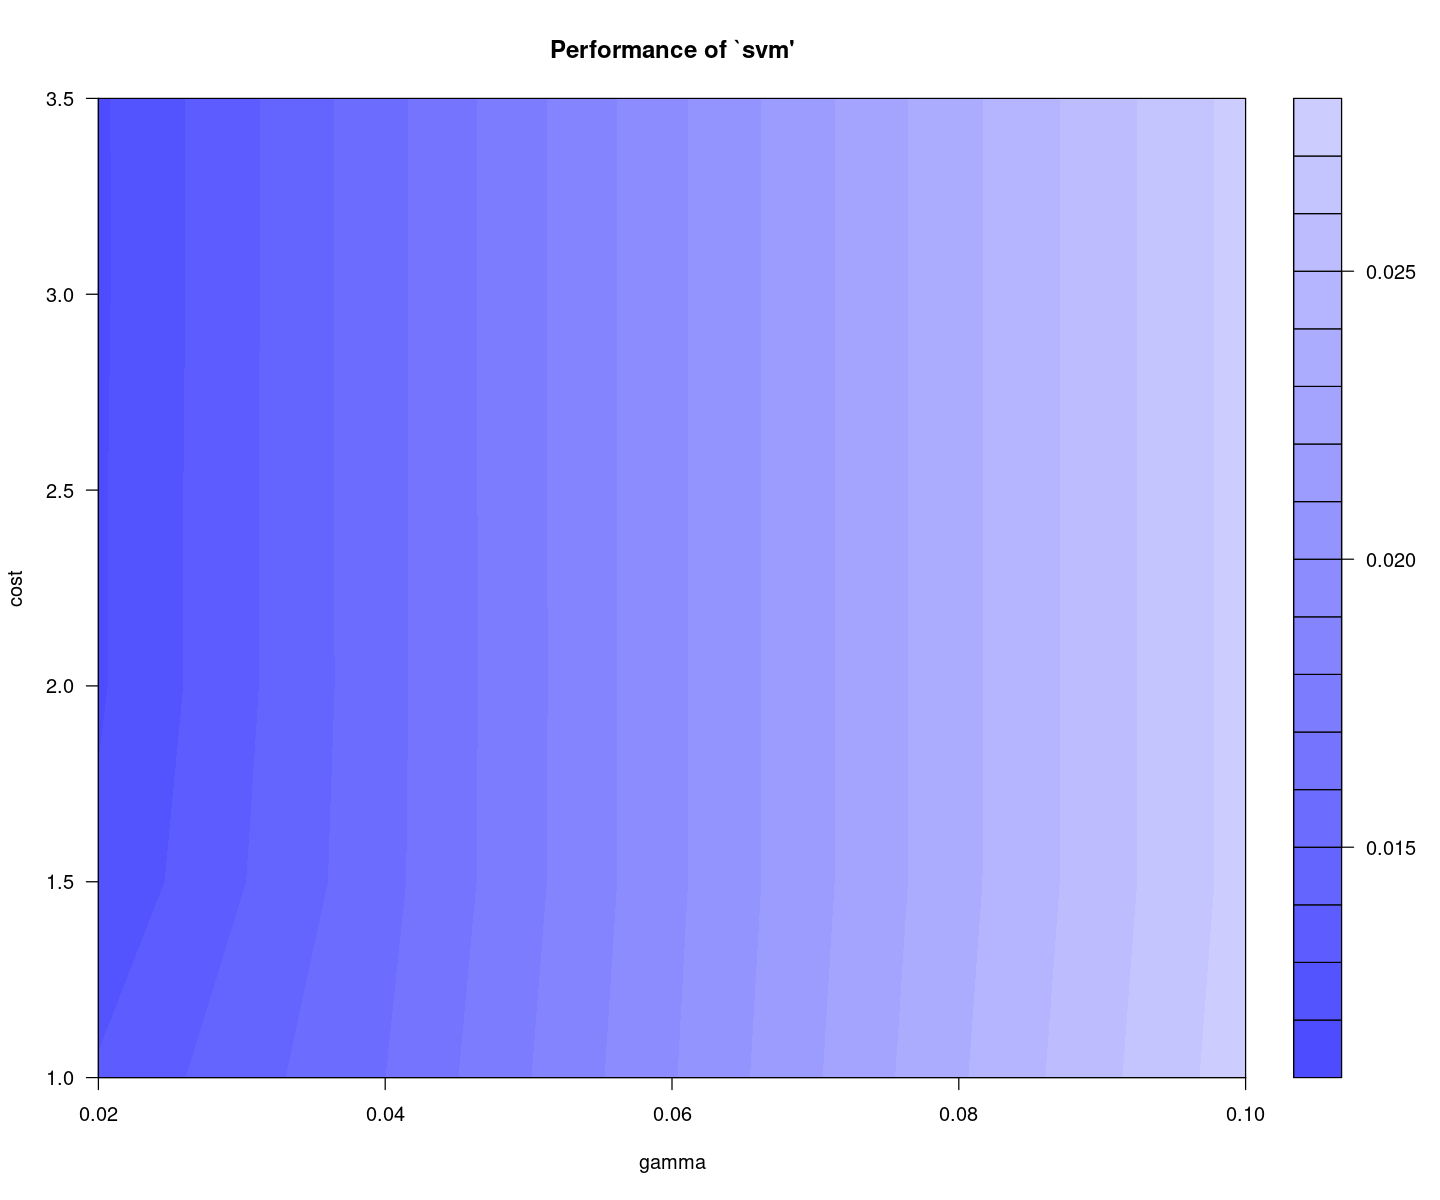

In [230]:
svm.reg.tune = tune.svm(SValue_co2 ~ ., data = datappr, cost = c(1, 1.5, 2, 2.5, 3, 3.5), 
    gamma = seq(0.02, 0.1, by = 0.02))
plot(svm.reg.tune)

In [231]:
#set.seed(2021)
svm.reg = svm(SValue_co2~ ., data = datappr, cost = svm.reg.tune$best.parameters$cost, 
    gamma = svm.reg.tune$best.parameters$gamma, epsilon = 0.01)
summary(svm.reg)


Call:
svm(formula = SValue_co2 ~ ., data = datappr, cost = svm.reg.tune$best.parameters$cost, 
    gamma = svm.reg.tune$best.parameters$gamma, epsilon = 0.01)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  3 
      gamma:  0.02 
    epsilon:  0.01 


Number of Support Vectors:  96






#### Résidus

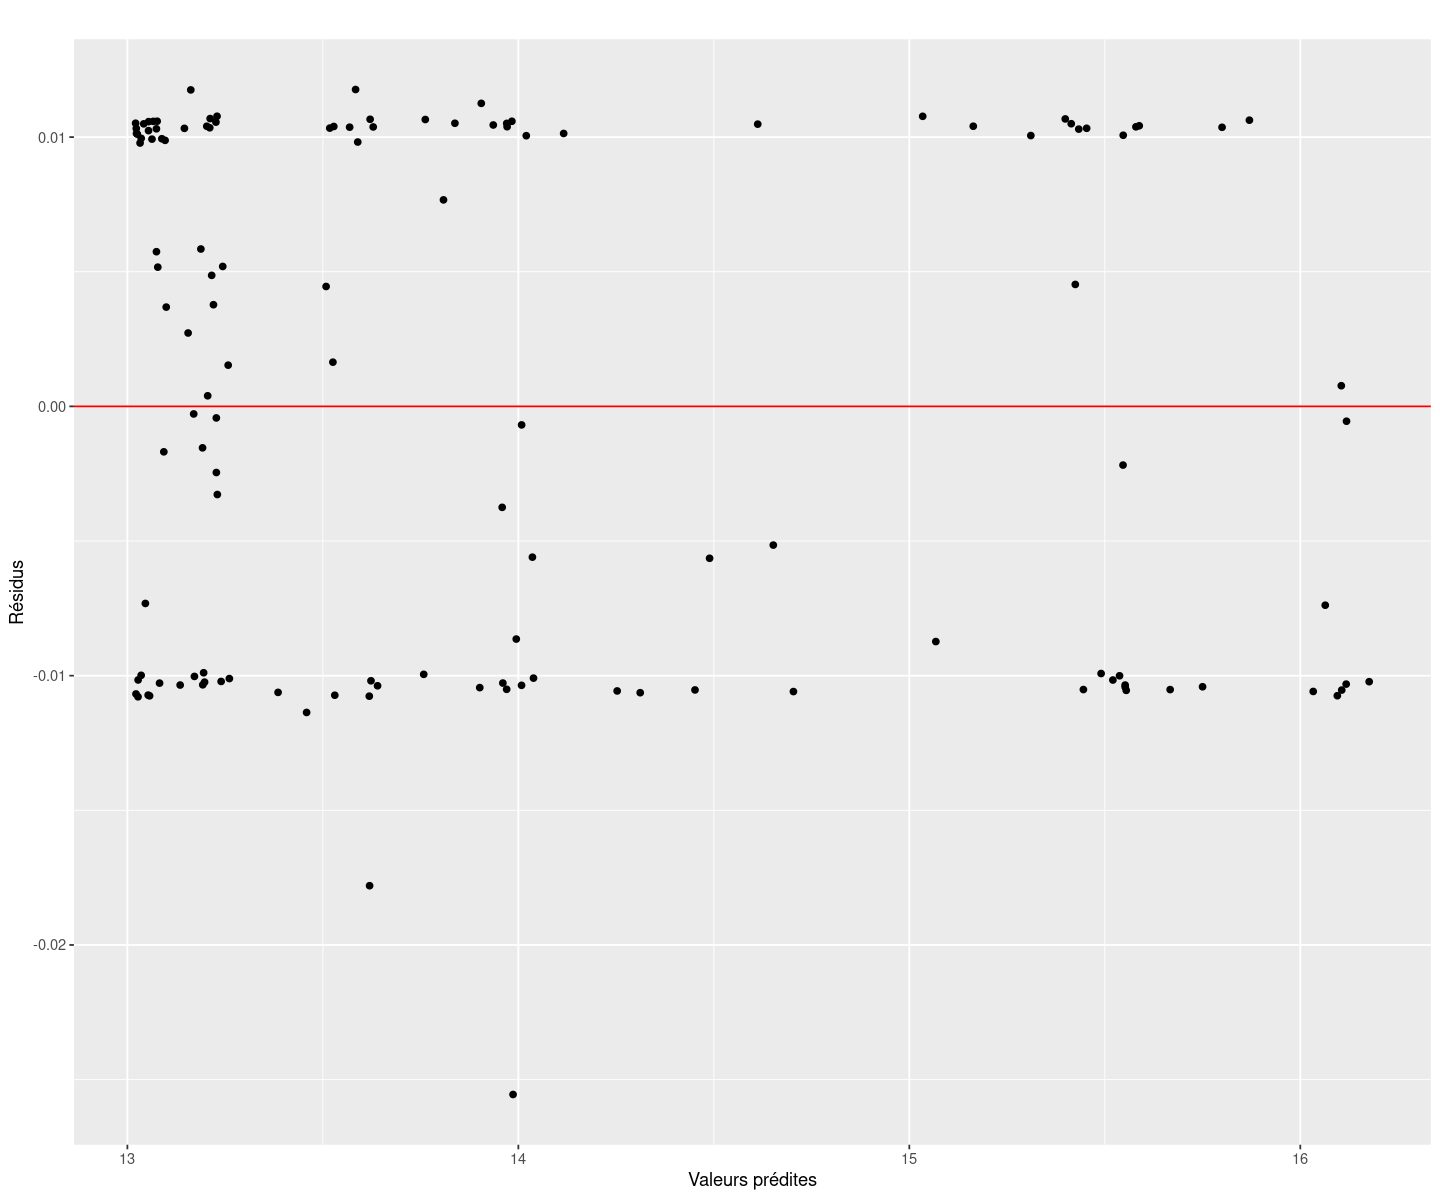

In [232]:
fit.svmr=svm.reg$fitted
res.svmr=fit.svmr-datappr[,"SValue_co2"]
gplot.res(fit.svmr,res.svmr,titre="")

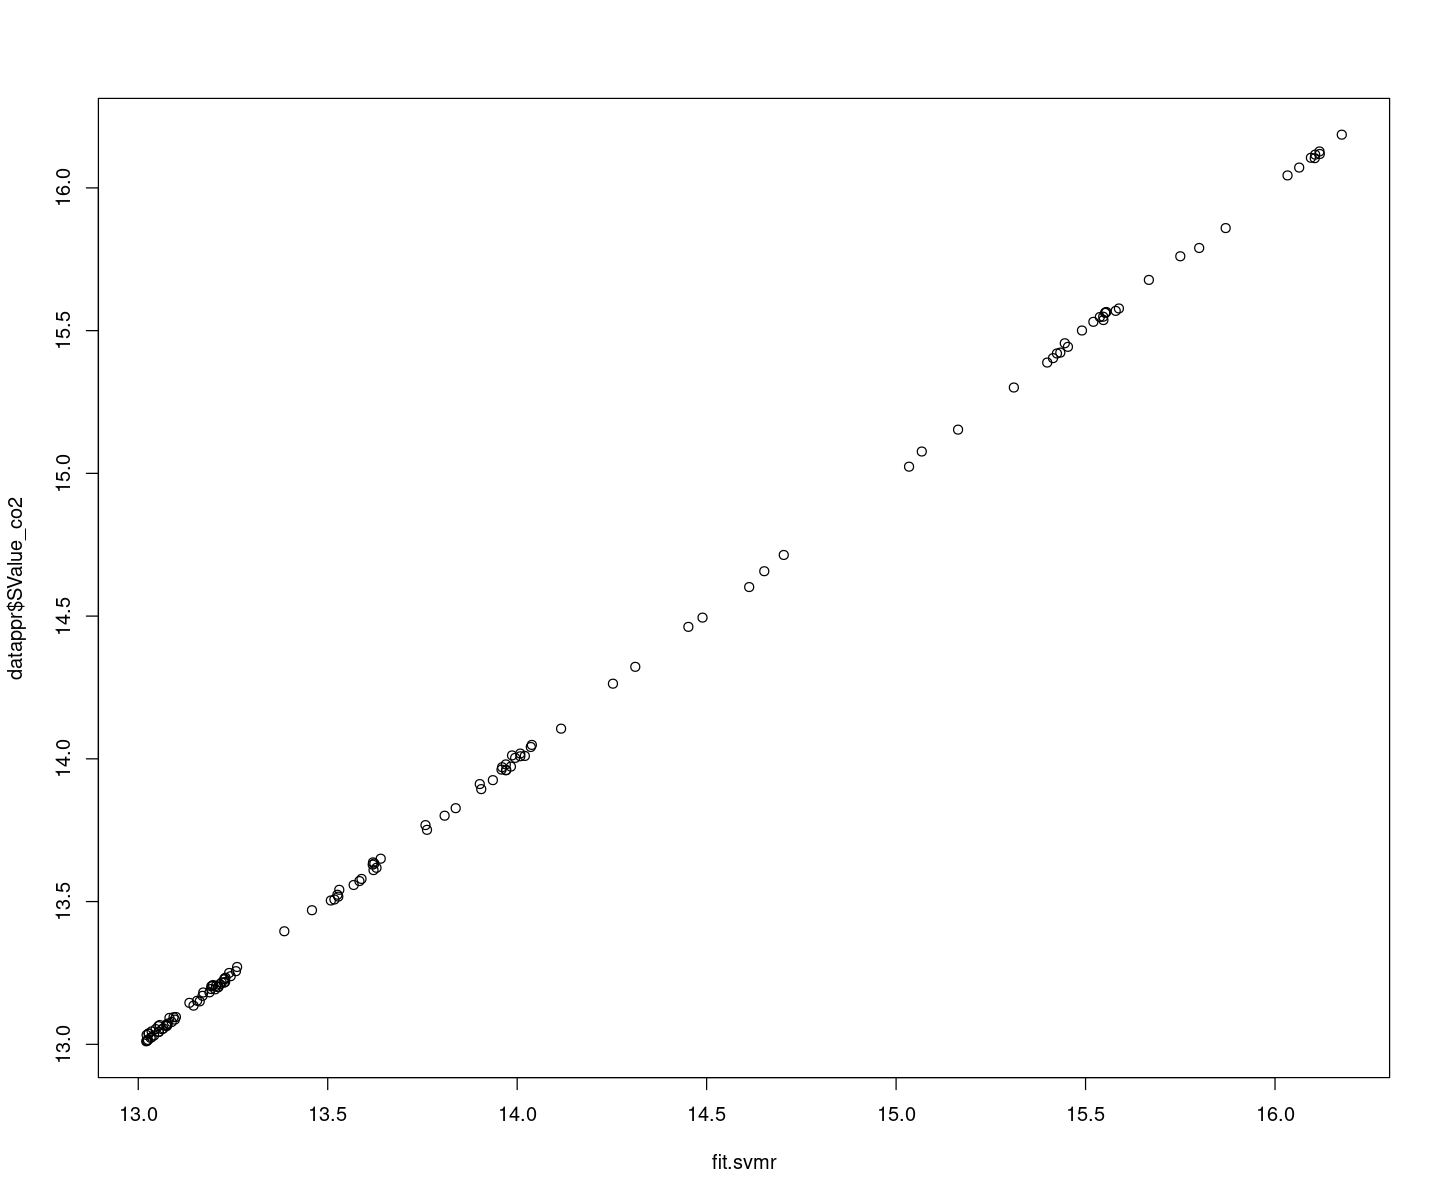

In [234]:
plot(fit.svmr,datappr$SValue_co2)

### Arbre

In [235]:
tree.reg=rpart(SValue_co2~.,data=datappr,control=rpart.control(cp=0.001))

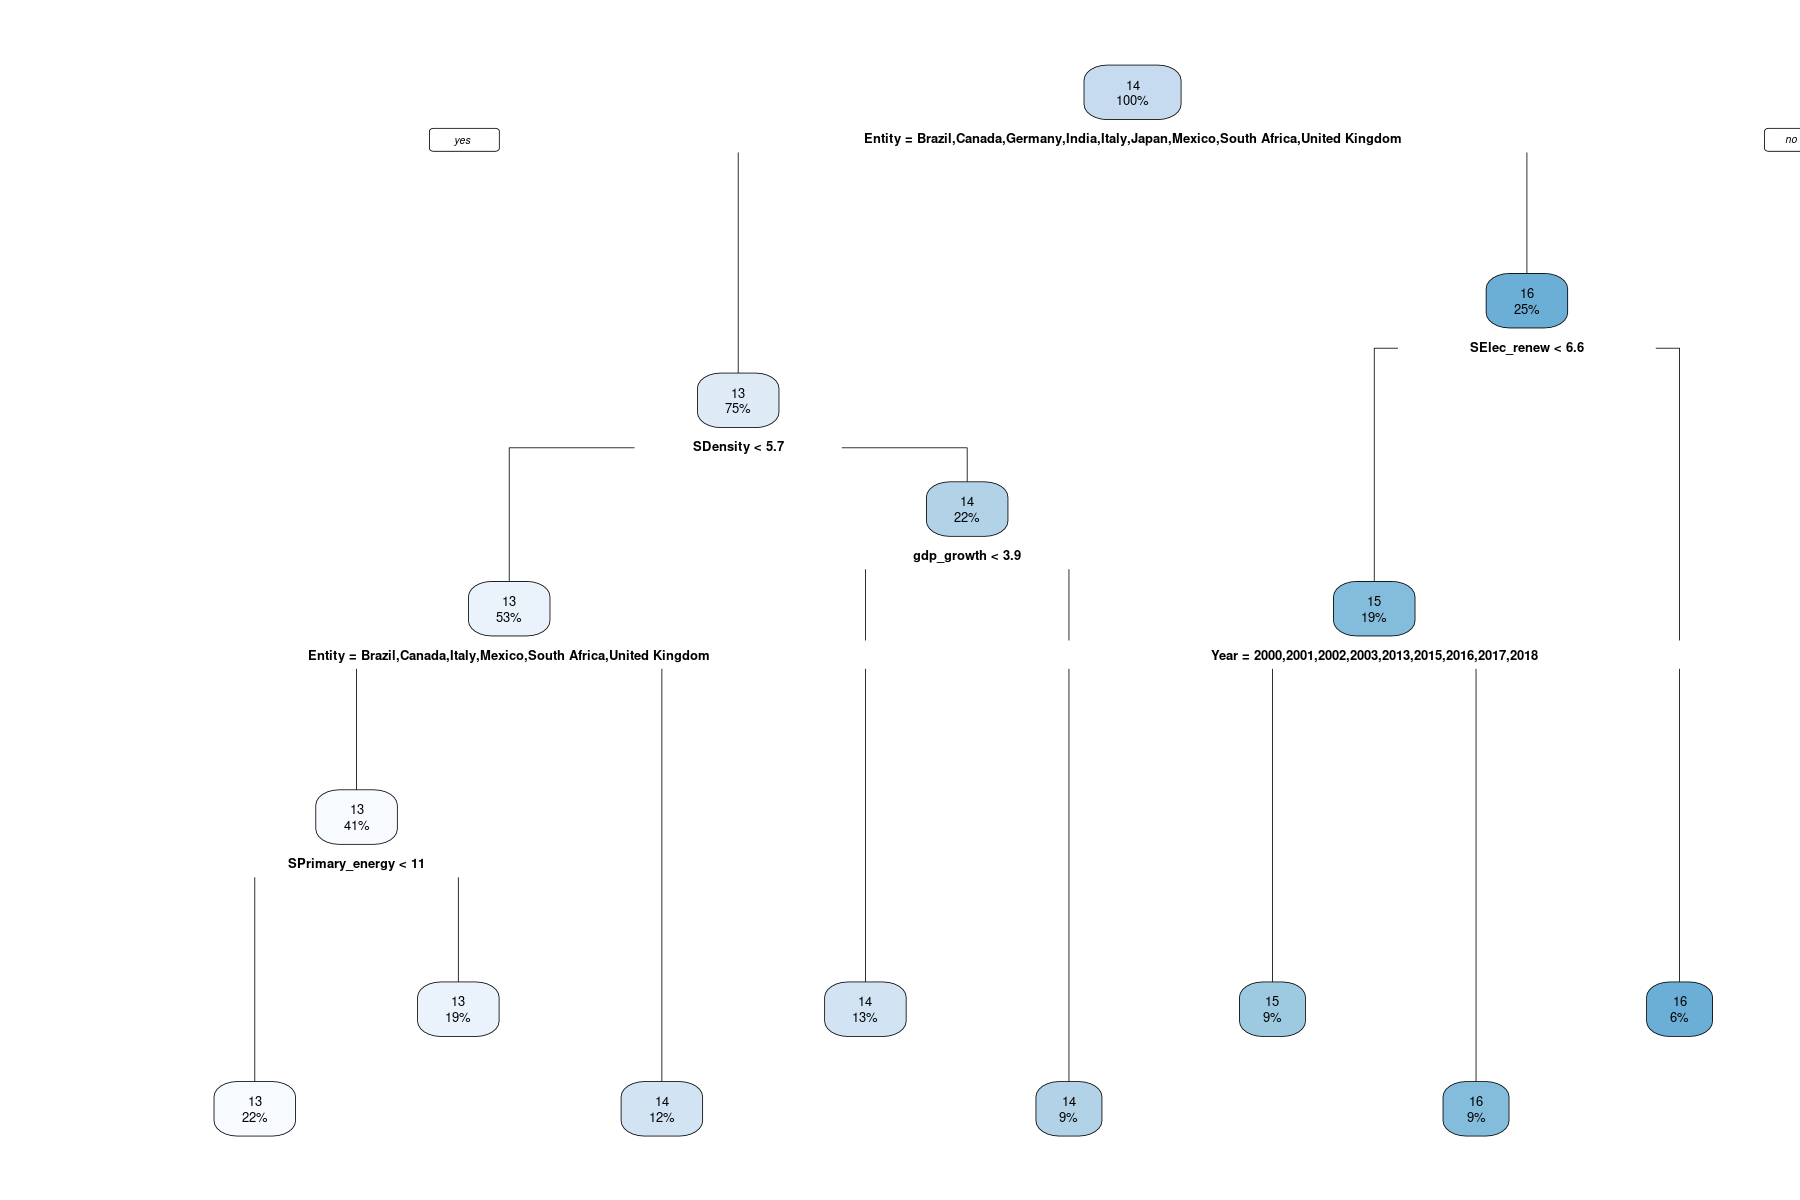

In [236]:
library(rpart.plot)
options(repr.plot.width = 15, repr.plot.height = 10)
rpart.plot(tree.reg)

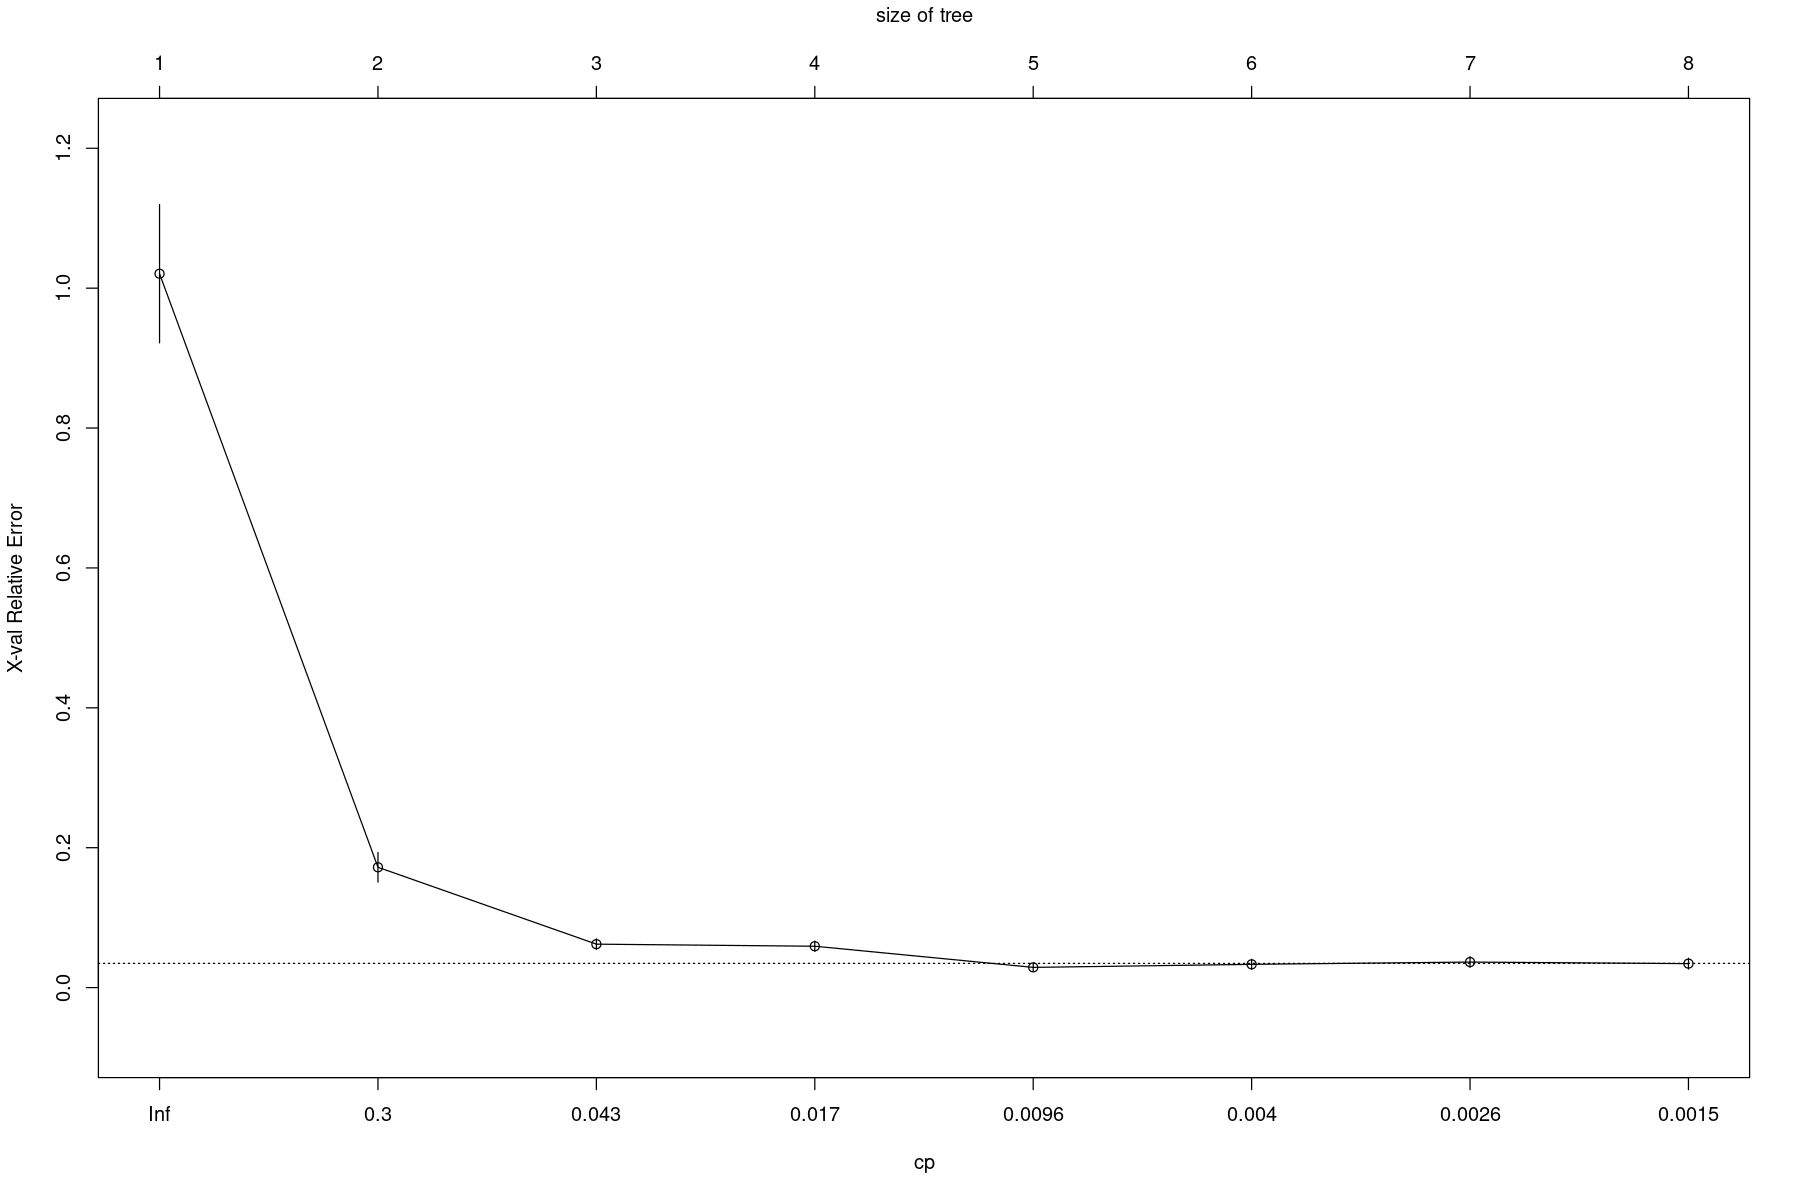

In [237]:
xmat<-xpred.rpart(tree.reg,xval=10) 
# one row for each observation and one column for each complexity value

# Cross-validation error par valeur de CP
CVerr<-apply((xmat-datappr[,"SValue_co2"])^2,2,sum)

plotcp(tree.reg)

[1] 0.009589525

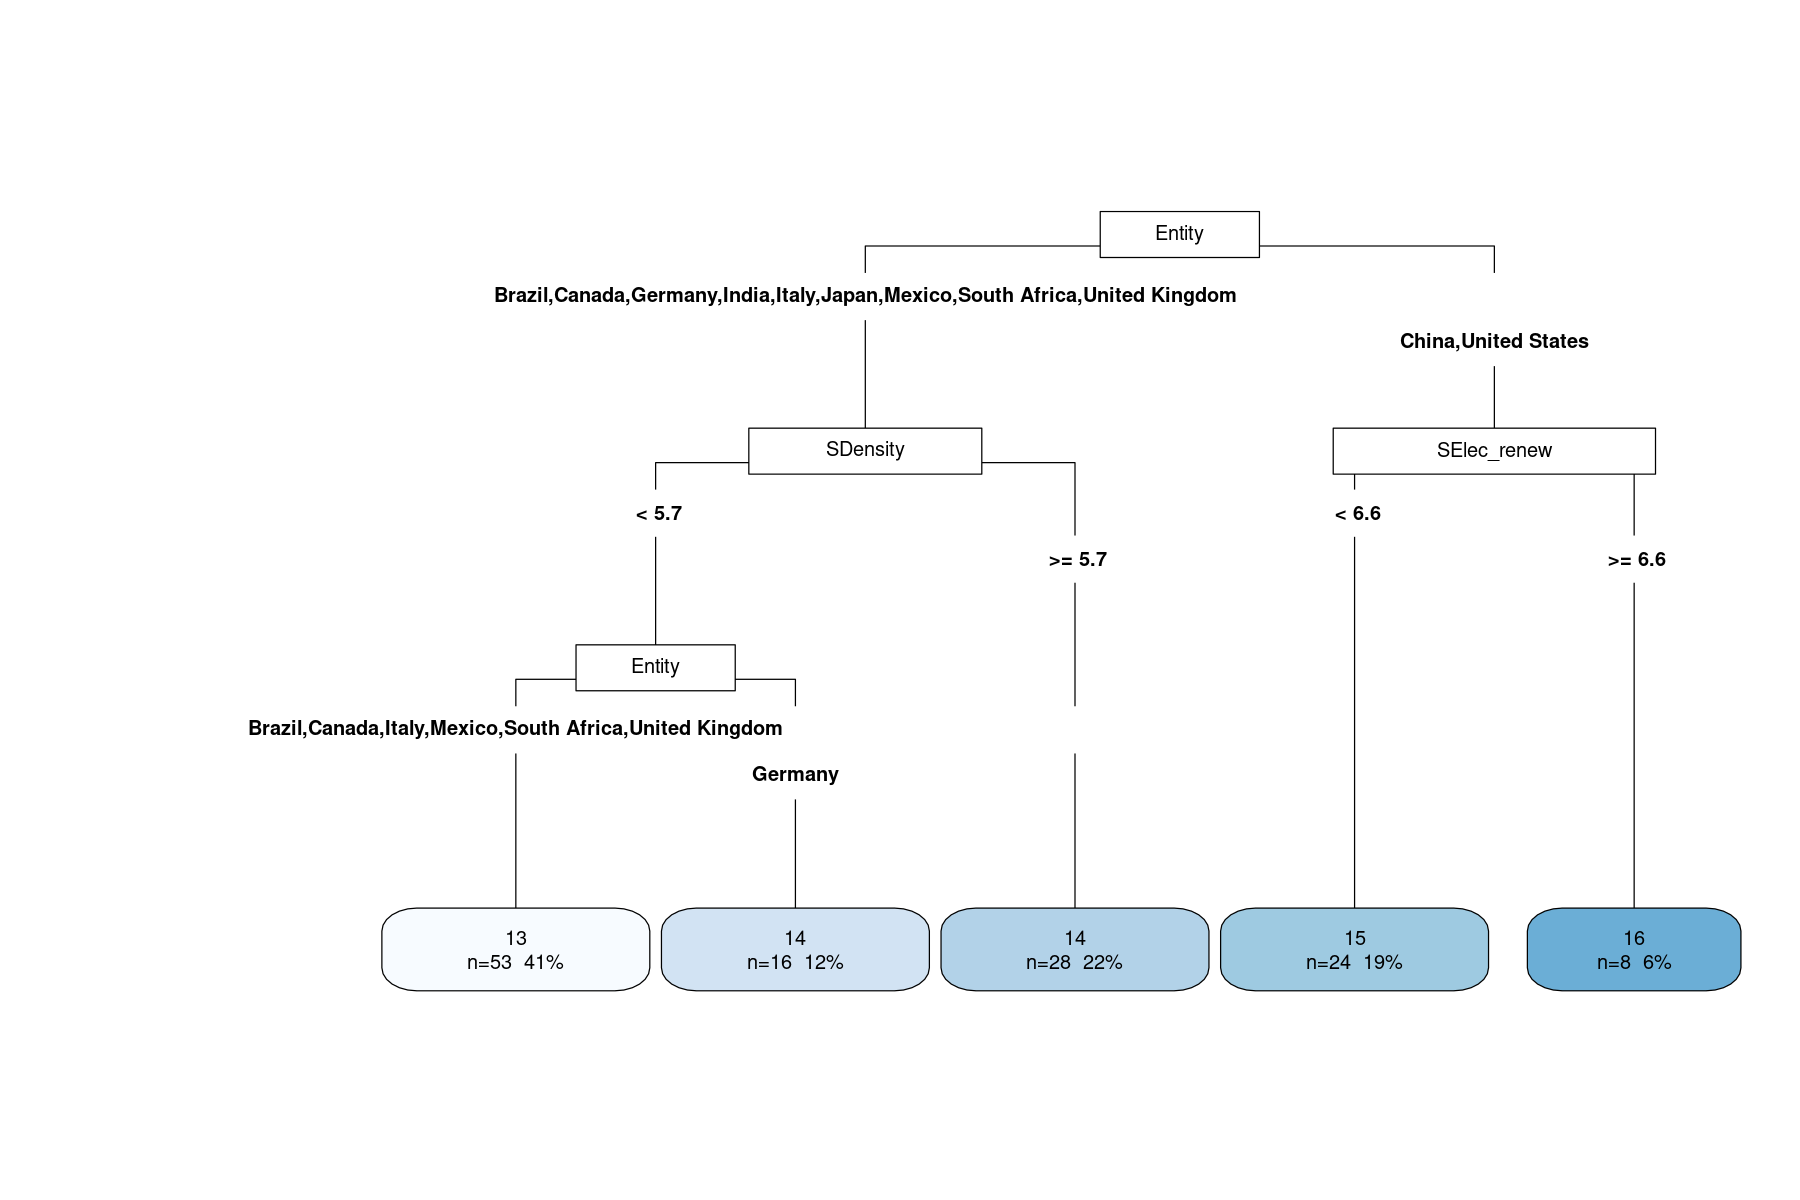

In [238]:
as.numeric(attributes(which.min(CVerr))$names)
tree.reg=rpart(SValue_co2~.,data=datappr,control=rpart.control(cp=as.numeric(attributes(which.min(CVerr))$names)))
rpart.plot(tree.reg,type=5,extra=101)

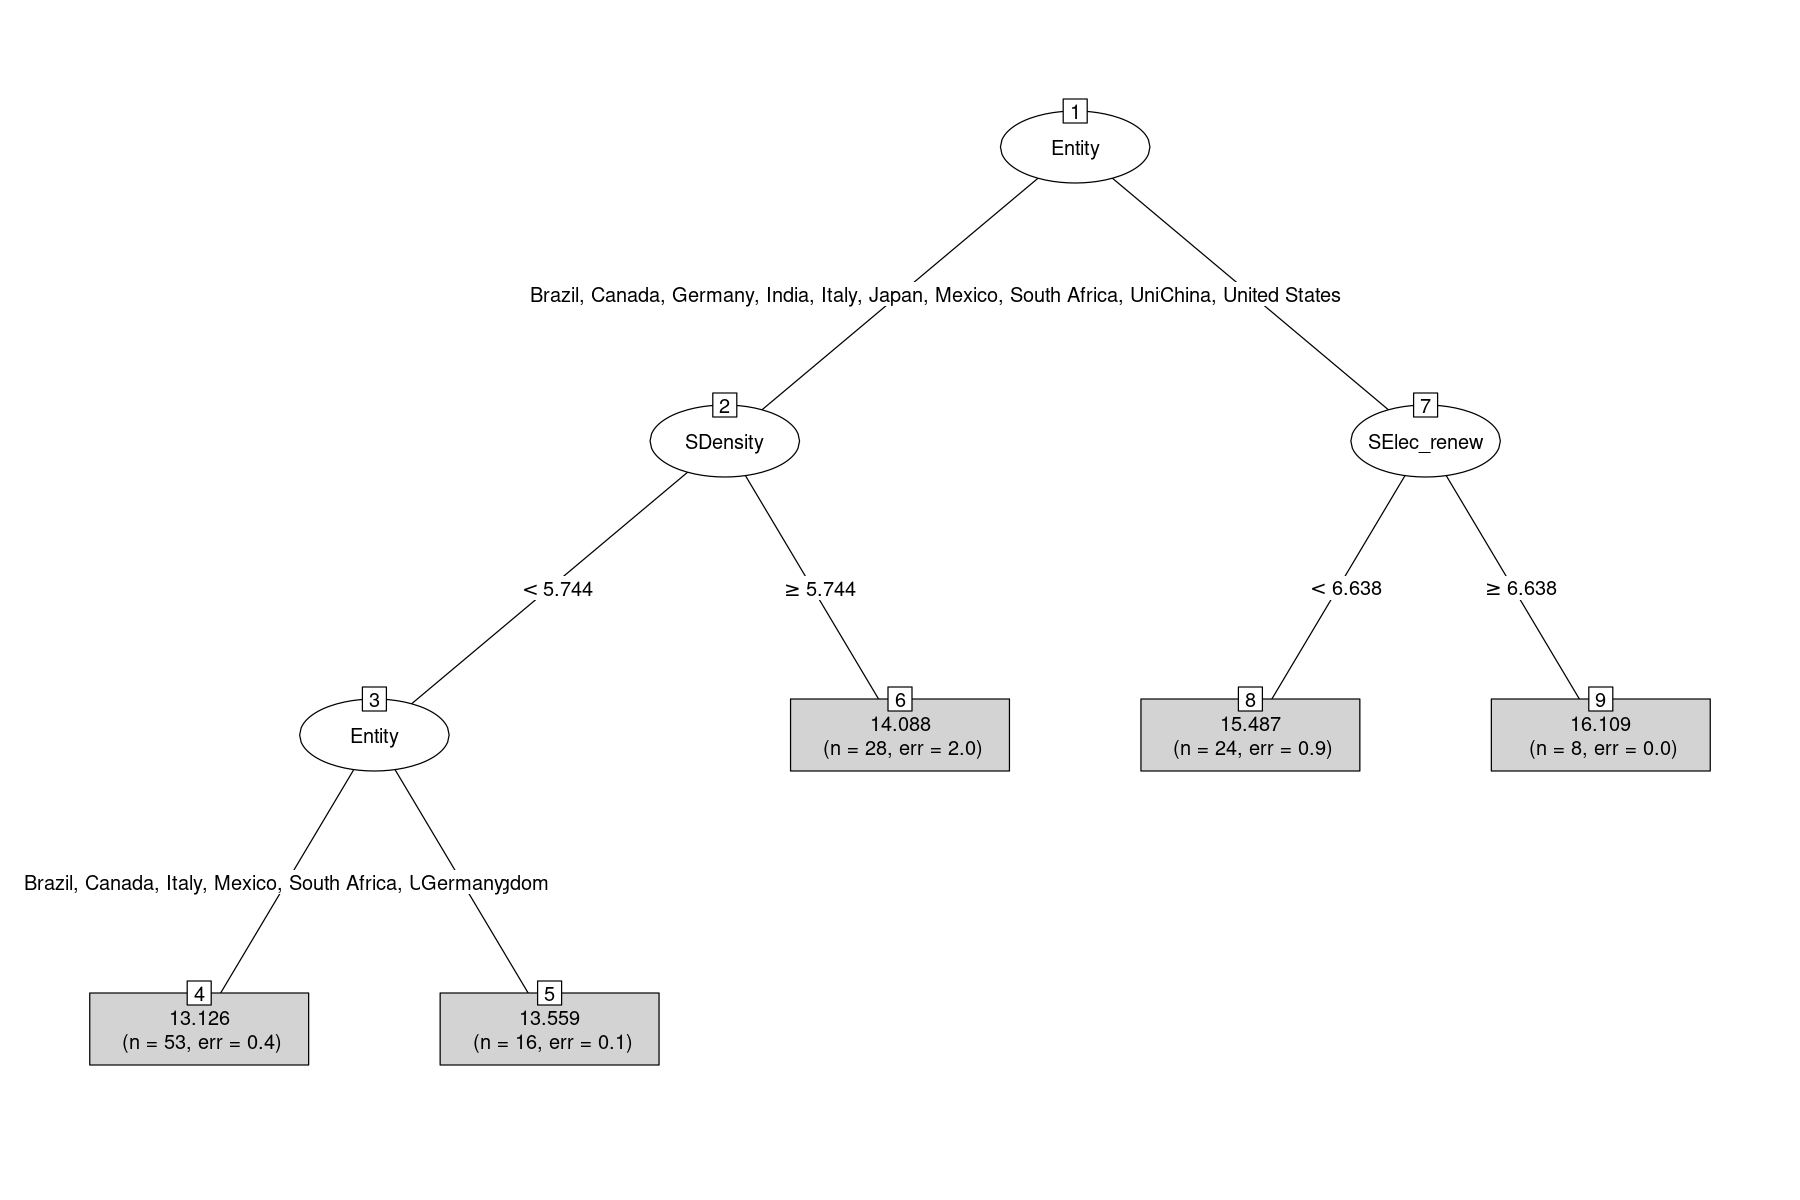

In [239]:
library(partykit)
plot(as.party(tree.reg), type="simple")

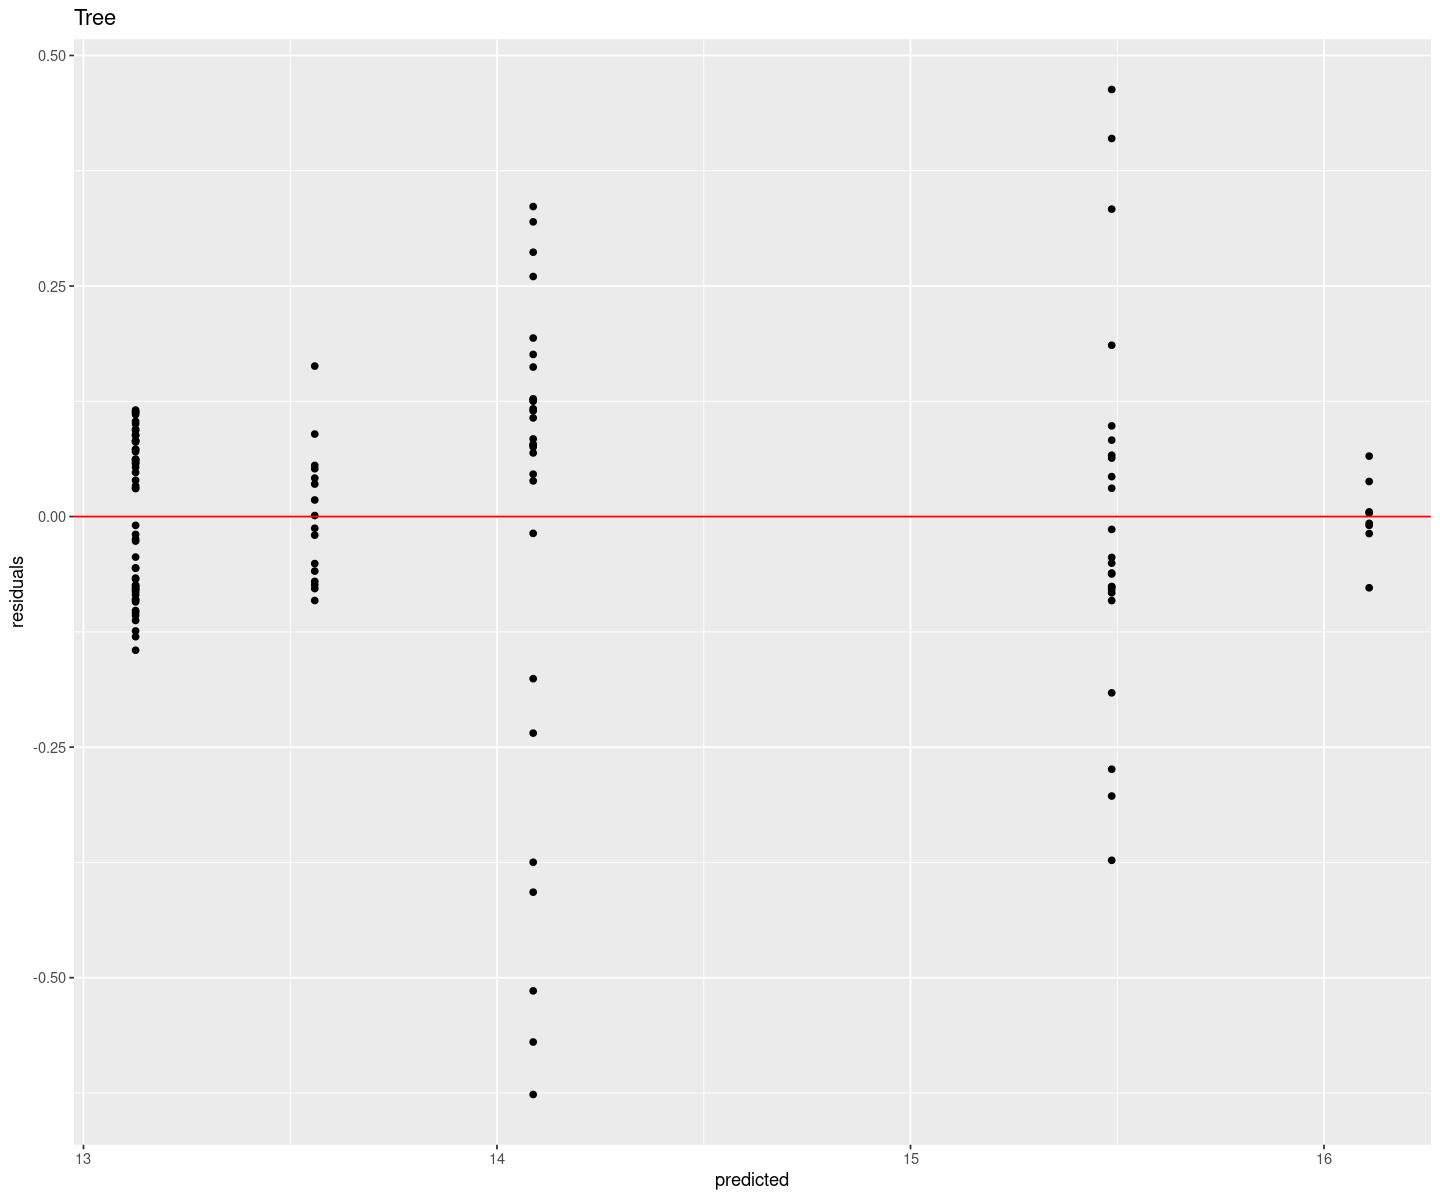

In [240]:
fit.tree=predict(tree.reg)
res.tree=fit.tree-datappr[,"SValue_co2"]

options(repr.plot.width = 12, repr.plot.height = 10)
par(mfrow = c(1, 3))
ggplot(data.frame(residuals = res.tree, predicted = fit.tree), aes(x = predicted, y = residuals)) +
  geom_point() +
  geom_hline(yintercept = 0 ,color = "red") +
  ggtitle("Tree")

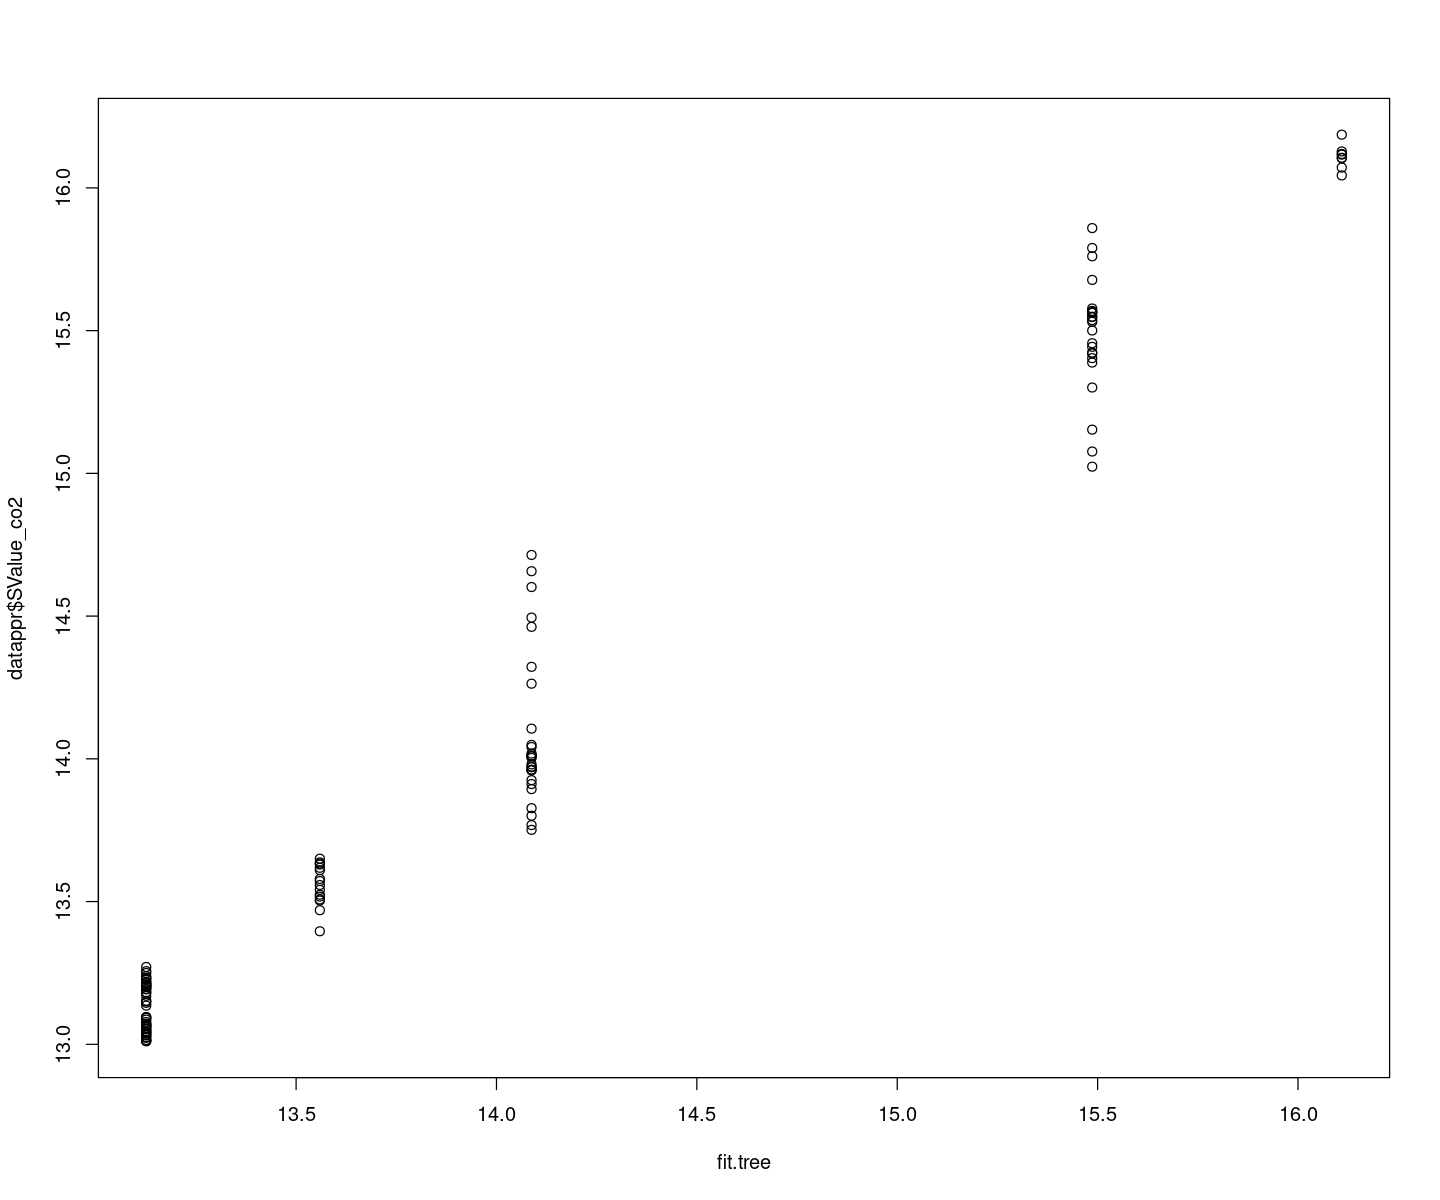

In [241]:
plot(fit.tree,datappr$SValue_co2)

### Random Forest

In [242]:
rf.reg=randomForest(SValue_co2~., data=datappr,xtest=datestr[,-15],ytest=datestr[,"SValue_co2"],
   ntree=500,do.trace=50,importance=TRUE)
attributes(rf.reg)
rf.reg$mtry

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |  0.01612     1.53 |  0.04285     4.71 |
 100 |  0.01543     1.47 |  0.05114     5.62 |
 150 |  0.01501     1.43 |  0.04829     5.31 |
 200 |   0.0151     1.43 |  0.04733     5.20 |
 250 |  0.01452     1.38 |  0.04601     5.06 |
 300 |   0.0138     1.31 |  0.04338     4.77 |
 350 |  0.01456     1.38 |  0.04141     4.55 |
 400 |  0.01426     1.36 |  0.04162     4.58 |
 450 |  0.01422     1.35 |  0.04322     4.75 |
 500 |  0.01404     1.33 |  0.04331     4.76 |


$names
 [1] "call"            "type"            "predicted"       "mse"            
 [5] "rsq"             "oob.times"       "importance"      "importanceSD"   
 [9] "localImportance" "proximity"       "ntree"           "mtry"           
[13] "forest"          "coefs"           "y"               "test"           
[17] "inbag"           "terms"          

$class
[1] "randomForest.formula" "randomForest"

[1] 5

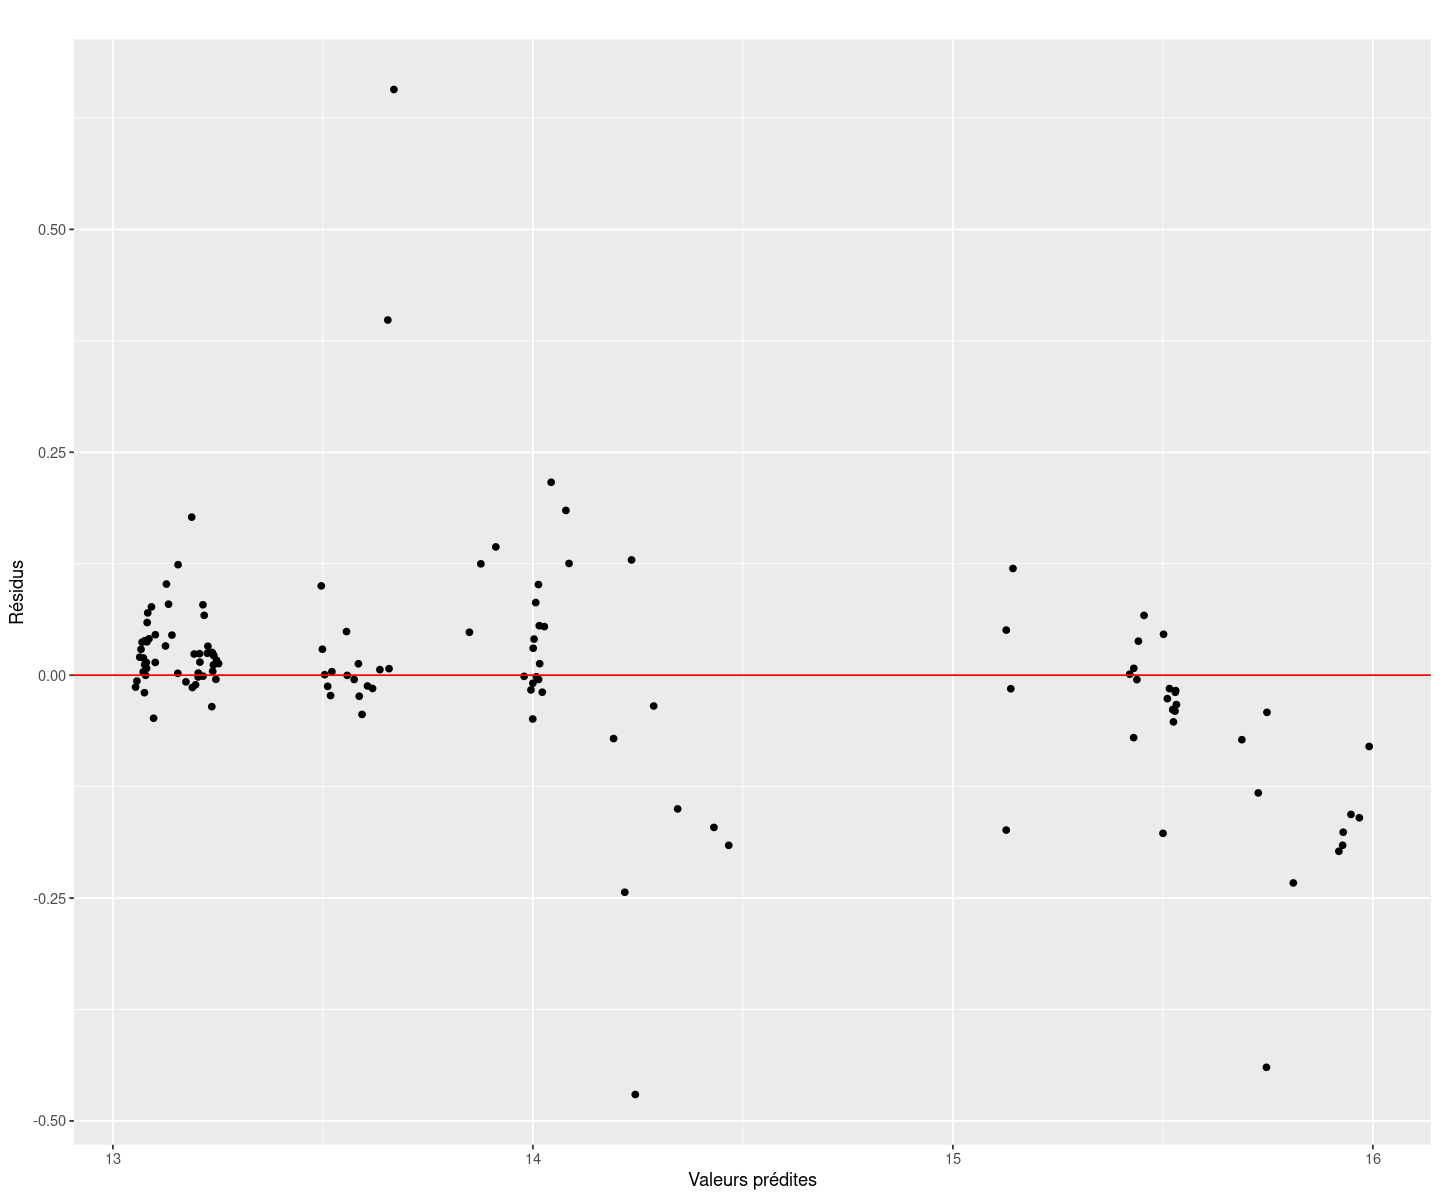

In [243]:
fit.rfr=rf.reg$predicted
res.rfr=fit.rfr-datappr[,"SValue_co2"]
gplot.res(fit.rfr,res.rfr,titre="")

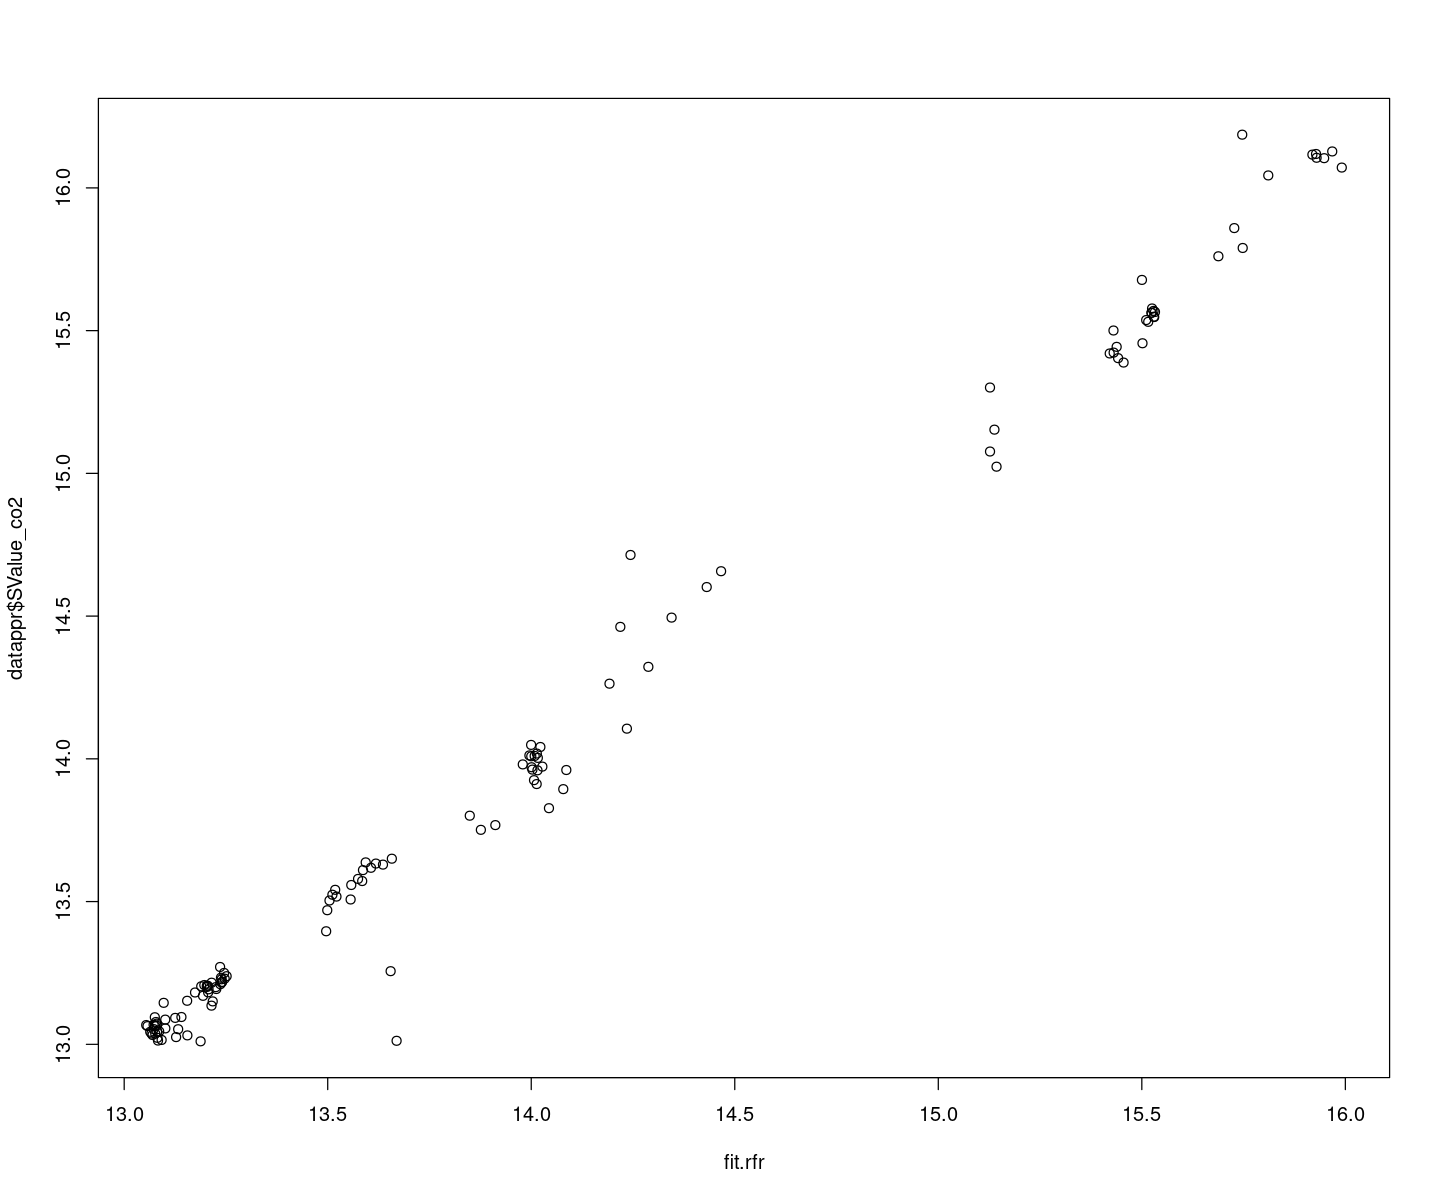

In [244]:
plot(fit.rfr,datappr$SValue_co2)